<h1>Getting the Environment Set Up</h1>

We will be using tensorflow to create and use our neural networks. Throughout this notebook, we will see just how easy it is to make a working neural network that has a surprisingly high accuary!

In [4]:
import tensorflow as tf
from tensorflow import keras

<h1>Managing our Images</h1>



In [5]:
# parameters
input_shape = (28, 28) # the image is 28x28
num_classes = 10 # 10 labels
num_epochs = 5 # 5 training iterations, we bump this down because the model takes longer to train

# TODO You can change to the numbers MNIST dataset if you'd like to see how it works on different images
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ("T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
           "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot")

# 60,000 images with each image being 28 by 28 pixels
train_images.shape

(60000, 28, 28)

Each image is represented by a 2-D array where each number in the list represents the brightness of the pixel

In [6]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

For our CNN model, we will need this to be a 3-D array for it to work with tensorflow properly. Below we will reshape it to be 3D and then print it out again

In [8]:
train_images = train_images.reshape((60000,28,28,1))
# This just has a massive output, if you want to see the new shape, uncomment it and run this block
train_images[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

We will also need to do this for our test images

In [9]:
test_images = test_images.reshape((10000, 28, 28, 1))

That wall of numbers isn't very easy to understand to our brains however. Lets go ahead and display a few of the images from the dataset with matplotlib. If you want to read more about matplot lib, you can go here: https://matplotlib.org/stable/users/index

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def show_imgs():
    plt.figure(figsize=(10,10))
    for i in range(25):
        # Create a 5x5 grid of pictures, place current picture in the grid
        plt.subplot(5,5,i+1)
        # Remove the x and y ticks
        plt.xticks([])
        plt.yticks([])
        # Disable the grid in each picture, we dont want x/y axis for these
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i]])
    plt.show()

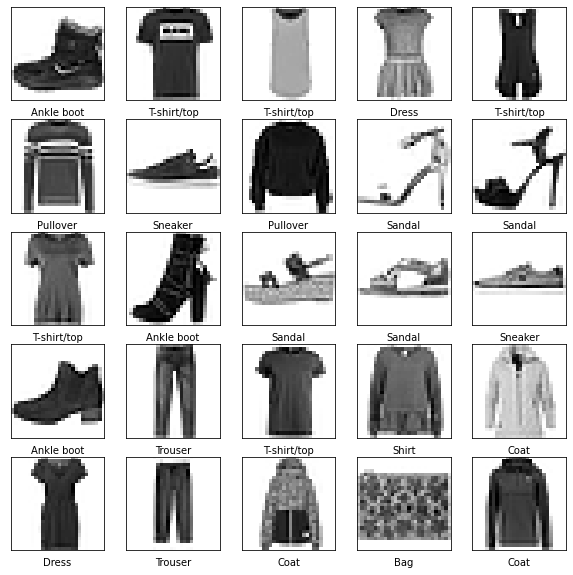

In [11]:
show_imgs()

<h1>Creating Our Model</h1>

Tensorflow lets us create a model super easily. A "Dense" layer is just a layer that is fully connected to the next layer, this is the basic type of layer that we are familiar with. Then all we need to do is specify how many neurons there should be in the given layer and tensorflow figures out the rest.

In [12]:
# The parameters in each of these Conv2D layers are as follows:
# layers.Conv2D(Output_size, Stride, activation, input_shape)
# Stride is just how far the square of relevant pixels moves between layers. 
# Simply put, for this model, the model looks at a 4x4 square of pixels and
# then moves 4 pixels to the left before checking the next 4x4 box of pixels
def create_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    # Max Pooling just grabs the largest number in a specified area and uses that for the whole area
    # below we are looking at a 2x2 square and using the largest number in that square as the value for the whole square

    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Conv2D(56, (3, 3), activation='relu'))

    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Conv2D(56, (3, 3), activation='relu'))
    
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(10))

    return model

In [13]:
model = create_model()
# The optimizer is just an algorithm that helps the AI learn faster
# The loss is Sparse Categorical Crossentropy, the name is scary but it just means that 
# the outputs are converted to percentages and then compared to the expected output
# Metrics = accuracy means that we only care about how close the answer was to the actual answer 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 56)        14168     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 56)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 56)          28280     
_________________________________________________________________
flatten (Flatten)            (None, 504)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

2022-07-05 21:24:50.060537: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-07-05 21:24:50.060874: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-05 21:24:50.061051: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


<h1>Training our Model</h1>

Tensorflow makes training easy. All we need to do is give it the input data and the expected outputs with the number of epochs to train for and it will handle the rest!

In [14]:
model.fit(train_images, train_labels, epochs=num_epochs)

2022-07-05 21:25:07.505300: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-07-05 21:25:07.508088: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2500000000 Hz


Epoch 1/5


   1/1875 [..............................] - ETA: 27:57 - loss: 10.7840 - accuracy: 0.0312

   3/1875 [..............................] - ETA: 1:01 - loss: 11.9448 - accuracy: 0.0799 

   5/1875 [..............................] - ETA: 1:03 - loss: 10.9878 - accuracy: 0.1098

   7/1875 [..............................] - ETA: 1:05 - loss: 10.1550 - accuracy: 0.1373

   9/1875 [..............................] - ETA: 1:06 - loss: 9.4775 - accuracy: 0.1573 

  11/1875 [..............................] - ETA: 1:03 - loss: 8.8786 - accuracy: 0.1795

  13/1875 [..............................] - ETA: 1:05 - loss: 8.3616 - accuracy: 0.2010

  15/1875 [..............................] - ETA: 1:05 - loss: 7.9080 - accuracy: 0.2209

  17/1875 [..............................] - ETA: 1:04 - loss: 7.5153 - accuracy: 0.2385

  19/1875 [..............................] - ETA: 1:03 - loss: 7.1688 - accuracy: 0.2547

  21/1875 [..............................] - ETA: 1:03 - loss: 6.8641 - accuracy: 0.2692

  23/1875 [..............................] - ETA: 1:01 - loss: 6.5910 - accuracy: 0.2827

  25/1875 [..............................] - ETA: 1:01 - loss: 6.3431 - accuracy: 0.2954

  27/1875 [..............................] - ETA: 1:01 - loss: 6.1197 - accuracy: 0.3072

  29/1875 [..............................] - ETA: 1:01 - loss: 5.9173 - accuracy: 0.3178

  31/1875 [..............................] - ETA: 1:01 - loss: 5.7324 - accuracy: 0.3277

  33/1875 [..............................] - ETA: 1:01 - loss: 5.5620 - accuracy: 0.3373

  36/1875 [..............................] - ETA: 59s - loss: 5.3303 - accuracy: 0.3509 

  39/1875 [..............................] - ETA: 57s - loss: 5.1230 - accuracy: 0.3635

  42/1875 [..............................] - ETA: 55s - loss: 4.9369 - accuracy: 0.3750

  45/1875 [..............................] - ETA: 54s - loss: 4.7678 - accuracy: 0.3861

  47/1875 [..............................] - ETA: 56s - loss: 4.6633 - accuracy: 0.3931

  48/1875 [..............................] - ETA: 57s - loss: 4.6135 - accuracy: 0.3966

  49/1875 [..............................] - ETA: 58s - loss: 4.5654 - accuracy: 0.3999

  50/1875 [..............................] - ETA: 59s - loss: 4.5188 - accuracy: 0.4032

  51/1875 [..............................] - ETA: 1:00 - loss: 4.4736 - accuracy: 0.4063

  54/1875 [..............................] - ETA: 59s - loss: 4.3455 - accuracy: 0.4152 

  57/1875 [..............................] - ETA: 58s - loss: 4.2278 - accuracy: 0.4234

  59/1875 [..............................] - ETA: 58s - loss: 4.1546 - accuracy: 0.4284

  62/1875 [..............................] - ETA: 57s - loss: 4.0510 - accuracy: 0.4355

  64/1875 [>.............................] - ETA: 57s - loss: 3.9861 - accuracy: 0.4400

  65/1875 [>.............................] - ETA: 58s - loss: 3.9548 - accuracy: 0.4422

  67/1875 [>.............................] - ETA: 58s - loss: 3.8943 - accuracy: 0.4464

  69/1875 [>.............................] - ETA: 58s - loss: 3.8366 - accuracy: 0.4504

  71/1875 [>.............................] - ETA: 58s - loss: 3.7816 - accuracy: 0.4543

  73/1875 [>.............................] - ETA: 58s - loss: 3.7288 - accuracy: 0.4581

  75/1875 [>.............................] - ETA: 58s - loss: 3.6780 - accuracy: 0.4617

  77/1875 [>.............................] - ETA: 58s - loss: 3.6293 - accuracy: 0.4653

  78/1875 [>.............................] - ETA: 58s - loss: 3.6056 - accuracy: 0.4670

  79/1875 [>.............................] - ETA: 59s - loss: 3.5824 - accuracy: 0.4687

  81/1875 [>.............................] - ETA: 59s - loss: 3.5374 - accuracy: 0.4720

  83/1875 [>.............................] - ETA: 59s - loss: 3.4940 - accuracy: 0.4752

  86/1875 [>.............................] - ETA: 58s - loss: 3.4319 - accuracy: 0.4797

  89/1875 [>.............................] - ETA: 57s - loss: 3.3729 - accuracy: 0.4842

  92/1875 [>.............................] - ETA: 56s - loss: 3.3169 - accuracy: 0.4884

  94/1875 [>.............................] - ETA: 56s - loss: 3.2811 - accuracy: 0.4911

  97/1875 [>.............................] - ETA: 55s - loss: 3.2295 - accuracy: 0.4950

  99/1875 [>.............................] - ETA: 55s - loss: 3.1964 - accuracy: 0.4975

 102/1875 [>.............................] - ETA: 54s - loss: 3.1485 - accuracy: 0.5012

 105/1875 [>.............................] - ETA: 54s - loss: 3.1027 - accuracy: 0.5049

 106/1875 [>.............................] - ETA: 54s - loss: 3.0878 - accuracy: 0.5060

 108/1875 [>.............................] - ETA: 54s - loss: 3.0588 - accuracy: 0.5084

 110/1875 [>.............................] - ETA: 54s - loss: 3.0304 - accuracy: 0.5106

 112/1875 [>.............................] - ETA: 54s - loss: 3.0029 - accuracy: 0.5129

 114/1875 [>.............................] - ETA: 54s - loss: 2.9760 - accuracy: 0.5151

 116/1875 [>.............................] - ETA: 54s - loss: 2.9497 - accuracy: 0.5172

 118/1875 [>.............................] - ETA: 54s - loss: 2.9242 - accuracy: 0.5194

 119/1875 [>.............................] - ETA: 54s - loss: 2.9117 - accuracy: 0.5204

 121/1875 [>.............................] - ETA: 55s - loss: 2.8871 - accuracy: 0.5225

 122/1875 [>.............................] - ETA: 55s - loss: 2.8750 - accuracy: 0.5235

 124/1875 [>.............................] - ETA: 55s - loss: 2.8514 - accuracy: 0.5255

 126/1875 [=>............................] - ETA: 55s - loss: 2.8284 - accuracy: 0.5275

 128/1875 [=>............................] - ETA: 55s - loss: 2.8060 - accuracy: 0.5294

 131/1875 [=>............................] - ETA: 54s - loss: 2.7734 - accuracy: 0.5321

 134/1875 [=>............................] - ETA: 54s - loss: 2.7419 - accuracy: 0.5348

 137/1875 [=>............................] - ETA: 53s - loss: 2.7115 - accuracy: 0.5374

 140/1875 [=>............................] - ETA: 53s - loss: 2.6821 - accuracy: 0.5399

 143/1875 [=>............................] - ETA: 52s - loss: 2.6537 - accuracy: 0.5424

 146/1875 [=>............................] - ETA: 52s - loss: 2.6261 - accuracy: 0.5448

 149/1875 [=>............................] - ETA: 51s - loss: 2.5994 - accuracy: 0.5471

 152/1875 [=>............................] - ETA: 51s - loss: 2.5736 - accuracy: 0.5493

 155/1875 [=>............................] - ETA: 50s - loss: 2.5485 - accuracy: 0.5515

 158/1875 [=>............................] - ETA: 50s - loss: 2.5241 - accuracy: 0.5537

 161/1875 [=>............................] - ETA: 49s - loss: 2.5004 - accuracy: 0.5557

 163/1875 [=>............................] - ETA: 50s - loss: 2.4850 - accuracy: 0.5571

 165/1875 [=>............................] - ETA: 49s - loss: 2.4699 - accuracy: 0.5584

 168/1875 [=>............................] - ETA: 49s - loss: 2.4478 - accuracy: 0.5604

 171/1875 [=>............................] - ETA: 49s - loss: 2.4263 - accuracy: 0.5623

 174/1875 [=>............................] - ETA: 48s - loss: 2.4054 - accuracy: 0.5641

 177/1875 [=>............................] - ETA: 48s - loss: 2.3850 - accuracy: 0.5660

 180/1875 [=>............................] - ETA: 48s - loss: 2.3652 - accuracy: 0.5678

 183/1875 [=>............................] - ETA: 47s - loss: 2.3458 - accuracy: 0.5695

 186/1875 [=>............................] - ETA: 47s - loss: 2.3270 - accuracy: 0.5712

 189/1875 [==>...........................] - ETA: 47s - loss: 2.3086 - accuracy: 0.5729

 192/1875 [==>...........................] - ETA: 46s - loss: 2.2906 - accuracy: 0.5745

 195/1875 [==>...........................] - ETA: 46s - loss: 2.2731 - accuracy: 0.5761

 198/1875 [==>...........................] - ETA: 46s - loss: 2.2560 - accuracy: 0.5777

 201/1875 [==>...........................] - ETA: 46s - loss: 2.2393 - accuracy: 0.5793

 204/1875 [==>...........................] - ETA: 45s - loss: 2.2230 - accuracy: 0.5808

 207/1875 [==>...........................] - ETA: 45s - loss: 2.2071 - accuracy: 0.5823

 210/1875 [==>...........................] - ETA: 45s - loss: 2.1915 - accuracy: 0.5838

 213/1875 [==>...........................] - ETA: 45s - loss: 2.1763 - accuracy: 0.5852

 216/1875 [==>...........................] - ETA: 44s - loss: 2.1615 - accuracy: 0.5866

 219/1875 [==>...........................] - ETA: 44s - loss: 2.1470 - accuracy: 0.5880

 222/1875 [==>...........................] - ETA: 44s - loss: 2.1327 - accuracy: 0.5893

 224/1875 [==>...........................] - ETA: 44s - loss: 2.1234 - accuracy: 0.5902

 225/1875 [==>...........................] - ETA: 44s - loss: 2.1188 - accuracy: 0.5907

 226/1875 [==>...........................] - ETA: 44s - loss: 2.1142 - accuracy: 0.5911

 228/1875 [==>...........................] - ETA: 45s - loss: 2.1052 - accuracy: 0.5920

 230/1875 [==>...........................] - ETA: 45s - loss: 2.0962 - accuracy: 0.5928

 232/1875 [==>...........................] - ETA: 45s - loss: 2.0874 - accuracy: 0.5937

 234/1875 [==>...........................] - ETA: 45s - loss: 2.0787 - accuracy: 0.5945

 236/1875 [==>...........................] - ETA: 45s - loss: 2.0701 - accuracy: 0.5954

 237/1875 [==>...........................] - ETA: 45s - loss: 2.0659 - accuracy: 0.5958

 239/1875 [==>...........................] - ETA: 45s - loss: 2.0574 - accuracy: 0.5966

 241/1875 [==>...........................] - ETA: 45s - loss: 2.0491 - accuracy: 0.5975

 243/1875 [==>...........................] - ETA: 45s - loss: 2.0409 - accuracy: 0.5983

 245/1875 [==>...........................] - ETA: 45s - loss: 2.0327 - accuracy: 0.5991

 247/1875 [==>...........................] - ETA: 45s - loss: 2.0247 - accuracy: 0.5999

 249/1875 [==>...........................] - ETA: 45s - loss: 2.0168 - accuracy: 0.6007

 251/1875 [===>..........................] - ETA: 45s - loss: 2.0089 - accuracy: 0.6015

 253/1875 [===>..........................] - ETA: 45s - loss: 2.0012 - accuracy: 0.6023

 255/1875 [===>..........................] - ETA: 45s - loss: 1.9935 - accuracy: 0.6031

 257/1875 [===>..........................] - ETA: 45s - loss: 1.9860 - accuracy: 0.6039

 259/1875 [===>..........................] - ETA: 45s - loss: 1.9785 - accuracy: 0.6047

 261/1875 [===>..........................] - ETA: 45s - loss: 1.9712 - accuracy: 0.6054

 263/1875 [===>..........................] - ETA: 45s - loss: 1.9639 - accuracy: 0.6062

 264/1875 [===>..........................] - ETA: 45s - loss: 1.9603 - accuracy: 0.6066

 266/1875 [===>..........................] - ETA: 45s - loss: 1.9531 - accuracy: 0.6073

 267/1875 [===>..........................] - ETA: 46s - loss: 1.9496 - accuracy: 0.6077

 268/1875 [===>..........................] - ETA: 46s - loss: 1.9461 - accuracy: 0.6080

 270/1875 [===>..........................] - ETA: 46s - loss: 1.9391 - accuracy: 0.6088

 273/1875 [===>..........................] - ETA: 45s - loss: 1.9288 - accuracy: 0.6098

 276/1875 [===>..........................] - ETA: 45s - loss: 1.9186 - accuracy: 0.6109

 279/1875 [===>..........................] - ETA: 45s - loss: 1.9087 - accuracy: 0.6120

 282/1875 [===>..........................] - ETA: 45s - loss: 1.8989 - accuracy: 0.6130

 285/1875 [===>..........................] - ETA: 45s - loss: 1.8893 - accuracy: 0.6140

 287/1875 [===>..........................] - ETA: 44s - loss: 1.8830 - accuracy: 0.6147

 290/1875 [===>..........................] - ETA: 44s - loss: 1.8736 - accuracy: 0.6157

 293/1875 [===>..........................] - ETA: 44s - loss: 1.8645 - accuracy: 0.6167

 296/1875 [===>..........................] - ETA: 44s - loss: 1.8555 - accuracy: 0.6176

 299/1875 [===>..........................] - ETA: 44s - loss: 1.8466 - accuracy: 0.6186

 302/1875 [===>..........................] - ETA: 43s - loss: 1.8379 - accuracy: 0.6195

 305/1875 [===>..........................] - ETA: 43s - loss: 1.8294 - accuracy: 0.6204

 307/1875 [===>..........................] - ETA: 43s - loss: 1.8237 - accuracy: 0.6210

 310/1875 [===>..........................] - ETA: 43s - loss: 1.8154 - accuracy: 0.6219

 313/1875 [====>.........................] - ETA: 43s - loss: 1.8072 - accuracy: 0.6228

 316/1875 [====>.........................] - ETA: 43s - loss: 1.7991 - accuracy: 0.6237

 319/1875 [====>.........................] - ETA: 42s - loss: 1.7912 - accuracy: 0.6245

 322/1875 [====>.........................] - ETA: 42s - loss: 1.7834 - accuracy: 0.6254

 324/1875 [====>.........................] - ETA: 42s - loss: 1.7782 - accuracy: 0.6259

 327/1875 [====>.........................] - ETA: 42s - loss: 1.7705 - accuracy: 0.6268

 330/1875 [====>.........................] - ETA: 42s - loss: 1.7630 - accuracy: 0.6276

 333/1875 [====>.........................] - ETA: 42s - loss: 1.7556 - accuracy: 0.6284

 336/1875 [====>.........................] - ETA: 41s - loss: 1.7483 - accuracy: 0.6292

 339/1875 [====>.........................] - ETA: 41s - loss: 1.7410 - accuracy: 0.6300

 342/1875 [====>.........................] - ETA: 41s - loss: 1.7339 - accuracy: 0.6308

 345/1875 [====>.........................] - ETA: 41s - loss: 1.7269 - accuracy: 0.6316

 348/1875 [====>.........................] - ETA: 41s - loss: 1.7200 - accuracy: 0.6324

 351/1875 [====>.........................] - ETA: 40s - loss: 1.7131 - accuracy: 0.6332

 354/1875 [====>.........................] - ETA: 40s - loss: 1.7063 - accuracy: 0.6339

 356/1875 [====>.........................] - ETA: 40s - loss: 1.7019 - accuracy: 0.6344

 360/1875 [====>.........................] - ETA: 40s - loss: 1.6931 - accuracy: 0.6354

 363/1875 [====>.........................] - ETA: 40s - loss: 1.6866 - accuracy: 0.6362

 366/1875 [====>.........................] - ETA: 40s - loss: 1.6802 - accuracy: 0.6369

 369/1875 [====>.........................] - ETA: 39s - loss: 1.6738 - accuracy: 0.6376

 372/1875 [====>.........................] - ETA: 39s - loss: 1.6676 - accuracy: 0.6383

 375/1875 [=====>........................] - ETA: 39s - loss: 1.6614 - accuracy: 0.6391

 378/1875 [=====>........................] - ETA: 39s - loss: 1.6552 - accuracy: 0.6398

 381/1875 [=====>........................] - ETA: 39s - loss: 1.6492 - accuracy: 0.6405

 384/1875 [=====>........................] - ETA: 39s - loss: 1.6432 - accuracy: 0.6412

 387/1875 [=====>........................] - ETA: 39s - loss: 1.6373 - accuracy: 0.6419

 390/1875 [=====>........................] - ETA: 38s - loss: 1.6315 - accuracy: 0.6426

 393/1875 [=====>........................] - ETA: 38s - loss: 1.6257 - accuracy: 0.6433

 395/1875 [=====>........................] - ETA: 38s - loss: 1.6219 - accuracy: 0.6437

 397/1875 [=====>........................] - ETA: 38s - loss: 1.6181 - accuracy: 0.6442

 400/1875 [=====>........................] - ETA: 38s - loss: 1.6125 - accuracy: 0.6448

 402/1875 [=====>........................] - ETA: 38s - loss: 1.6088 - accuracy: 0.6453

 404/1875 [=====>........................] - ETA: 38s - loss: 1.6051 - accuracy: 0.6457

 408/1875 [=====>........................] - ETA: 38s - loss: 1.5979 - accuracy: 0.6466

 411/1875 [=====>........................] - ETA: 38s - loss: 1.5925 - accuracy: 0.6473

 414/1875 [=====>........................] - ETA: 37s - loss: 1.5871 - accuracy: 0.6479

 417/1875 [=====>........................] - ETA: 37s - loss: 1.5819 - accuracy: 0.6486

 420/1875 [=====>........................] - ETA: 37s - loss: 1.5767 - accuracy: 0.6492

 423/1875 [=====>........................] - ETA: 37s - loss: 1.5715 - accuracy: 0.6498

 425/1875 [=====>........................] - ETA: 37s - loss: 1.5681 - accuracy: 0.6503

 428/1875 [=====>........................] - ETA: 37s - loss: 1.5631 - accuracy: 0.6509

 431/1875 [=====>........................] - ETA: 37s - loss: 1.5581 - accuracy: 0.6515

 434/1875 [=====>........................] - ETA: 36s - loss: 1.5531 - accuracy: 0.6521

 437/1875 [=====>........................] - ETA: 36s - loss: 1.5482 - accuracy: 0.6527

 440/1875 [======>.......................] - ETA: 36s - loss: 1.5434 - accuracy: 0.6533

 443/1875 [======>.......................] - ETA: 36s - loss: 1.5386 - accuracy: 0.6539

 446/1875 [======>.......................] - ETA: 36s - loss: 1.5338 - accuracy: 0.6545

 448/1875 [======>.......................] - ETA: 36s - loss: 1.5307 - accuracy: 0.6549

 451/1875 [======>.......................] - ETA: 36s - loss: 1.5260 - accuracy: 0.6555

 454/1875 [======>.......................] - ETA: 36s - loss: 1.5214 - accuracy: 0.6561

 457/1875 [======>.......................] - ETA: 35s - loss: 1.5168 - accuracy: 0.6567

 460/1875 [======>.......................] - ETA: 35s - loss: 1.5123 - accuracy: 0.6572

 463/1875 [======>.......................] - ETA: 35s - loss: 1.5078 - accuracy: 0.6578

 465/1875 [======>.......................] - ETA: 35s - loss: 1.5049 - accuracy: 0.6582

 467/1875 [======>.......................] - ETA: 35s - loss: 1.5019 - accuracy: 0.6585

 470/1875 [======>.......................] - ETA: 35s - loss: 1.4976 - accuracy: 0.6591

 473/1875 [======>.......................] - ETA: 35s - loss: 1.4932 - accuracy: 0.6597

 476/1875 [======>.......................] - ETA: 35s - loss: 1.4889 - accuracy: 0.6602

 478/1875 [======>.......................] - ETA: 35s - loss: 1.4861 - accuracy: 0.6606

 481/1875 [======>.......................] - ETA: 35s - loss: 1.4819 - accuracy: 0.6611

 484/1875 [======>.......................] - ETA: 34s - loss: 1.4777 - accuracy: 0.6617

 487/1875 [======>.......................] - ETA: 34s - loss: 1.4736 - accuracy: 0.6622

 490/1875 [======>.......................] - ETA: 34s - loss: 1.4695 - accuracy: 0.6627

 493/1875 [======>.......................] - ETA: 34s - loss: 1.4654 - accuracy: 0.6633

 496/1875 [======>.......................] - ETA: 34s - loss: 1.4614 - accuracy: 0.6638

 499/1875 [======>.......................] - ETA: 34s - loss: 1.4574 - accuracy: 0.6643

 502/1875 [=======>......................] - ETA: 34s - loss: 1.4535 - accuracy: 0.6648

 504/1875 [=======>......................] - ETA: 34s - loss: 1.4509 - accuracy: 0.6652

 506/1875 [=======>......................] - ETA: 34s - loss: 1.4483 - accuracy: 0.6655

 508/1875 [=======>......................] - ETA: 34s - loss: 1.4457 - accuracy: 0.6658

 511/1875 [=======>......................] - ETA: 34s - loss: 1.4419 - accuracy: 0.6663

 514/1875 [=======>......................] - ETA: 33s - loss: 1.4381 - accuracy: 0.6668

 517/1875 [=======>......................] - ETA: 33s - loss: 1.4343 - accuracy: 0.6673

 520/1875 [=======>......................] - ETA: 33s - loss: 1.4306 - accuracy: 0.6678

 522/1875 [=======>......................] - ETA: 33s - loss: 1.4281 - accuracy: 0.6682

 525/1875 [=======>......................] - ETA: 33s - loss: 1.4245 - accuracy: 0.6686

 528/1875 [=======>......................] - ETA: 33s - loss: 1.4208 - accuracy: 0.6691

 531/1875 [=======>......................] - ETA: 33s - loss: 1.4172 - accuracy: 0.6696

 534/1875 [=======>......................] - ETA: 33s - loss: 1.4136 - accuracy: 0.6701

 536/1875 [=======>......................] - ETA: 33s - loss: 1.4113 - accuracy: 0.6704

 538/1875 [=======>......................] - ETA: 33s - loss: 1.4089 - accuracy: 0.6707

 539/1875 [=======>......................] - ETA: 33s - loss: 1.4077 - accuracy: 0.6709

 540/1875 [=======>......................] - ETA: 33s - loss: 1.4066 - accuracy: 0.6710

 543/1875 [=======>......................] - ETA: 33s - loss: 1.4031 - accuracy: 0.6715

 546/1875 [=======>......................] - ETA: 33s - loss: 1.3996 - accuracy: 0.6720

 549/1875 [=======>......................] - ETA: 32s - loss: 1.3962 - accuracy: 0.6724

 552/1875 [=======>......................] - ETA: 32s - loss: 1.3928 - accuracy: 0.6729

 554/1875 [=======>......................] - ETA: 32s - loss: 1.3906 - accuracy: 0.6732

 555/1875 [=======>......................] - ETA: 32s - loss: 1.3894 - accuracy: 0.6733

 556/1875 [=======>......................] - ETA: 33s - loss: 1.3883 - accuracy: 0.6735

 558/1875 [=======>......................] - ETA: 33s - loss: 1.3861 - accuracy: 0.6738

 560/1875 [=======>......................] - ETA: 33s - loss: 1.3839 - accuracy: 0.6741

 562/1875 [=======>......................] - ETA: 33s - loss: 1.3817 - accuracy: 0.6744

 564/1875 [========>.....................] - ETA: 33s - loss: 1.3795 - accuracy: 0.6746

 565/1875 [========>.....................] - ETA: 33s - loss: 1.3784 - accuracy: 0.6748

 568/1875 [========>.....................] - ETA: 33s - loss: 1.3752 - accuracy: 0.6752

 570/1875 [========>.....................] - ETA: 33s - loss: 1.3730 - accuracy: 0.6755

 573/1875 [========>.....................] - ETA: 32s - loss: 1.3698 - accuracy: 0.6760

 576/1875 [========>.....................] - ETA: 32s - loss: 1.3666 - accuracy: 0.6764

 579/1875 [========>.....................] - ETA: 32s - loss: 1.3635 - accuracy: 0.6768

 582/1875 [========>.....................] - ETA: 32s - loss: 1.3604 - accuracy: 0.6772

 585/1875 [========>.....................] - ETA: 32s - loss: 1.3573 - accuracy: 0.6776

 588/1875 [========>.....................] - ETA: 32s - loss: 1.3542 - accuracy: 0.6781

 591/1875 [========>.....................] - ETA: 32s - loss: 1.3512 - accuracy: 0.6785

 594/1875 [========>.....................] - ETA: 32s - loss: 1.3481 - accuracy: 0.6789

 596/1875 [========>.....................] - ETA: 32s - loss: 1.3461 - accuracy: 0.6792

 599/1875 [========>.....................] - ETA: 31s - loss: 1.3431 - accuracy: 0.6796

 602/1875 [========>.....................] - ETA: 31s - loss: 1.3402 - accuracy: 0.6800

 605/1875 [========>.....................] - ETA: 31s - loss: 1.3372 - accuracy: 0.6804

 608/1875 [========>.....................] - ETA: 31s - loss: 1.3343 - accuracy: 0.6808

 611/1875 [========>.....................] - ETA: 31s - loss: 1.3314 - accuracy: 0.6812

 614/1875 [========>.....................] - ETA: 31s - loss: 1.3286 - accuracy: 0.6816

 616/1875 [========>.....................] - ETA: 31s - loss: 1.3267 - accuracy: 0.6819

 619/1875 [========>.....................] - ETA: 31s - loss: 1.3238 - accuracy: 0.6822

 622/1875 [========>.....................] - ETA: 31s - loss: 1.3210 - accuracy: 0.6826

 625/1875 [=========>....................] - ETA: 31s - loss: 1.3182 - accuracy: 0.6830

 628/1875 [=========>....................] - ETA: 31s - loss: 1.3154 - accuracy: 0.6834

 629/1875 [=========>....................] - ETA: 31s - loss: 1.3145 - accuracy: 0.6835

 631/1875 [=========>....................] - ETA: 31s - loss: 1.3127 - accuracy: 0.6838

 633/1875 [=========>....................] - ETA: 31s - loss: 1.3109 - accuracy: 0.6841

 635/1875 [=========>....................] - ETA: 31s - loss: 1.3090 - accuracy: 0.6843

 637/1875 [=========>....................] - ETA: 30s - loss: 1.3072 - accuracy: 0.6846

 639/1875 [=========>....................] - ETA: 30s - loss: 1.3054 - accuracy: 0.6848

 641/1875 [=========>....................] - ETA: 30s - loss: 1.3036 - accuracy: 0.6851

 642/1875 [=========>....................] - ETA: 30s - loss: 1.3027 - accuracy: 0.6852

 644/1875 [=========>....................] - ETA: 30s - loss: 1.3010 - accuracy: 0.6854

 646/1875 [=========>....................] - ETA: 30s - loss: 1.2992 - accuracy: 0.6857

 649/1875 [=========>....................] - ETA: 30s - loss: 1.2966 - accuracy: 0.6861

 651/1875 [=========>....................] - ETA: 30s - loss: 1.2948 - accuracy: 0.6863

 653/1875 [=========>....................] - ETA: 30s - loss: 1.2931 - accuracy: 0.6866

 655/1875 [=========>....................] - ETA: 30s - loss: 1.2913 - accuracy: 0.6868

 657/1875 [=========>....................] - ETA: 30s - loss: 1.2896 - accuracy: 0.6870

 659/1875 [=========>....................] - ETA: 30s - loss: 1.2879 - accuracy: 0.6873

 661/1875 [=========>....................] - ETA: 30s - loss: 1.2862 - accuracy: 0.6875

 663/1875 [=========>....................] - ETA: 30s - loss: 1.2845 - accuracy: 0.6878

 665/1875 [=========>....................] - ETA: 30s - loss: 1.2828 - accuracy: 0.6880

 667/1875 [=========>....................] - ETA: 30s - loss: 1.2811 - accuracy: 0.6882

 669/1875 [=========>....................] - ETA: 30s - loss: 1.2794 - accuracy: 0.6885

 670/1875 [=========>....................] - ETA: 30s - loss: 1.2786 - accuracy: 0.6886

 672/1875 [=========>....................] - ETA: 30s - loss: 1.2769 - accuracy: 0.6888

 674/1875 [=========>....................] - ETA: 30s - loss: 1.2753 - accuracy: 0.6891

 677/1875 [=========>....................] - ETA: 30s - loss: 1.2728 - accuracy: 0.6894

 680/1875 [=========>....................] - ETA: 30s - loss: 1.2703 - accuracy: 0.6898

 683/1875 [=========>....................] - ETA: 30s - loss: 1.2679 - accuracy: 0.6901

 686/1875 [=========>....................] - ETA: 30s - loss: 1.2655 - accuracy: 0.6905

 689/1875 [==========>...................] - ETA: 30s - loss: 1.2631 - accuracy: 0.6908

 692/1875 [==========>...................] - ETA: 30s - loss: 1.2607 - accuracy: 0.6911

 694/1875 [==========>...................] - ETA: 30s - loss: 1.2591 - accuracy: 0.6914

 695/1875 [==========>...................] - ETA: 30s - loss: 1.2583 - accuracy: 0.6915

 697/1875 [==========>...................] - ETA: 30s - loss: 1.2567 - accuracy: 0.6917

 699/1875 [==========>...................] - ETA: 30s - loss: 1.2552 - accuracy: 0.6919

 701/1875 [==========>...................] - ETA: 30s - loss: 1.2536 - accuracy: 0.6922

 703/1875 [==========>...................] - ETA: 30s - loss: 1.2521 - accuracy: 0.6924

 705/1875 [==========>...................] - ETA: 29s - loss: 1.2505 - accuracy: 0.6926

 707/1875 [==========>...................] - ETA: 29s - loss: 1.2490 - accuracy: 0.6928

 709/1875 [==========>...................] - ETA: 29s - loss: 1.2475 - accuracy: 0.6931

 711/1875 [==========>...................] - ETA: 29s - loss: 1.2459 - accuracy: 0.6933

 713/1875 [==========>...................] - ETA: 29s - loss: 1.2444 - accuracy: 0.6935

 715/1875 [==========>...................] - ETA: 29s - loss: 1.2429 - accuracy: 0.6937

 717/1875 [==========>...................] - ETA: 29s - loss: 1.2414 - accuracy: 0.6939

 718/1875 [==========>...................] - ETA: 29s - loss: 1.2406 - accuracy: 0.6940

 720/1875 [==========>...................] - ETA: 29s - loss: 1.2391 - accuracy: 0.6943

 722/1875 [==========>...................] - ETA: 29s - loss: 1.2377 - accuracy: 0.6945

 724/1875 [==========>...................] - ETA: 29s - loss: 1.2362 - accuracy: 0.6947

 727/1875 [==========>...................] - ETA: 29s - loss: 1.2340 - accuracy: 0.6950

 729/1875 [==========>...................] - ETA: 29s - loss: 1.2325 - accuracy: 0.6952

 731/1875 [==========>...................] - ETA: 29s - loss: 1.2310 - accuracy: 0.6954

 733/1875 [==========>...................] - ETA: 29s - loss: 1.2296 - accuracy: 0.6957

 735/1875 [==========>...................] - ETA: 29s - loss: 1.2281 - accuracy: 0.6959

 737/1875 [==========>...................] - ETA: 29s - loss: 1.2267 - accuracy: 0.6961

 739/1875 [==========>...................] - ETA: 29s - loss: 1.2253 - accuracy: 0.6963

 740/1875 [==========>...................] - ETA: 29s - loss: 1.2246 - accuracy: 0.6964

 742/1875 [==========>...................] - ETA: 29s - loss: 1.2231 - accuracy: 0.6966

 744/1875 [==========>...................] - ETA: 29s - loss: 1.2217 - accuracy: 0.6968

 745/1875 [==========>...................] - ETA: 29s - loss: 1.2210 - accuracy: 0.6969

 747/1875 [==========>...................] - ETA: 29s - loss: 1.2196 - accuracy: 0.6971

 749/1875 [==========>...................] - ETA: 29s - loss: 1.2182 - accuracy: 0.6973

 750/1875 [===========>..................] - ETA: 29s - loss: 1.2175 - accuracy: 0.6974

 751/1875 [===========>..................] - ETA: 29s - loss: 1.2168 - accuracy: 0.6975

 753/1875 [===========>..................] - ETA: 29s - loss: 1.2154 - accuracy: 0.6978

 755/1875 [===========>..................] - ETA: 29s - loss: 1.2140 - accuracy: 0.6980

 757/1875 [===========>..................] - ETA: 29s - loss: 1.2126 - accuracy: 0.6982

 759/1875 [===========>..................] - ETA: 29s - loss: 1.2113 - accuracy: 0.6984

 762/1875 [===========>..................] - ETA: 29s - loss: 1.2092 - accuracy: 0.6987

 765/1875 [===========>..................] - ETA: 29s - loss: 1.2072 - accuracy: 0.6990

 766/1875 [===========>..................] - ETA: 29s - loss: 1.2065 - accuracy: 0.6991

 768/1875 [===========>..................] - ETA: 29s - loss: 1.2051 - accuracy: 0.6993

 770/1875 [===========>..................] - ETA: 29s - loss: 1.2038 - accuracy: 0.6995

 773/1875 [===========>..................] - ETA: 29s - loss: 1.2018 - accuracy: 0.6998

 776/1875 [===========>..................] - ETA: 28s - loss: 1.1998 - accuracy: 0.7001

 778/1875 [===========>..................] - ETA: 28s - loss: 1.1984 - accuracy: 0.7003

 780/1875 [===========>..................] - ETA: 28s - loss: 1.1971 - accuracy: 0.7005

 782/1875 [===========>..................] - ETA: 28s - loss: 1.1958 - accuracy: 0.7007

 783/1875 [===========>..................] - ETA: 28s - loss: 1.1952 - accuracy: 0.7008

 785/1875 [===========>..................] - ETA: 28s - loss: 1.1938 - accuracy: 0.7010

 787/1875 [===========>..................] - ETA: 28s - loss: 1.1925 - accuracy: 0.7012

 789/1875 [===========>..................] - ETA: 28s - loss: 1.1913 - accuracy: 0.7013

 791/1875 [===========>..................] - ETA: 28s - loss: 1.1900 - accuracy: 0.7015

 793/1875 [===========>..................] - ETA: 28s - loss: 1.1887 - accuracy: 0.7017

 795/1875 [===========>..................] - ETA: 28s - loss: 1.1874 - accuracy: 0.7019

 797/1875 [===========>..................] - ETA: 28s - loss: 1.1861 - accuracy: 0.7021

 799/1875 [===========>..................] - ETA: 28s - loss: 1.1849 - accuracy: 0.7023

 801/1875 [===========>..................] - ETA: 28s - loss: 1.1836 - accuracy: 0.7025

 803/1875 [===========>..................] - ETA: 28s - loss: 1.1823 - accuracy: 0.7027

 805/1875 [===========>..................] - ETA: 28s - loss: 1.1811 - accuracy: 0.7029

 807/1875 [===========>..................] - ETA: 28s - loss: 1.1798 - accuracy: 0.7031

 809/1875 [===========>..................] - ETA: 28s - loss: 1.1786 - accuracy: 0.7032

 811/1875 [===========>..................] - ETA: 28s - loss: 1.1774 - accuracy: 0.7034

 813/1875 [============>.................] - ETA: 28s - loss: 1.1761 - accuracy: 0.7036

 815/1875 [============>.................] - ETA: 28s - loss: 1.1749 - accuracy: 0.7038

 819/1875 [============>.................] - ETA: 28s - loss: 1.1724 - accuracy: 0.7042

 823/1875 [============>.................] - ETA: 28s - loss: 1.1700 - accuracy: 0.7045

 826/1875 [============>.................] - ETA: 27s - loss: 1.1682 - accuracy: 0.7048

 830/1875 [============>.................] - ETA: 27s - loss: 1.1658 - accuracy: 0.7052

 833/1875 [============>.................] - ETA: 27s - loss: 1.1640 - accuracy: 0.7054

 837/1875 [============>.................] - ETA: 27s - loss: 1.1617 - accuracy: 0.7058

 841/1875 [============>.................] - ETA: 27s - loss: 1.1593 - accuracy: 0.7061

 845/1875 [============>.................] - ETA: 27s - loss: 1.1570 - accuracy: 0.7065

 849/1875 [============>.................] - ETA: 26s - loss: 1.1547 - accuracy: 0.7068

 853/1875 [============>.................] - ETA: 26s - loss: 1.1524 - accuracy: 0.7072

 857/1875 [============>.................] - ETA: 26s - loss: 1.1501 - accuracy: 0.7075

 861/1875 [============>.................] - ETA: 26s - loss: 1.1479 - accuracy: 0.7079

 865/1875 [============>.................] - ETA: 26s - loss: 1.1456 - accuracy: 0.7082

 869/1875 [============>.................] - ETA: 26s - loss: 1.1434 - accuracy: 0.7086

 873/1875 [============>.................] - ETA: 26s - loss: 1.1412 - accuracy: 0.7089

 877/1875 [=============>................] - ETA: 25s - loss: 1.1390 - accuracy: 0.7092

 881/1875 [=============>................] - ETA: 25s - loss: 1.1368 - accuracy: 0.7096

 885/1875 [=============>................] - ETA: 25s - loss: 1.1347 - accuracy: 0.7099

 889/1875 [=============>................] - ETA: 25s - loss: 1.1325 - accuracy: 0.7102

 893/1875 [=============>................] - ETA: 25s - loss: 1.1304 - accuracy: 0.7106

 897/1875 [=============>................] - ETA: 25s - loss: 1.1283 - accuracy: 0.7109

 901/1875 [=============>................] - ETA: 25s - loss: 1.1261 - accuracy: 0.7112

 905/1875 [=============>................] - ETA: 24s - loss: 1.1241 - accuracy: 0.7116

 909/1875 [=============>................] - ETA: 24s - loss: 1.1220 - accuracy: 0.7119

 913/1875 [=============>................] - ETA: 24s - loss: 1.1199 - accuracy: 0.7122

 917/1875 [=============>................] - ETA: 24s - loss: 1.1179 - accuracy: 0.7125

 921/1875 [=============>................] - ETA: 24s - loss: 1.1158 - accuracy: 0.7128

 925/1875 [=============>................] - ETA: 24s - loss: 1.1138 - accuracy: 0.7132

 928/1875 [=============>................] - ETA: 24s - loss: 1.1123 - accuracy: 0.7134

 931/1875 [=============>................] - ETA: 23s - loss: 1.1108 - accuracy: 0.7136

 935/1875 [=============>................] - ETA: 23s - loss: 1.1088 - accuracy: 0.7140

 939/1875 [==============>...............] - ETA: 23s - loss: 1.1068 - accuracy: 0.7143

 943/1875 [==============>...............] - ETA: 23s - loss: 1.1048 - accuracy: 0.7146

 947/1875 [==============>...............] - ETA: 23s - loss: 1.1029 - accuracy: 0.7149

 951/1875 [==============>...............] - ETA: 23s - loss: 1.1010 - accuracy: 0.7152

 954/1875 [==============>...............] - ETA: 23s - loss: 1.0995 - accuracy: 0.7154

 958/1875 [==============>...............] - ETA: 22s - loss: 1.0976 - accuracy: 0.7157

 962/1875 [==============>...............] - ETA: 22s - loss: 1.0957 - accuracy: 0.7160

 966/1875 [==============>...............] - ETA: 22s - loss: 1.0938 - accuracy: 0.7163

 970/1875 [==============>...............] - ETA: 22s - loss: 1.0919 - accuracy: 0.7166

 974/1875 [==============>...............] - ETA: 22s - loss: 1.0901 - accuracy: 0.7169

 978/1875 [==============>...............] - ETA: 22s - loss: 1.0882 - accuracy: 0.7172

 982/1875 [==============>...............] - ETA: 22s - loss: 1.0863 - accuracy: 0.7175

 986/1875 [==============>...............] - ETA: 22s - loss: 1.0845 - accuracy: 0.7178

 990/1875 [==============>...............] - ETA: 21s - loss: 1.0827 - accuracy: 0.7181

 994/1875 [==============>...............] - ETA: 21s - loss: 1.0809 - accuracy: 0.7184

 998/1875 [==============>...............] - ETA: 21s - loss: 1.0791 - accuracy: 0.7187

1002/1875 [===============>..............] - ETA: 21s - loss: 1.0773 - accuracy: 0.7190

1006/1875 [===============>..............] - ETA: 21s - loss: 1.0755 - accuracy: 0.7193

1010/1875 [===============>..............] - ETA: 21s - loss: 1.0738 - accuracy: 0.7196

1014/1875 [===============>..............] - ETA: 21s - loss: 1.0720 - accuracy: 0.7199

1018/1875 [===============>..............] - ETA: 20s - loss: 1.0703 - accuracy: 0.7201

1022/1875 [===============>..............] - ETA: 20s - loss: 1.0685 - accuracy: 0.7204

1026/1875 [===============>..............] - ETA: 20s - loss: 1.0668 - accuracy: 0.7207

1030/1875 [===============>..............] - ETA: 20s - loss: 1.0651 - accuracy: 0.7210

1034/1875 [===============>..............] - ETA: 20s - loss: 1.0634 - accuracy: 0.7213

1038/1875 [===============>..............] - ETA: 20s - loss: 1.0617 - accuracy: 0.7215

1042/1875 [===============>..............] - ETA: 20s - loss: 1.0600 - accuracy: 0.7218

1046/1875 [===============>..............] - ETA: 20s - loss: 1.0584 - accuracy: 0.7221

1050/1875 [===============>..............] - ETA: 19s - loss: 1.0567 - accuracy: 0.7224

1054/1875 [===============>..............] - ETA: 19s - loss: 1.0550 - accuracy: 0.7226

1058/1875 [===============>..............] - ETA: 19s - loss: 1.0534 - accuracy: 0.7229

1062/1875 [===============>..............] - ETA: 19s - loss: 1.0518 - accuracy: 0.7232

1066/1875 [================>.............] - ETA: 19s - loss: 1.0502 - accuracy: 0.7234

1070/1875 [================>.............] - ETA: 19s - loss: 1.0485 - accuracy: 0.7237

1074/1875 [================>.............] - ETA: 19s - loss: 1.0469 - accuracy: 0.7240

1078/1875 [================>.............] - ETA: 19s - loss: 1.0453 - accuracy: 0.7242

1082/1875 [================>.............] - ETA: 18s - loss: 1.0438 - accuracy: 0.7245

1086/1875 [================>.............] - ETA: 18s - loss: 1.0422 - accuracy: 0.7247

1090/1875 [================>.............] - ETA: 18s - loss: 1.0406 - accuracy: 0.7250

1094/1875 [================>.............] - ETA: 18s - loss: 1.0391 - accuracy: 0.7253

1098/1875 [================>.............] - ETA: 18s - loss: 1.0375 - accuracy: 0.7255

1102/1875 [================>.............] - ETA: 18s - loss: 1.0360 - accuracy: 0.7258

1106/1875 [================>.............] - ETA: 18s - loss: 1.0344 - accuracy: 0.7260

1110/1875 [================>.............] - ETA: 18s - loss: 1.0329 - accuracy: 0.7263

1114/1875 [================>.............] - ETA: 18s - loss: 1.0314 - accuracy: 0.7265

1118/1875 [================>.............] - ETA: 17s - loss: 1.0299 - accuracy: 0.7268

1122/1875 [================>.............] - ETA: 17s - loss: 1.0284 - accuracy: 0.7270

1126/1875 [=================>............] - ETA: 17s - loss: 1.0269 - accuracy: 0.7273

1130/1875 [=================>............] - ETA: 17s - loss: 1.0254 - accuracy: 0.7275

1134/1875 [=================>............] - ETA: 17s - loss: 1.0240 - accuracy: 0.7278

1138/1875 [=================>............] - ETA: 17s - loss: 1.0225 - accuracy: 0.7280

1142/1875 [=================>............] - ETA: 17s - loss: 1.0210 - accuracy: 0.7283

1146/1875 [=================>............] - ETA: 17s - loss: 1.0196 - accuracy: 0.7285

1150/1875 [=================>............] - ETA: 16s - loss: 1.0182 - accuracy: 0.7288

1154/1875 [=================>............] - ETA: 16s - loss: 1.0167 - accuracy: 0.7290

1158/1875 [=================>............] - ETA: 16s - loss: 1.0153 - accuracy: 0.7293

1162/1875 [=================>............] - ETA: 16s - loss: 1.0139 - accuracy: 0.7295

1166/1875 [=================>............] - ETA: 16s - loss: 1.0125 - accuracy: 0.7297

1170/1875 [=================>............] - ETA: 16s - loss: 1.0111 - accuracy: 0.7300

1174/1875 [=================>............] - ETA: 16s - loss: 1.0097 - accuracy: 0.7302

1178/1875 [=================>............] - ETA: 16s - loss: 1.0083 - accuracy: 0.7304

1182/1875 [=================>............] - ETA: 16s - loss: 1.0069 - accuracy: 0.7307

1186/1875 [=================>............] - ETA: 15s - loss: 1.0055 - accuracy: 0.7309

1190/1875 [==================>...........] - ETA: 15s - loss: 1.0042 - accuracy: 0.7312

1194/1875 [==================>...........] - ETA: 15s - loss: 1.0028 - accuracy: 0.7314

1198/1875 [==================>...........] - ETA: 15s - loss: 1.0014 - accuracy: 0.7316

1202/1875 [==================>...........] - ETA: 15s - loss: 1.0001 - accuracy: 0.7318

1206/1875 [==================>...........] - ETA: 15s - loss: 0.9988 - accuracy: 0.7321

1210/1875 [==================>...........] - ETA: 15s - loss: 0.9974 - accuracy: 0.7323

1214/1875 [==================>...........] - ETA: 15s - loss: 0.9961 - accuracy: 0.7325

1218/1875 [==================>...........] - ETA: 15s - loss: 0.9948 - accuracy: 0.7328

1222/1875 [==================>...........] - ETA: 14s - loss: 0.9935 - accuracy: 0.7330

1226/1875 [==================>...........] - ETA: 14s - loss: 0.9922 - accuracy: 0.7332

1230/1875 [==================>...........] - ETA: 14s - loss: 0.9909 - accuracy: 0.7334

1234/1875 [==================>...........] - ETA: 14s - loss: 0.9896 - accuracy: 0.7337

1238/1875 [==================>...........] - ETA: 14s - loss: 0.9883 - accuracy: 0.7339

1242/1875 [==================>...........] - ETA: 14s - loss: 0.9870 - accuracy: 0.7341

1246/1875 [==================>...........] - ETA: 14s - loss: 0.9858 - accuracy: 0.7343

1250/1875 [===================>..........] - ETA: 14s - loss: 0.9845 - accuracy: 0.7345

1254/1875 [===================>..........] - ETA: 14s - loss: 0.9832 - accuracy: 0.7348

1258/1875 [===================>..........] - ETA: 14s - loss: 0.9820 - accuracy: 0.7350

1262/1875 [===================>..........] - ETA: 13s - loss: 0.9807 - accuracy: 0.7352

1266/1875 [===================>..........] - ETA: 13s - loss: 0.9795 - accuracy: 0.7354

1270/1875 [===================>..........] - ETA: 13s - loss: 0.9783 - accuracy: 0.7356

1274/1875 [===================>..........] - ETA: 13s - loss: 0.9770 - accuracy: 0.7359

1278/1875 [===================>..........] - ETA: 13s - loss: 0.9758 - accuracy: 0.7361

1282/1875 [===================>..........] - ETA: 13s - loss: 0.9746 - accuracy: 0.7363

1286/1875 [===================>..........] - ETA: 13s - loss: 0.9734 - accuracy: 0.7365

1290/1875 [===================>..........] - ETA: 13s - loss: 0.9722 - accuracy: 0.7367

1294/1875 [===================>..........] - ETA: 13s - loss: 0.9710 - accuracy: 0.7369

1298/1875 [===================>..........] - ETA: 12s - loss: 0.9698 - accuracy: 0.7371

1302/1875 [===================>..........] - ETA: 12s - loss: 0.9686 - accuracy: 0.7373

1306/1875 [===================>..........] - ETA: 12s - loss: 0.9674 - accuracy: 0.7375

1310/1875 [===================>..........] - ETA: 12s - loss: 0.9662 - accuracy: 0.7377

1314/1875 [====================>.........] - ETA: 12s - loss: 0.9651 - accuracy: 0.7380

1318/1875 [====================>.........] - ETA: 12s - loss: 0.9639 - accuracy: 0.7382

1322/1875 [====================>.........] - ETA: 12s - loss: 0.9627 - accuracy: 0.7384

1326/1875 [====================>.........] - ETA: 12s - loss: 0.9616 - accuracy: 0.7386

1330/1875 [====================>.........] - ETA: 12s - loss: 0.9604 - accuracy: 0.7388

1334/1875 [====================>.........] - ETA: 12s - loss: 0.9593 - accuracy: 0.7390

1338/1875 [====================>.........] - ETA: 11s - loss: 0.9582 - accuracy: 0.7392

1342/1875 [====================>.........] - ETA: 11s - loss: 0.9570 - accuracy: 0.7394

1346/1875 [====================>.........] - ETA: 11s - loss: 0.9559 - accuracy: 0.7396

1350/1875 [====================>.........] - ETA: 11s - loss: 0.9548 - accuracy: 0.7398

1354/1875 [====================>.........] - ETA: 11s - loss: 0.9537 - accuracy: 0.7400

1358/1875 [====================>.........] - ETA: 11s - loss: 0.9525 - accuracy: 0.7402

1362/1875 [====================>.........] - ETA: 11s - loss: 0.9514 - accuracy: 0.7404

1366/1875 [====================>.........] - ETA: 11s - loss: 0.9503 - accuracy: 0.7406

1370/1875 [====================>.........] - ETA: 11s - loss: 0.9492 - accuracy: 0.7408

1374/1875 [====================>.........] - ETA: 11s - loss: 0.9482 - accuracy: 0.7410

1378/1875 [=====================>........] - ETA: 10s - loss: 0.9471 - accuracy: 0.7411

1382/1875 [=====================>........] - ETA: 10s - loss: 0.9460 - accuracy: 0.7413

1386/1875 [=====================>........] - ETA: 10s - loss: 0.9449 - accuracy: 0.7415

1390/1875 [=====================>........] - ETA: 10s - loss: 0.9438 - accuracy: 0.7417

1394/1875 [=====================>........] - ETA: 10s - loss: 0.9428 - accuracy: 0.7419

1398/1875 [=====================>........] - ETA: 10s - loss: 0.9417 - accuracy: 0.7421

1402/1875 [=====================>........] - ETA: 10s - loss: 0.9407 - accuracy: 0.7423

1406/1875 [=====================>........] - ETA: 10s - loss: 0.9396 - accuracy: 0.7425

1410/1875 [=====================>........] - ETA: 10s - loss: 0.9386 - accuracy: 0.7427

1414/1875 [=====================>........] - ETA: 10s - loss: 0.9375 - accuracy: 0.7429

1418/1875 [=====================>........] - ETA: 9s - loss: 0.9365 - accuracy: 0.7430 

1422/1875 [=====================>........] - ETA: 9s - loss: 0.9354 - accuracy: 0.7432

1426/1875 [=====================>........] - ETA: 9s - loss: 0.9344 - accuracy: 0.7434

1430/1875 [=====================>........] - ETA: 9s - loss: 0.9334 - accuracy: 0.7436

1434/1875 [=====================>........] - ETA: 9s - loss: 0.9323 - accuracy: 0.7438

1438/1875 [======================>.......] - ETA: 9s - loss: 0.9313 - accuracy: 0.7440

1442/1875 [======================>.......] - ETA: 9s - loss: 0.9303 - accuracy: 0.7441

1446/1875 [======================>.......] - ETA: 9s - loss: 0.9293 - accuracy: 0.7443

1450/1875 [======================>.......] - ETA: 9s - loss: 0.9283 - accuracy: 0.7445

1454/1875 [======================>.......] - ETA: 9s - loss: 0.9273 - accuracy: 0.7447

1458/1875 [======================>.......] - ETA: 9s - loss: 0.9263 - accuracy: 0.7449

1462/1875 [======================>.......] - ETA: 8s - loss: 0.9253 - accuracy: 0.7451

1466/1875 [======================>.......] - ETA: 8s - loss: 0.9243 - accuracy: 0.7452

1470/1875 [======================>.......] - ETA: 8s - loss: 0.9233 - accuracy: 0.7454

1474/1875 [======================>.......] - ETA: 8s - loss: 0.9224 - accuracy: 0.7456

1478/1875 [======================>.......] - ETA: 8s - loss: 0.9214 - accuracy: 0.7458

1482/1875 [======================>.......] - ETA: 8s - loss: 0.9204 - accuracy: 0.7459

1486/1875 [======================>.......] - ETA: 8s - loss: 0.9194 - accuracy: 0.7461

1490/1875 [======================>.......] - ETA: 8s - loss: 0.9185 - accuracy: 0.7463

1494/1875 [======================>.......] - ETA: 8s - loss: 0.9175 - accuracy: 0.7465

1498/1875 [======================>.......] - ETA: 8s - loss: 0.9166 - accuracy: 0.7466

1502/1875 [=======================>......] - ETA: 8s - loss: 0.9156 - accuracy: 0.7468

1506/1875 [=======================>......] - ETA: 7s - loss: 0.9147 - accuracy: 0.7470

1510/1875 [=======================>......] - ETA: 7s - loss: 0.9137 - accuracy: 0.7472

1514/1875 [=======================>......] - ETA: 7s - loss: 0.9128 - accuracy: 0.7473

1518/1875 [=======================>......] - ETA: 7s - loss: 0.9118 - accuracy: 0.7475

1522/1875 [=======================>......] - ETA: 7s - loss: 0.9109 - accuracy: 0.7477

1526/1875 [=======================>......] - ETA: 7s - loss: 0.9100 - accuracy: 0.7479

1530/1875 [=======================>......] - ETA: 7s - loss: 0.9091 - accuracy: 0.7480

1534/1875 [=======================>......] - ETA: 7s - loss: 0.9081 - accuracy: 0.7482

1538/1875 [=======================>......] - ETA: 7s - loss: 0.9072 - accuracy: 0.7484

1542/1875 [=======================>......] - ETA: 7s - loss: 0.9063 - accuracy: 0.7485

1546/1875 [=======================>......] - ETA: 7s - loss: 0.9054 - accuracy: 0.7487

1550/1875 [=======================>......] - ETA: 6s - loss: 0.9045 - accuracy: 0.7489

1553/1875 [=======================>......] - ETA: 6s - loss: 0.9038 - accuracy: 0.7490

1557/1875 [=======================>......] - ETA: 6s - loss: 0.9029 - accuracy: 0.7491

1561/1875 [=======================>......] - ETA: 6s - loss: 0.9020 - accuracy: 0.7493

1565/1875 [========================>.....] - ETA: 6s - loss: 0.9011 - accuracy: 0.7495

1569/1875 [========================>.....] - ETA: 6s - loss: 0.9002 - accuracy: 0.7496

1573/1875 [========================>.....] - ETA: 6s - loss: 0.8994 - accuracy: 0.7498

1577/1875 [========================>.....] - ETA: 6s - loss: 0.8985 - accuracy: 0.7500

1581/1875 [========================>.....] - ETA: 6s - loss: 0.8976 - accuracy: 0.7501

1585/1875 [========================>.....] - ETA: 6s - loss: 0.8967 - accuracy: 0.7503

1589/1875 [========================>.....] - ETA: 6s - loss: 0.8958 - accuracy: 0.7505

1593/1875 [========================>.....] - ETA: 5s - loss: 0.8950 - accuracy: 0.7506

1597/1875 [========================>.....] - ETA: 5s - loss: 0.8941 - accuracy: 0.7508

1601/1875 [========================>.....] - ETA: 5s - loss: 0.8932 - accuracy: 0.7509

1605/1875 [========================>.....] - ETA: 5s - loss: 0.8924 - accuracy: 0.7511

1609/1875 [========================>.....] - ETA: 5s - loss: 0.8915 - accuracy: 0.7513

1612/1875 [========================>.....] - ETA: 5s - loss: 0.8909 - accuracy: 0.7514

1616/1875 [========================>.....] - ETA: 5s - loss: 0.8900 - accuracy: 0.7515

1620/1875 [========================>.....] - ETA: 5s - loss: 0.8892 - accuracy: 0.7517

1624/1875 [========================>.....] - ETA: 5s - loss: 0.8884 - accuracy: 0.7518

1628/1875 [=========================>....] - ETA: 5s - loss: 0.8875 - accuracy: 0.7520

1632/1875 [=========================>....] - ETA: 5s - loss: 0.8867 - accuracy: 0.7522

1636/1875 [=========================>....] - ETA: 5s - loss: 0.8859 - accuracy: 0.7523

1640/1875 [=========================>....] - ETA: 4s - loss: 0.8850 - accuracy: 0.7525

1644/1875 [=========================>....] - ETA: 4s - loss: 0.8842 - accuracy: 0.7526

1648/1875 [=========================>....] - ETA: 4s - loss: 0.8834 - accuracy: 0.7528

1652/1875 [=========================>....] - ETA: 4s - loss: 0.8826 - accuracy: 0.7529

1656/1875 [=========================>....] - ETA: 4s - loss: 0.8818 - accuracy: 0.7531

1660/1875 [=========================>....] - ETA: 4s - loss: 0.8809 - accuracy: 0.7532

1664/1875 [=========================>....] - ETA: 4s - loss: 0.8801 - accuracy: 0.7534

1668/1875 [=========================>....] - ETA: 4s - loss: 0.8793 - accuracy: 0.7535

1672/1875 [=========================>....] - ETA: 4s - loss: 0.8785 - accuracy: 0.7537

1676/1875 [=========================>....] - ETA: 4s - loss: 0.8777 - accuracy: 0.7538

1680/1875 [=========================>....] - ETA: 4s - loss: 0.8769 - accuracy: 0.7540

1684/1875 [=========================>....] - ETA: 3s - loss: 0.8761 - accuracy: 0.7541

1688/1875 [==========================>...] - ETA: 3s - loss: 0.8753 - accuracy: 0.7543

1692/1875 [==========================>...] - ETA: 3s - loss: 0.8746 - accuracy: 0.7544

1696/1875 [==========================>...] - ETA: 3s - loss: 0.8738 - accuracy: 0.7546

1700/1875 [==========================>...] - ETA: 3s - loss: 0.8730 - accuracy: 0.7547

1702/1875 [==========================>...] - ETA: 3s - loss: 0.8726 - accuracy: 0.7548

1704/1875 [==========================>...] - ETA: 3s - loss: 0.8722 - accuracy: 0.7549

1706/1875 [==========================>...] - ETA: 3s - loss: 0.8718 - accuracy: 0.7550

1709/1875 [==========================>...] - ETA: 3s - loss: 0.8712 - accuracy: 0.7551

1711/1875 [==========================>...] - ETA: 3s - loss: 0.8708 - accuracy: 0.7551

1713/1875 [==========================>...] - ETA: 3s - loss: 0.8705 - accuracy: 0.7552

1715/1875 [==========================>...] - ETA: 3s - loss: 0.8701 - accuracy: 0.7553

1717/1875 [==========================>...] - ETA: 3s - loss: 0.8697 - accuracy: 0.7554

1719/1875 [==========================>...] - ETA: 3s - loss: 0.8693 - accuracy: 0.7554

1721/1875 [==========================>...] - ETA: 3s - loss: 0.8689 - accuracy: 0.7555

1723/1875 [==========================>...] - ETA: 3s - loss: 0.8685 - accuracy: 0.7556

1725/1875 [==========================>...] - ETA: 3s - loss: 0.8681 - accuracy: 0.7556

1727/1875 [==========================>...] - ETA: 3s - loss: 0.8678 - accuracy: 0.7557

1729/1875 [==========================>...] - ETA: 3s - loss: 0.8674 - accuracy: 0.7558

1731/1875 [==========================>...] - ETA: 3s - loss: 0.8670 - accuracy: 0.7559

1733/1875 [==========================>...] - ETA: 2s - loss: 0.8666 - accuracy: 0.7559

1735/1875 [==========================>...] - ETA: 2s - loss: 0.8662 - accuracy: 0.7560

1737/1875 [==========================>...] - ETA: 2s - loss: 0.8659 - accuracy: 0.7561

1739/1875 [==========================>...] - ETA: 2s - loss: 0.8655 - accuracy: 0.7562

1741/1875 [==========================>...] - ETA: 2s - loss: 0.8651 - accuracy: 0.7562

1743/1875 [==========================>...] - ETA: 2s - loss: 0.8647 - accuracy: 0.7563

1745/1875 [==========================>...] - ETA: 2s - loss: 0.8643 - accuracy: 0.7564

1747/1875 [==========================>...] - ETA: 2s - loss: 0.8640 - accuracy: 0.7564

1749/1875 [==========================>...] - ETA: 2s - loss: 0.8636 - accuracy: 0.7565

1751/1875 [===========================>..] - ETA: 2s - loss: 0.8632 - accuracy: 0.7566

1753/1875 [===========================>..] - ETA: 2s - loss: 0.8628 - accuracy: 0.7567

1755/1875 [===========================>..] - ETA: 2s - loss: 0.8625 - accuracy: 0.7567

1757/1875 [===========================>..] - ETA: 2s - loss: 0.8621 - accuracy: 0.7568

1759/1875 [===========================>..] - ETA: 2s - loss: 0.8617 - accuracy: 0.7569

1761/1875 [===========================>..] - ETA: 2s - loss: 0.8614 - accuracy: 0.7569

1763/1875 [===========================>..] - ETA: 2s - loss: 0.8610 - accuracy: 0.7570

1765/1875 [===========================>..] - ETA: 2s - loss: 0.8606 - accuracy: 0.7571

1767/1875 [===========================>..] - ETA: 2s - loss: 0.8602 - accuracy: 0.7571

1769/1875 [===========================>..] - ETA: 2s - loss: 0.8599 - accuracy: 0.7572

1771/1875 [===========================>..] - ETA: 2s - loss: 0.8595 - accuracy: 0.7573

1773/1875 [===========================>..] - ETA: 2s - loss: 0.8591 - accuracy: 0.7574

1774/1875 [===========================>..] - ETA: 2s - loss: 0.8590 - accuracy: 0.7574

1776/1875 [===========================>..] - ETA: 2s - loss: 0.8586 - accuracy: 0.7575

1778/1875 [===========================>..] - ETA: 2s - loss: 0.8582 - accuracy: 0.7575

1780/1875 [===========================>..] - ETA: 2s - loss: 0.8579 - accuracy: 0.7576

1782/1875 [===========================>..] - ETA: 1s - loss: 0.8575 - accuracy: 0.7577

1784/1875 [===========================>..] - ETA: 1s - loss: 0.8571 - accuracy: 0.7577

1786/1875 [===========================>..] - ETA: 1s - loss: 0.8568 - accuracy: 0.7578

1788/1875 [===========================>..] - ETA: 1s - loss: 0.8564 - accuracy: 0.7579

1790/1875 [===========================>..] - ETA: 1s - loss: 0.8560 - accuracy: 0.7580

1792/1875 [===========================>..] - ETA: 1s - loss: 0.8557 - accuracy: 0.7580

1794/1875 [===========================>..] - ETA: 1s - loss: 0.8553 - accuracy: 0.7581

1796/1875 [===========================>..] - ETA: 1s - loss: 0.8550 - accuracy: 0.7582

1798/1875 [===========================>..] - ETA: 1s - loss: 0.8546 - accuracy: 0.7582

1800/1875 [===========================>..] - ETA: 1s - loss: 0.8542 - accuracy: 0.7583

1802/1875 [===========================>..] - ETA: 1s - loss: 0.8539 - accuracy: 0.7584

1804/1875 [===========================>..] - ETA: 1s - loss: 0.8535 - accuracy: 0.7584

1806/1875 [===========================>..] - ETA: 1s - loss: 0.8532 - accuracy: 0.7585

1808/1875 [===========================>..] - ETA: 1s - loss: 0.8528 - accuracy: 0.7586

1810/1875 [===========================>..] - ETA: 1s - loss: 0.8525 - accuracy: 0.7586

1812/1875 [===========================>..] - ETA: 1s - loss: 0.8521 - accuracy: 0.7587

1814/1875 [============================>.] - ETA: 1s - loss: 0.8518 - accuracy: 0.7588

1816/1875 [============================>.] - ETA: 1s - loss: 0.8514 - accuracy: 0.7588

1818/1875 [============================>.] - ETA: 1s - loss: 0.8510 - accuracy: 0.7589

1820/1875 [============================>.] - ETA: 1s - loss: 0.8507 - accuracy: 0.7590

1822/1875 [============================>.] - ETA: 1s - loss: 0.8503 - accuracy: 0.7590

1824/1875 [============================>.] - ETA: 1s - loss: 0.8500 - accuracy: 0.7591

1826/1875 [============================>.] - ETA: 1s - loss: 0.8496 - accuracy: 0.7592

1828/1875 [============================>.] - ETA: 1s - loss: 0.8493 - accuracy: 0.7592

1830/1875 [============================>.] - ETA: 0s - loss: 0.8489 - accuracy: 0.7593

1832/1875 [============================>.] - ETA: 0s - loss: 0.8486 - accuracy: 0.7594

1834/1875 [============================>.] - ETA: 0s - loss: 0.8482 - accuracy: 0.7594

1836/1875 [============================>.] - ETA: 0s - loss: 0.8479 - accuracy: 0.7595

1838/1875 [============================>.] - ETA: 0s - loss: 0.8475 - accuracy: 0.7596

1840/1875 [============================>.] - ETA: 0s - loss: 0.8472 - accuracy: 0.7596

1842/1875 [============================>.] - ETA: 0s - loss: 0.8469 - accuracy: 0.7597

1844/1875 [============================>.] - ETA: 0s - loss: 0.8465 - accuracy: 0.7598

1846/1875 [============================>.] - ETA: 0s - loss: 0.8462 - accuracy: 0.7598

1848/1875 [============================>.] - ETA: 0s - loss: 0.8458 - accuracy: 0.7599

1850/1875 [============================>.] - ETA: 0s - loss: 0.8455 - accuracy: 0.7600

1852/1875 [============================>.] - ETA: 0s - loss: 0.8451 - accuracy: 0.7600

1854/1875 [============================>.] - ETA: 0s - loss: 0.8448 - accuracy: 0.7601

1856/1875 [============================>.] - ETA: 0s - loss: 0.8445 - accuracy: 0.7602

1858/1875 [============================>.] - ETA: 0s - loss: 0.8441 - accuracy: 0.7602

1860/1875 [============================>.] - ETA: 0s - loss: 0.8438 - accuracy: 0.7603

1862/1875 [============================>.] - ETA: 0s - loss: 0.8434 - accuracy: 0.7604

1864/1875 [============================>.] - ETA: 0s - loss: 0.8431 - accuracy: 0.7604

1866/1875 [============================>.] - ETA: 0s - loss: 0.8428 - accuracy: 0.7605

1868/1875 [============================>.] - ETA: 0s - loss: 0.8424 - accuracy: 0.7606

1870/1875 [============================>.] - ETA: 0s - loss: 0.8421 - accuracy: 0.7606

1872/1875 [============================>.] - ETA: 0s - loss: 0.8417 - accuracy: 0.7607

1874/1875 [============================>.] - ETA: 0s - loss: 0.8414 - accuracy: 0.7608

1875/1875 [==============================] - 42s 22ms/step - loss: 0.8411 - accuracy: 0.7608


Epoch 2/5
   1/1875 [..............................] - ETA: 1:02 - loss: 0.3600 - accuracy: 0.8438

   3/1875 [..............................] - ETA: 1:04 - loss: 0.3558 - accuracy: 0.8490

   5/1875 [..............................] - ETA: 1:01 - loss: 0.3604 - accuracy: 0.8469

   7/1875 [..............................] - ETA: 58s - loss: 0.3564 - accuracy: 0.8478 

   9/1875 [..............................] - ETA: 1:00 - loss: 0.3505 - accuracy: 0.8518

  11/1875 [..............................] - ETA: 1:02 - loss: 0.3451 - accuracy: 0.8547

  13/1875 [..............................] - ETA: 1:03 - loss: 0.3405 - accuracy: 0.8570

  15/1875 [..............................] - ETA: 1:06 - loss: 0.3378 - accuracy: 0.8590

  19/1875 [..............................] - ETA: 58s - loss: 0.3326 - accuracy: 0.8623 

  22/1875 [..............................] - ETA: 54s - loss: 0.3312 - accuracy: 0.8631

  24/1875 [..............................] - ETA: 57s - loss: 0.3300 - accuracy: 0.8636

  26/1875 [..............................] - ETA: 57s - loss: 0.3300 - accuracy: 0.8636

  28/1875 [..............................] - ETA: 59s - loss: 0.3304 - accuracy: 0.8634

  30/1875 [..............................] - ETA: 1:00 - loss: 0.3312 - accuracy: 0.8630

  32/1875 [..............................] - ETA: 1:00 - loss: 0.3323 - accuracy: 0.8626

  34/1875 [..............................] - ETA: 1:00 - loss: 0.3337 - accuracy: 0.8621

  36/1875 [..............................] - ETA: 1:01 - loss: 0.3352 - accuracy: 0.8617

  38/1875 [..............................] - ETA: 1:02 - loss: 0.3366 - accuracy: 0.8614

  40/1875 [..............................] - ETA: 1:02 - loss: 0.3380 - accuracy: 0.8611

  42/1875 [..............................] - ETA: 1:02 - loss: 0.3394 - accuracy: 0.8608

  44/1875 [..............................] - ETA: 1:02 - loss: 0.3409 - accuracy: 0.8605

  46/1875 [..............................] - ETA: 1:02 - loss: 0.3421 - accuracy: 0.8602

  48/1875 [..............................] - ETA: 1:02 - loss: 0.3432 - accuracy: 0.8601

  50/1875 [..............................] - ETA: 1:02 - loss: 0.3444 - accuracy: 0.8599

  52/1875 [..............................] - ETA: 1:03 - loss: 0.3455 - accuracy: 0.8599

  54/1875 [..............................] - ETA: 1:03 - loss: 0.3463 - accuracy: 0.8598

  56/1875 [..............................] - ETA: 1:02 - loss: 0.3470 - accuracy: 0.8598

  58/1875 [..............................] - ETA: 1:02 - loss: 0.3477 - accuracy: 0.8599

  60/1875 [..............................] - ETA: 1:02 - loss: 0.3482 - accuracy: 0.8599

  62/1875 [..............................] - ETA: 1:02 - loss: 0.3488 - accuracy: 0.8599

  64/1875 [>.............................] - ETA: 1:02 - loss: 0.3495 - accuracy: 0.8600

  66/1875 [>.............................] - ETA: 1:03 - loss: 0.3502 - accuracy: 0.8601

  68/1875 [>.............................] - ETA: 1:02 - loss: 0.3508 - accuracy: 0.8601

  70/1875 [>.............................] - ETA: 1:03 - loss: 0.3514 - accuracy: 0.8602

  72/1875 [>.............................] - ETA: 1:03 - loss: 0.3520 - accuracy: 0.8602

  74/1875 [>.............................] - ETA: 1:03 - loss: 0.3525 - accuracy: 0.8602

  76/1875 [>.............................] - ETA: 1:02 - loss: 0.3531 - accuracy: 0.8602

  78/1875 [>.............................] - ETA: 1:03 - loss: 0.3535 - accuracy: 0.8602

  80/1875 [>.............................] - ETA: 1:03 - loss: 0.3539 - accuracy: 0.8601

  82/1875 [>.............................] - ETA: 1:03 - loss: 0.3543 - accuracy: 0.8601

  84/1875 [>.............................] - ETA: 1:03 - loss: 0.3546 - accuracy: 0.8601

  86/1875 [>.............................] - ETA: 1:02 - loss: 0.3549 - accuracy: 0.8600

  88/1875 [>.............................] - ETA: 1:03 - loss: 0.3552 - accuracy: 0.8600

  90/1875 [>.............................] - ETA: 1:02 - loss: 0.3556 - accuracy: 0.8600

  92/1875 [>.............................] - ETA: 1:02 - loss: 0.3559 - accuracy: 0.8599

  94/1875 [>.............................] - ETA: 1:03 - loss: 0.3561 - accuracy: 0.8599

  96/1875 [>.............................] - ETA: 1:03 - loss: 0.3564 - accuracy: 0.8598

  98/1875 [>.............................] - ETA: 1:03 - loss: 0.3567 - accuracy: 0.8598

 100/1875 [>.............................] - ETA: 1:03 - loss: 0.3569 - accuracy: 0.8598

 102/1875 [>.............................] - ETA: 1:03 - loss: 0.3572 - accuracy: 0.8597

 104/1875 [>.............................] - ETA: 1:02 - loss: 0.3574 - accuracy: 0.8597

 106/1875 [>.............................] - ETA: 1:02 - loss: 0.3576 - accuracy: 0.8597

 108/1875 [>.............................] - ETA: 1:02 - loss: 0.3577 - accuracy: 0.8598

 110/1875 [>.............................] - ETA: 1:03 - loss: 0.3578 - accuracy: 0.8598

 112/1875 [>.............................] - ETA: 1:03 - loss: 0.3578 - accuracy: 0.8598

 114/1875 [>.............................] - ETA: 1:03 - loss: 0.3579 - accuracy: 0.8598

 116/1875 [>.............................] - ETA: 1:02 - loss: 0.3580 - accuracy: 0.8599

 118/1875 [>.............................] - ETA: 1:02 - loss: 0.3580 - accuracy: 0.8599

 120/1875 [>.............................] - ETA: 1:02 - loss: 0.3579 - accuracy: 0.8600

 122/1875 [>.............................] - ETA: 1:02 - loss: 0.3579 - accuracy: 0.8601

 124/1875 [>.............................] - ETA: 1:02 - loss: 0.3578 - accuracy: 0.8602

 126/1875 [=>............................] - ETA: 1:02 - loss: 0.3578 - accuracy: 0.8603

 128/1875 [=>............................] - ETA: 1:02 - loss: 0.3577 - accuracy: 0.8603

 130/1875 [=>............................] - ETA: 1:02 - loss: 0.3577 - accuracy: 0.8604

 132/1875 [=>............................] - ETA: 1:02 - loss: 0.3577 - accuracy: 0.8605

 134/1875 [=>............................] - ETA: 1:02 - loss: 0.3577 - accuracy: 0.8605

 136/1875 [=>............................] - ETA: 1:02 - loss: 0.3577 - accuracy: 0.8606

 138/1875 [=>............................] - ETA: 1:02 - loss: 0.3578 - accuracy: 0.8606

 140/1875 [=>............................] - ETA: 1:02 - loss: 0.3578 - accuracy: 0.8607

 143/1875 [=>............................] - ETA: 1:01 - loss: 0.3578 - accuracy: 0.8607

 145/1875 [=>............................] - ETA: 1:01 - loss: 0.3578 - accuracy: 0.8608

 147/1875 [=>............................] - ETA: 1:01 - loss: 0.3578 - accuracy: 0.8608

 150/1875 [=>............................] - ETA: 1:00 - loss: 0.3578 - accuracy: 0.8608

 154/1875 [=>............................] - ETA: 59s - loss: 0.3577 - accuracy: 0.8609 

 157/1875 [=>............................] - ETA: 58s - loss: 0.3577 - accuracy: 0.8610

 161/1875 [=>............................] - ETA: 57s - loss: 0.3577 - accuracy: 0.8611

 165/1875 [=>............................] - ETA: 57s - loss: 0.3576 - accuracy: 0.8612

 169/1875 [=>............................] - ETA: 56s - loss: 0.3576 - accuracy: 0.8613

 173/1875 [=>............................] - ETA: 55s - loss: 0.3575 - accuracy: 0.8614

 177/1875 [=>............................] - ETA: 54s - loss: 0.3575 - accuracy: 0.8614

 181/1875 [=>............................] - ETA: 53s - loss: 0.3574 - accuracy: 0.8615

 185/1875 [=>............................] - ETA: 53s - loss: 0.3574 - accuracy: 0.8616

 189/1875 [==>...........................] - ETA: 52s - loss: 0.3573 - accuracy: 0.8617

 193/1875 [==>...........................] - ETA: 51s - loss: 0.3573 - accuracy: 0.8618

 197/1875 [==>...........................] - ETA: 51s - loss: 0.3572 - accuracy: 0.8618

 201/1875 [==>...........................] - ETA: 50s - loss: 0.3572 - accuracy: 0.8619

 205/1875 [==>...........................] - ETA: 49s - loss: 0.3572 - accuracy: 0.8620

 209/1875 [==>...........................] - ETA: 49s - loss: 0.3571 - accuracy: 0.8620

 213/1875 [==>...........................] - ETA: 48s - loss: 0.3571 - accuracy: 0.8621

 217/1875 [==>...........................] - ETA: 48s - loss: 0.3571 - accuracy: 0.8622

 221/1875 [==>...........................] - ETA: 47s - loss: 0.3570 - accuracy: 0.8622

 225/1875 [==>...........................] - ETA: 47s - loss: 0.3570 - accuracy: 0.8623

 229/1875 [==>...........................] - ETA: 46s - loss: 0.3570 - accuracy: 0.8623

 233/1875 [==>...........................] - ETA: 46s - loss: 0.3570 - accuracy: 0.8624

 237/1875 [==>...........................] - ETA: 45s - loss: 0.3570 - accuracy: 0.8625

 241/1875 [==>...........................] - ETA: 45s - loss: 0.3569 - accuracy: 0.8626

 244/1875 [==>...........................] - ETA: 44s - loss: 0.3569 - accuracy: 0.8626

 246/1875 [==>...........................] - ETA: 44s - loss: 0.3568 - accuracy: 0.8627

 247/1875 [==>...........................] - ETA: 45s - loss: 0.3568 - accuracy: 0.8627

 248/1875 [==>...........................] - ETA: 45s - loss: 0.3568 - accuracy: 0.8627

 250/1875 [===>..........................] - ETA: 45s - loss: 0.3567 - accuracy: 0.8627

 253/1875 [===>..........................] - ETA: 45s - loss: 0.3567 - accuracy: 0.8628

 257/1875 [===>..........................] - ETA: 44s - loss: 0.3566 - accuracy: 0.8629

 261/1875 [===>..........................] - ETA: 44s - loss: 0.3565 - accuracy: 0.8630

 265/1875 [===>..........................] - ETA: 43s - loss: 0.3564 - accuracy: 0.8631

 269/1875 [===>..........................] - ETA: 43s - loss: 0.3563 - accuracy: 0.8631

 273/1875 [===>..........................] - ETA: 42s - loss: 0.3562 - accuracy: 0.8632

 277/1875 [===>..........................] - ETA: 42s - loss: 0.3561 - accuracy: 0.8633

 281/1875 [===>..........................] - ETA: 42s - loss: 0.3560 - accuracy: 0.8633

 284/1875 [===>..........................] - ETA: 42s - loss: 0.3559 - accuracy: 0.8634

 288/1875 [===>..........................] - ETA: 41s - loss: 0.3559 - accuracy: 0.8634

 289/1875 [===>..........................] - ETA: 41s - loss: 0.3558 - accuracy: 0.8635

 291/1875 [===>..........................] - ETA: 42s - loss: 0.3558 - accuracy: 0.8635

 293/1875 [===>..........................] - ETA: 42s - loss: 0.3557 - accuracy: 0.8635

 296/1875 [===>..........................] - ETA: 41s - loss: 0.3556 - accuracy: 0.8636

 300/1875 [===>..........................] - ETA: 41s - loss: 0.3555 - accuracy: 0.8637

 304/1875 [===>..........................] - ETA: 41s - loss: 0.3554 - accuracy: 0.8637

 308/1875 [===>..........................] - ETA: 40s - loss: 0.3553 - accuracy: 0.8638

 312/1875 [===>..........................] - ETA: 40s - loss: 0.3552 - accuracy: 0.8639

 316/1875 [====>.........................] - ETA: 40s - loss: 0.3551 - accuracy: 0.8640

 320/1875 [====>.........................] - ETA: 39s - loss: 0.3550 - accuracy: 0.8640

 324/1875 [====>.........................] - ETA: 39s - loss: 0.3548 - accuracy: 0.8641

 328/1875 [====>.........................] - ETA: 39s - loss: 0.3547 - accuracy: 0.8642

 331/1875 [====>.........................] - ETA: 39s - loss: 0.3546 - accuracy: 0.8643

 333/1875 [====>.........................] - ETA: 39s - loss: 0.3546 - accuracy: 0.8643

 335/1875 [====>.........................] - ETA: 39s - loss: 0.3545 - accuracy: 0.8643

 337/1875 [====>.........................] - ETA: 39s - loss: 0.3545 - accuracy: 0.8644

 339/1875 [====>.........................] - ETA: 39s - loss: 0.3544 - accuracy: 0.8644

 341/1875 [====>.........................] - ETA: 39s - loss: 0.3544 - accuracy: 0.8644

 344/1875 [====>.........................] - ETA: 39s - loss: 0.3543 - accuracy: 0.8645

 347/1875 [====>.........................] - ETA: 39s - loss: 0.3542 - accuracy: 0.8645

 351/1875 [====>.........................] - ETA: 39s - loss: 0.3541 - accuracy: 0.8646

 355/1875 [====>.........................] - ETA: 38s - loss: 0.3540 - accuracy: 0.8647

 359/1875 [====>.........................] - ETA: 38s - loss: 0.3539 - accuracy: 0.8648

 363/1875 [====>.........................] - ETA: 38s - loss: 0.3538 - accuracy: 0.8648

 367/1875 [====>.........................] - ETA: 37s - loss: 0.3537 - accuracy: 0.8649

 371/1875 [====>.........................] - ETA: 37s - loss: 0.3536 - accuracy: 0.8650

 375/1875 [=====>........................] - ETA: 37s - loss: 0.3534 - accuracy: 0.8650

 379/1875 [=====>........................] - ETA: 37s - loss: 0.3533 - accuracy: 0.8651

 383/1875 [=====>........................] - ETA: 36s - loss: 0.3532 - accuracy: 0.8652

 387/1875 [=====>........................] - ETA: 36s - loss: 0.3531 - accuracy: 0.8652

 391/1875 [=====>........................] - ETA: 36s - loss: 0.3530 - accuracy: 0.8653

 395/1875 [=====>........................] - ETA: 36s - loss: 0.3529 - accuracy: 0.8654

 399/1875 [=====>........................] - ETA: 35s - loss: 0.3528 - accuracy: 0.8654

 403/1875 [=====>........................] - ETA: 35s - loss: 0.3527 - accuracy: 0.8655

 407/1875 [=====>........................] - ETA: 35s - loss: 0.3526 - accuracy: 0.8656

 411/1875 [=====>........................] - ETA: 35s - loss: 0.3525 - accuracy: 0.8656

 414/1875 [=====>........................] - ETA: 35s - loss: 0.3525 - accuracy: 0.8657

 418/1875 [=====>........................] - ETA: 34s - loss: 0.3524 - accuracy: 0.8658

 422/1875 [=====>........................] - ETA: 34s - loss: 0.3523 - accuracy: 0.8658

 426/1875 [=====>........................] - ETA: 34s - loss: 0.3522 - accuracy: 0.8659

 430/1875 [=====>........................] - ETA: 34s - loss: 0.3521 - accuracy: 0.8659

 434/1875 [=====>........................] - ETA: 34s - loss: 0.3520 - accuracy: 0.8660

 438/1875 [======>.......................] - ETA: 33s - loss: 0.3520 - accuracy: 0.8660

 442/1875 [======>.......................] - ETA: 33s - loss: 0.3519 - accuracy: 0.8661

 446/1875 [======>.......................] - ETA: 33s - loss: 0.3518 - accuracy: 0.8661

 450/1875 [======>.......................] - ETA: 33s - loss: 0.3518 - accuracy: 0.8662

 454/1875 [======>.......................] - ETA: 33s - loss: 0.3517 - accuracy: 0.8662

 458/1875 [======>.......................] - ETA: 32s - loss: 0.3517 - accuracy: 0.8663

 462/1875 [======>.......................] - ETA: 32s - loss: 0.3516 - accuracy: 0.8663

 465/1875 [======>.......................] - ETA: 32s - loss: 0.3516 - accuracy: 0.8664

 468/1875 [======>.......................] - ETA: 32s - loss: 0.3515 - accuracy: 0.8664

 472/1875 [======>.......................] - ETA: 32s - loss: 0.3515 - accuracy: 0.8665

 476/1875 [======>.......................] - ETA: 32s - loss: 0.3514 - accuracy: 0.8665

 480/1875 [======>.......................] - ETA: 31s - loss: 0.3514 - accuracy: 0.8665

 484/1875 [======>.......................] - ETA: 31s - loss: 0.3513 - accuracy: 0.8666

 488/1875 [======>.......................] - ETA: 31s - loss: 0.3512 - accuracy: 0.8666

 492/1875 [======>.......................] - ETA: 31s - loss: 0.3512 - accuracy: 0.8667

 496/1875 [======>.......................] - ETA: 31s - loss: 0.3511 - accuracy: 0.8667

 500/1875 [=======>......................] - ETA: 31s - loss: 0.3511 - accuracy: 0.8668

 504/1875 [=======>......................] - ETA: 30s - loss: 0.3510 - accuracy: 0.8668

 508/1875 [=======>......................] - ETA: 30s - loss: 0.3510 - accuracy: 0.8669

 510/1875 [=======>......................] - ETA: 30s - loss: 0.3509 - accuracy: 0.8669

 512/1875 [=======>......................] - ETA: 30s - loss: 0.3509 - accuracy: 0.8669

 514/1875 [=======>......................] - ETA: 30s - loss: 0.3509 - accuracy: 0.8669

 516/1875 [=======>......................] - ETA: 30s - loss: 0.3508 - accuracy: 0.8670

 519/1875 [=======>......................] - ETA: 30s - loss: 0.3508 - accuracy: 0.8670

 521/1875 [=======>......................] - ETA: 30s - loss: 0.3508 - accuracy: 0.8670

 523/1875 [=======>......................] - ETA: 30s - loss: 0.3507 - accuracy: 0.8670

 525/1875 [=======>......................] - ETA: 30s - loss: 0.3507 - accuracy: 0.8670

 527/1875 [=======>......................] - ETA: 30s - loss: 0.3507 - accuracy: 0.8671

 529/1875 [=======>......................] - ETA: 30s - loss: 0.3507 - accuracy: 0.8671

 531/1875 [=======>......................] - ETA: 30s - loss: 0.3506 - accuracy: 0.8671

 535/1875 [=======>......................] - ETA: 30s - loss: 0.3506 - accuracy: 0.8672

 539/1875 [=======>......................] - ETA: 30s - loss: 0.3505 - accuracy: 0.8672

 543/1875 [=======>......................] - ETA: 30s - loss: 0.3505 - accuracy: 0.8672

 547/1875 [=======>......................] - ETA: 30s - loss: 0.3504 - accuracy: 0.8673

 551/1875 [=======>......................] - ETA: 30s - loss: 0.3504 - accuracy: 0.8673

 555/1875 [=======>......................] - ETA: 29s - loss: 0.3503 - accuracy: 0.8673

 559/1875 [=======>......................] - ETA: 29s - loss: 0.3503 - accuracy: 0.8674

 563/1875 [========>.....................] - ETA: 29s - loss: 0.3502 - accuracy: 0.8674

 567/1875 [========>.....................] - ETA: 29s - loss: 0.3502 - accuracy: 0.8675

 571/1875 [========>.....................] - ETA: 29s - loss: 0.3502 - accuracy: 0.8675

 574/1875 [========>.....................] - ETA: 29s - loss: 0.3502 - accuracy: 0.8675

 578/1875 [========>.....................] - ETA: 28s - loss: 0.3501 - accuracy: 0.8675

 582/1875 [========>.....................] - ETA: 28s - loss: 0.3501 - accuracy: 0.8676

 586/1875 [========>.....................] - ETA: 28s - loss: 0.3501 - accuracy: 0.8676

 590/1875 [========>.....................] - ETA: 28s - loss: 0.3501 - accuracy: 0.8677

 594/1875 [========>.....................] - ETA: 28s - loss: 0.3501 - accuracy: 0.8677

 597/1875 [========>.....................] - ETA: 28s - loss: 0.3500 - accuracy: 0.8677

 600/1875 [========>.....................] - ETA: 28s - loss: 0.3500 - accuracy: 0.8677

 602/1875 [========>.....................] - ETA: 28s - loss: 0.3500 - accuracy: 0.8677

 603/1875 [========>.....................] - ETA: 28s - loss: 0.3500 - accuracy: 0.8678

 605/1875 [========>.....................] - ETA: 28s - loss: 0.3500 - accuracy: 0.8678

 607/1875 [========>.....................] - ETA: 28s - loss: 0.3500 - accuracy: 0.8678

 609/1875 [========>.....................] - ETA: 28s - loss: 0.3500 - accuracy: 0.8678

 611/1875 [========>.....................] - ETA: 28s - loss: 0.3500 - accuracy: 0.8678

 613/1875 [========>.....................] - ETA: 28s - loss: 0.3500 - accuracy: 0.8678

 615/1875 [========>.....................] - ETA: 28s - loss: 0.3500 - accuracy: 0.8678

 617/1875 [========>.....................] - ETA: 28s - loss: 0.3500 - accuracy: 0.8679

 619/1875 [========>.....................] - ETA: 28s - loss: 0.3499 - accuracy: 0.8679

 621/1875 [========>.....................] - ETA: 28s - loss: 0.3499 - accuracy: 0.8679

 623/1875 [========>.....................] - ETA: 28s - loss: 0.3499 - accuracy: 0.8679

 625/1875 [=========>....................] - ETA: 28s - loss: 0.3499 - accuracy: 0.8679

 627/1875 [=========>....................] - ETA: 28s - loss: 0.3499 - accuracy: 0.8679

 629/1875 [=========>....................] - ETA: 28s - loss: 0.3499 - accuracy: 0.8679

 631/1875 [=========>....................] - ETA: 28s - loss: 0.3499 - accuracy: 0.8679

 633/1875 [=========>....................] - ETA: 28s - loss: 0.3499 - accuracy: 0.8679

 635/1875 [=========>....................] - ETA: 28s - loss: 0.3499 - accuracy: 0.8680

 637/1875 [=========>....................] - ETA: 28s - loss: 0.3499 - accuracy: 0.8680

 639/1875 [=========>....................] - ETA: 28s - loss: 0.3499 - accuracy: 0.8680

 641/1875 [=========>....................] - ETA: 28s - loss: 0.3499 - accuracy: 0.8680

 643/1875 [=========>....................] - ETA: 28s - loss: 0.3499 - accuracy: 0.8680

 645/1875 [=========>....................] - ETA: 28s - loss: 0.3499 - accuracy: 0.8680

 647/1875 [=========>....................] - ETA: 28s - loss: 0.3499 - accuracy: 0.8680

 649/1875 [=========>....................] - ETA: 28s - loss: 0.3498 - accuracy: 0.8680

 651/1875 [=========>....................] - ETA: 28s - loss: 0.3498 - accuracy: 0.8681

 653/1875 [=========>....................] - ETA: 28s - loss: 0.3498 - accuracy: 0.8681

 655/1875 [=========>....................] - ETA: 28s - loss: 0.3498 - accuracy: 0.8681

 657/1875 [=========>....................] - ETA: 28s - loss: 0.3498 - accuracy: 0.8681

 659/1875 [=========>....................] - ETA: 28s - loss: 0.3498 - accuracy: 0.8681

 661/1875 [=========>....................] - ETA: 28s - loss: 0.3498 - accuracy: 0.8681

 663/1875 [=========>....................] - ETA: 28s - loss: 0.3498 - accuracy: 0.8681

 665/1875 [=========>....................] - ETA: 28s - loss: 0.3498 - accuracy: 0.8681

 667/1875 [=========>....................] - ETA: 28s - loss: 0.3498 - accuracy: 0.8682

 669/1875 [=========>....................] - ETA: 28s - loss: 0.3498 - accuracy: 0.8682

 671/1875 [=========>....................] - ETA: 28s - loss: 0.3497 - accuracy: 0.8682

 673/1875 [=========>....................] - ETA: 28s - loss: 0.3497 - accuracy: 0.8682

 675/1875 [=========>....................] - ETA: 28s - loss: 0.3497 - accuracy: 0.8682

 677/1875 [=========>....................] - ETA: 28s - loss: 0.3497 - accuracy: 0.8682

 679/1875 [=========>....................] - ETA: 28s - loss: 0.3497 - accuracy: 0.8682

 681/1875 [=========>....................] - ETA: 28s - loss: 0.3497 - accuracy: 0.8682

 683/1875 [=========>....................] - ETA: 28s - loss: 0.3497 - accuracy: 0.8683

 685/1875 [=========>....................] - ETA: 28s - loss: 0.3497 - accuracy: 0.8683

 687/1875 [=========>....................] - ETA: 28s - loss: 0.3497 - accuracy: 0.8683

 689/1875 [==========>...................] - ETA: 28s - loss: 0.3497 - accuracy: 0.8683

 691/1875 [==========>...................] - ETA: 28s - loss: 0.3497 - accuracy: 0.8683

 693/1875 [==========>...................] - ETA: 28s - loss: 0.3497 - accuracy: 0.8683

 695/1875 [==========>...................] - ETA: 28s - loss: 0.3497 - accuracy: 0.8683

 697/1875 [==========>...................] - ETA: 28s - loss: 0.3497 - accuracy: 0.8683

 699/1875 [==========>...................] - ETA: 28s - loss: 0.3497 - accuracy: 0.8684

 701/1875 [==========>...................] - ETA: 28s - loss: 0.3496 - accuracy: 0.8684

 703/1875 [==========>...................] - ETA: 28s - loss: 0.3496 - accuracy: 0.8684

 705/1875 [==========>...................] - ETA: 28s - loss: 0.3496 - accuracy: 0.8684

 707/1875 [==========>...................] - ETA: 28s - loss: 0.3496 - accuracy: 0.8684

 709/1875 [==========>...................] - ETA: 28s - loss: 0.3496 - accuracy: 0.8684

 711/1875 [==========>...................] - ETA: 28s - loss: 0.3496 - accuracy: 0.8684

 713/1875 [==========>...................] - ETA: 28s - loss: 0.3496 - accuracy: 0.8684

 715/1875 [==========>...................] - ETA: 28s - loss: 0.3496 - accuracy: 0.8684

 717/1875 [==========>...................] - ETA: 28s - loss: 0.3496 - accuracy: 0.8685

 719/1875 [==========>...................] - ETA: 28s - loss: 0.3496 - accuracy: 0.8685

 721/1875 [==========>...................] - ETA: 28s - loss: 0.3496 - accuracy: 0.8685

 723/1875 [==========>...................] - ETA: 28s - loss: 0.3496 - accuracy: 0.8685

 725/1875 [==========>...................] - ETA: 28s - loss: 0.3496 - accuracy: 0.8685

 727/1875 [==========>...................] - ETA: 28s - loss: 0.3496 - accuracy: 0.8685

 729/1875 [==========>...................] - ETA: 28s - loss: 0.3496 - accuracy: 0.8685

 731/1875 [==========>...................] - ETA: 28s - loss: 0.3496 - accuracy: 0.8685

 733/1875 [==========>...................] - ETA: 28s - loss: 0.3496 - accuracy: 0.8685

 735/1875 [==========>...................] - ETA: 28s - loss: 0.3496 - accuracy: 0.8686

 737/1875 [==========>...................] - ETA: 28s - loss: 0.3496 - accuracy: 0.8686

 739/1875 [==========>...................] - ETA: 28s - loss: 0.3496 - accuracy: 0.8686

 741/1875 [==========>...................] - ETA: 28s - loss: 0.3496 - accuracy: 0.8686

 743/1875 [==========>...................] - ETA: 28s - loss: 0.3495 - accuracy: 0.8686

 745/1875 [==========>...................] - ETA: 28s - loss: 0.3495 - accuracy: 0.8686

 747/1875 [==========>...................] - ETA: 28s - loss: 0.3495 - accuracy: 0.8686

 749/1875 [==========>...................] - ETA: 28s - loss: 0.3495 - accuracy: 0.8686

 751/1875 [===========>..................] - ETA: 28s - loss: 0.3495 - accuracy: 0.8687

 753/1875 [===========>..................] - ETA: 28s - loss: 0.3495 - accuracy: 0.8687

 755/1875 [===========>..................] - ETA: 28s - loss: 0.3495 - accuracy: 0.8687

 757/1875 [===========>..................] - ETA: 28s - loss: 0.3495 - accuracy: 0.8687

 758/1875 [===========>..................] - ETA: 28s - loss: 0.3495 - accuracy: 0.8687

 760/1875 [===========>..................] - ETA: 28s - loss: 0.3495 - accuracy: 0.8687

 762/1875 [===========>..................] - ETA: 28s - loss: 0.3495 - accuracy: 0.8687

 764/1875 [===========>..................] - ETA: 28s - loss: 0.3495 - accuracy: 0.8687

 766/1875 [===========>..................] - ETA: 28s - loss: 0.3495 - accuracy: 0.8687

 768/1875 [===========>..................] - ETA: 28s - loss: 0.3495 - accuracy: 0.8687

 770/1875 [===========>..................] - ETA: 28s - loss: 0.3495 - accuracy: 0.8688

 772/1875 [===========>..................] - ETA: 28s - loss: 0.3495 - accuracy: 0.8688

 774/1875 [===========>..................] - ETA: 28s - loss: 0.3495 - accuracy: 0.8688

 776/1875 [===========>..................] - ETA: 28s - loss: 0.3495 - accuracy: 0.8688

 778/1875 [===========>..................] - ETA: 28s - loss: 0.3494 - accuracy: 0.8688

 780/1875 [===========>..................] - ETA: 28s - loss: 0.3494 - accuracy: 0.8688

 782/1875 [===========>..................] - ETA: 28s - loss: 0.3494 - accuracy: 0.8688

 784/1875 [===========>..................] - ETA: 28s - loss: 0.3494 - accuracy: 0.8688

 786/1875 [===========>..................] - ETA: 28s - loss: 0.3494 - accuracy: 0.8688

 788/1875 [===========>..................] - ETA: 28s - loss: 0.3494 - accuracy: 0.8689

 790/1875 [===========>..................] - ETA: 28s - loss: 0.3494 - accuracy: 0.8689

 792/1875 [===========>..................] - ETA: 28s - loss: 0.3494 - accuracy: 0.8689

 793/1875 [===========>..................] - ETA: 28s - loss: 0.3494 - accuracy: 0.8689

 795/1875 [===========>..................] - ETA: 28s - loss: 0.3494 - accuracy: 0.8689

 797/1875 [===========>..................] - ETA: 28s - loss: 0.3494 - accuracy: 0.8689

 799/1875 [===========>..................] - ETA: 28s - loss: 0.3494 - accuracy: 0.8689

 801/1875 [===========>..................] - ETA: 28s - loss: 0.3494 - accuracy: 0.8689

 803/1875 [===========>..................] - ETA: 28s - loss: 0.3494 - accuracy: 0.8689

 804/1875 [===========>..................] - ETA: 28s - loss: 0.3494 - accuracy: 0.8689

 805/1875 [===========>..................] - ETA: 28s - loss: 0.3494 - accuracy: 0.8689

 807/1875 [===========>..................] - ETA: 28s - loss: 0.3494 - accuracy: 0.8689

 810/1875 [===========>..................] - ETA: 28s - loss: 0.3494 - accuracy: 0.8690

 813/1875 [============>.................] - ETA: 28s - loss: 0.3494 - accuracy: 0.8690

 816/1875 [============>.................] - ETA: 28s - loss: 0.3494 - accuracy: 0.8690

 820/1875 [============>.................] - ETA: 27s - loss: 0.3494 - accuracy: 0.8690

 824/1875 [============>.................] - ETA: 27s - loss: 0.3494 - accuracy: 0.8690

 827/1875 [============>.................] - ETA: 27s - loss: 0.3494 - accuracy: 0.8690

 831/1875 [============>.................] - ETA: 27s - loss: 0.3494 - accuracy: 0.8691

 835/1875 [============>.................] - ETA: 27s - loss: 0.3494 - accuracy: 0.8691

 839/1875 [============>.................] - ETA: 27s - loss: 0.3494 - accuracy: 0.8691

 843/1875 [============>.................] - ETA: 26s - loss: 0.3494 - accuracy: 0.8691

 847/1875 [============>.................] - ETA: 26s - loss: 0.3494 - accuracy: 0.8691

 851/1875 [============>.................] - ETA: 26s - loss: 0.3494 - accuracy: 0.8691

 855/1875 [============>.................] - ETA: 26s - loss: 0.3494 - accuracy: 0.8692

 859/1875 [============>.................] - ETA: 26s - loss: 0.3494 - accuracy: 0.8692

 863/1875 [============>.................] - ETA: 26s - loss: 0.3494 - accuracy: 0.8692

 866/1875 [============>.................] - ETA: 26s - loss: 0.3494 - accuracy: 0.8692

 870/1875 [============>.................] - ETA: 25s - loss: 0.3494 - accuracy: 0.8692

 874/1875 [============>.................] - ETA: 25s - loss: 0.3494 - accuracy: 0.8693

 878/1875 [=============>................] - ETA: 25s - loss: 0.3494 - accuracy: 0.8693

 882/1875 [=============>................] - ETA: 25s - loss: 0.3494 - accuracy: 0.8693

 886/1875 [=============>................] - ETA: 25s - loss: 0.3494 - accuracy: 0.8693

 887/1875 [=============>................] - ETA: 25s - loss: 0.3494 - accuracy: 0.8693

 889/1875 [=============>................] - ETA: 25s - loss: 0.3494 - accuracy: 0.8693

 892/1875 [=============>................] - ETA: 25s - loss: 0.3494 - accuracy: 0.8693

 894/1875 [=============>................] - ETA: 25s - loss: 0.3494 - accuracy: 0.8693

 896/1875 [=============>................] - ETA: 25s - loss: 0.3494 - accuracy: 0.8693

 898/1875 [=============>................] - ETA: 25s - loss: 0.3494 - accuracy: 0.8693

 901/1875 [=============>................] - ETA: 25s - loss: 0.3494 - accuracy: 0.8694

 905/1875 [=============>................] - ETA: 24s - loss: 0.3494 - accuracy: 0.8694

 909/1875 [=============>................] - ETA: 24s - loss: 0.3494 - accuracy: 0.8694

 913/1875 [=============>................] - ETA: 24s - loss: 0.3494 - accuracy: 0.8694

 917/1875 [=============>................] - ETA: 24s - loss: 0.3494 - accuracy: 0.8694

 919/1875 [=============>................] - ETA: 24s - loss: 0.3494 - accuracy: 0.8694

 921/1875 [=============>................] - ETA: 24s - loss: 0.3494 - accuracy: 0.8694

 923/1875 [=============>................] - ETA: 24s - loss: 0.3494 - accuracy: 0.8695

 926/1875 [=============>................] - ETA: 24s - loss: 0.3494 - accuracy: 0.8695

 930/1875 [=============>................] - ETA: 24s - loss: 0.3494 - accuracy: 0.8695

 934/1875 [=============>................] - ETA: 23s - loss: 0.3494 - accuracy: 0.8695

 938/1875 [==============>...............] - ETA: 23s - loss: 0.3494 - accuracy: 0.8695

 942/1875 [==============>...............] - ETA: 23s - loss: 0.3494 - accuracy: 0.8695

 946/1875 [==============>...............] - ETA: 23s - loss: 0.3494 - accuracy: 0.8695

 949/1875 [==============>...............] - ETA: 23s - loss: 0.3493 - accuracy: 0.8695

 952/1875 [==============>...............] - ETA: 23s - loss: 0.3493 - accuracy: 0.8696

 956/1875 [==============>...............] - ETA: 23s - loss: 0.3493 - accuracy: 0.8696

 960/1875 [==============>...............] - ETA: 23s - loss: 0.3493 - accuracy: 0.8696

 964/1875 [==============>...............] - ETA: 22s - loss: 0.3493 - accuracy: 0.8696

 967/1875 [==============>...............] - ETA: 22s - loss: 0.3493 - accuracy: 0.8696

 971/1875 [==============>...............] - ETA: 22s - loss: 0.3493 - accuracy: 0.8696

 975/1875 [==============>...............] - ETA: 22s - loss: 0.3493 - accuracy: 0.8697

 979/1875 [==============>...............] - ETA: 22s - loss: 0.3493 - accuracy: 0.8697

 983/1875 [==============>...............] - ETA: 22s - loss: 0.3493 - accuracy: 0.8697

 987/1875 [==============>...............] - ETA: 22s - loss: 0.3493 - accuracy: 0.8697

 991/1875 [==============>...............] - ETA: 22s - loss: 0.3493 - accuracy: 0.8697

 994/1875 [==============>...............] - ETA: 21s - loss: 0.3493 - accuracy: 0.8697

 997/1875 [==============>...............] - ETA: 21s - loss: 0.3493 - accuracy: 0.8697

1001/1875 [===============>..............] - ETA: 21s - loss: 0.3493 - accuracy: 0.8698

1005/1875 [===============>..............] - ETA: 21s - loss: 0.3493 - accuracy: 0.8698

1009/1875 [===============>..............] - ETA: 21s - loss: 0.3493 - accuracy: 0.8698

1013/1875 [===============>..............] - ETA: 21s - loss: 0.3492 - accuracy: 0.8698

1017/1875 [===============>..............] - ETA: 21s - loss: 0.3492 - accuracy: 0.8698

1020/1875 [===============>..............] - ETA: 21s - loss: 0.3492 - accuracy: 0.8699

1023/1875 [===============>..............] - ETA: 20s - loss: 0.3492 - accuracy: 0.8699

1027/1875 [===============>..............] - ETA: 20s - loss: 0.3492 - accuracy: 0.8699

1030/1875 [===============>..............] - ETA: 20s - loss: 0.3492 - accuracy: 0.8699

1034/1875 [===============>..............] - ETA: 20s - loss: 0.3492 - accuracy: 0.8699

1038/1875 [===============>..............] - ETA: 20s - loss: 0.3492 - accuracy: 0.8699

1042/1875 [===============>..............] - ETA: 20s - loss: 0.3492 - accuracy: 0.8700

1046/1875 [===============>..............] - ETA: 20s - loss: 0.3491 - accuracy: 0.8700

1050/1875 [===============>..............] - ETA: 20s - loss: 0.3491 - accuracy: 0.8700

1053/1875 [===============>..............] - ETA: 20s - loss: 0.3491 - accuracy: 0.8700

1057/1875 [===============>..............] - ETA: 19s - loss: 0.3491 - accuracy: 0.8700

1061/1875 [===============>..............] - ETA: 19s - loss: 0.3491 - accuracy: 0.8700

1065/1875 [================>.............] - ETA: 19s - loss: 0.3491 - accuracy: 0.8701

1069/1875 [================>.............] - ETA: 19s - loss: 0.3491 - accuracy: 0.8701

1073/1875 [================>.............] - ETA: 19s - loss: 0.3490 - accuracy: 0.8701

1077/1875 [================>.............] - ETA: 19s - loss: 0.3490 - accuracy: 0.8701

1081/1875 [================>.............] - ETA: 19s - loss: 0.3490 - accuracy: 0.8701

1085/1875 [================>.............] - ETA: 19s - loss: 0.3490 - accuracy: 0.8701

1089/1875 [================>.............] - ETA: 18s - loss: 0.3490 - accuracy: 0.8702

1093/1875 [================>.............] - ETA: 18s - loss: 0.3490 - accuracy: 0.8702

1097/1875 [================>.............] - ETA: 18s - loss: 0.3490 - accuracy: 0.8702

1101/1875 [================>.............] - ETA: 18s - loss: 0.3489 - accuracy: 0.8702

1105/1875 [================>.............] - ETA: 18s - loss: 0.3489 - accuracy: 0.8702

1109/1875 [================>.............] - ETA: 18s - loss: 0.3489 - accuracy: 0.8702

1113/1875 [================>.............] - ETA: 18s - loss: 0.3489 - accuracy: 0.8702

1117/1875 [================>.............] - ETA: 18s - loss: 0.3489 - accuracy: 0.8703

1121/1875 [================>.............] - ETA: 17s - loss: 0.3489 - accuracy: 0.8703

1125/1875 [=================>............] - ETA: 17s - loss: 0.3489 - accuracy: 0.8703

1129/1875 [=================>............] - ETA: 17s - loss: 0.3489 - accuracy: 0.8703

1133/1875 [=================>............] - ETA: 17s - loss: 0.3489 - accuracy: 0.8703

1137/1875 [=================>............] - ETA: 17s - loss: 0.3489 - accuracy: 0.8703

1141/1875 [=================>............] - ETA: 17s - loss: 0.3488 - accuracy: 0.8703

1142/1875 [=================>............] - ETA: 17s - loss: 0.3488 - accuracy: 0.8703

1144/1875 [=================>............] - ETA: 17s - loss: 0.3488 - accuracy: 0.8704

1146/1875 [=================>............] - ETA: 17s - loss: 0.3488 - accuracy: 0.8704

1148/1875 [=================>............] - ETA: 17s - loss: 0.3488 - accuracy: 0.8704

1152/1875 [=================>............] - ETA: 17s - loss: 0.3488 - accuracy: 0.8704

1156/1875 [=================>............] - ETA: 17s - loss: 0.3488 - accuracy: 0.8704

1160/1875 [=================>............] - ETA: 16s - loss: 0.3488 - accuracy: 0.8704

1164/1875 [=================>............] - ETA: 16s - loss: 0.3488 - accuracy: 0.8704

1168/1875 [=================>............] - ETA: 16s - loss: 0.3488 - accuracy: 0.8704

1172/1875 [=================>............] - ETA: 16s - loss: 0.3488 - accuracy: 0.8704

1176/1875 [=================>............] - ETA: 16s - loss: 0.3488 - accuracy: 0.8705

1180/1875 [=================>............] - ETA: 16s - loss: 0.3488 - accuracy: 0.8705

1184/1875 [=================>............] - ETA: 16s - loss: 0.3488 - accuracy: 0.8705

1188/1875 [==================>...........] - ETA: 16s - loss: 0.3488 - accuracy: 0.8705

1192/1875 [==================>...........] - ETA: 16s - loss: 0.3488 - accuracy: 0.8705

1196/1875 [==================>...........] - ETA: 15s - loss: 0.3487 - accuracy: 0.8705

1200/1875 [==================>...........] - ETA: 15s - loss: 0.3487 - accuracy: 0.8705

1204/1875 [==================>...........] - ETA: 15s - loss: 0.3487 - accuracy: 0.8705

1208/1875 [==================>...........] - ETA: 15s - loss: 0.3487 - accuracy: 0.8706

1212/1875 [==================>...........] - ETA: 15s - loss: 0.3487 - accuracy: 0.8706

1216/1875 [==================>...........] - ETA: 15s - loss: 0.3487 - accuracy: 0.8706

1220/1875 [==================>...........] - ETA: 15s - loss: 0.3487 - accuracy: 0.8706

1224/1875 [==================>...........] - ETA: 15s - loss: 0.3487 - accuracy: 0.8706

1228/1875 [==================>...........] - ETA: 15s - loss: 0.3487 - accuracy: 0.8706

1232/1875 [==================>...........] - ETA: 14s - loss: 0.3487 - accuracy: 0.8706

1236/1875 [==================>...........] - ETA: 14s - loss: 0.3487 - accuracy: 0.8706

1240/1875 [==================>...........] - ETA: 14s - loss: 0.3487 - accuracy: 0.8707

1244/1875 [==================>...........] - ETA: 14s - loss: 0.3487 - accuracy: 0.8707

1248/1875 [==================>...........] - ETA: 14s - loss: 0.3487 - accuracy: 0.8707

1252/1875 [===================>..........] - ETA: 14s - loss: 0.3487 - accuracy: 0.8707

1256/1875 [===================>..........] - ETA: 14s - loss: 0.3487 - accuracy: 0.8707

1260/1875 [===================>..........] - ETA: 14s - loss: 0.3487 - accuracy: 0.8707

1264/1875 [===================>..........] - ETA: 14s - loss: 0.3487 - accuracy: 0.8707

1268/1875 [===================>..........] - ETA: 13s - loss: 0.3487 - accuracy: 0.8707

1272/1875 [===================>..........] - ETA: 13s - loss: 0.3487 - accuracy: 0.8707

1276/1875 [===================>..........] - ETA: 13s - loss: 0.3487 - accuracy: 0.8707

1280/1875 [===================>..........] - ETA: 13s - loss: 0.3487 - accuracy: 0.8708

1284/1875 [===================>..........] - ETA: 13s - loss: 0.3487 - accuracy: 0.8708

1288/1875 [===================>..........] - ETA: 13s - loss: 0.3487 - accuracy: 0.8708

1292/1875 [===================>..........] - ETA: 13s - loss: 0.3487 - accuracy: 0.8708

1296/1875 [===================>..........] - ETA: 13s - loss: 0.3487 - accuracy: 0.8708

1300/1875 [===================>..........] - ETA: 13s - loss: 0.3487 - accuracy: 0.8708

1304/1875 [===================>..........] - ETA: 13s - loss: 0.3487 - accuracy: 0.8708

1308/1875 [===================>..........] - ETA: 12s - loss: 0.3487 - accuracy: 0.8708

1312/1875 [===================>..........] - ETA: 12s - loss: 0.3487 - accuracy: 0.8708

1316/1875 [====================>.........] - ETA: 12s - loss: 0.3487 - accuracy: 0.8708

1320/1875 [====================>.........] - ETA: 12s - loss: 0.3487 - accuracy: 0.8709

1324/1875 [====================>.........] - ETA: 12s - loss: 0.3487 - accuracy: 0.8709

1328/1875 [====================>.........] - ETA: 12s - loss: 0.3487 - accuracy: 0.8709

1332/1875 [====================>.........] - ETA: 12s - loss: 0.3487 - accuracy: 0.8709

1336/1875 [====================>.........] - ETA: 12s - loss: 0.3487 - accuracy: 0.8709

1340/1875 [====================>.........] - ETA: 12s - loss: 0.3487 - accuracy: 0.8709

1344/1875 [====================>.........] - ETA: 11s - loss: 0.3487 - accuracy: 0.8709

1348/1875 [====================>.........] - ETA: 11s - loss: 0.3487 - accuracy: 0.8709

1352/1875 [====================>.........] - ETA: 11s - loss: 0.3487 - accuracy: 0.8709

1356/1875 [====================>.........] - ETA: 11s - loss: 0.3487 - accuracy: 0.8709

1360/1875 [====================>.........] - ETA: 11s - loss: 0.3487 - accuracy: 0.8709

1364/1875 [====================>.........] - ETA: 11s - loss: 0.3487 - accuracy: 0.8710

1368/1875 [====================>.........] - ETA: 11s - loss: 0.3487 - accuracy: 0.8710

1372/1875 [====================>.........] - ETA: 11s - loss: 0.3487 - accuracy: 0.8710

1375/1875 [=====================>........] - ETA: 11s - loss: 0.3487 - accuracy: 0.8710

1379/1875 [=====================>........] - ETA: 11s - loss: 0.3487 - accuracy: 0.8710

1383/1875 [=====================>........] - ETA: 11s - loss: 0.3487 - accuracy: 0.8710

1387/1875 [=====================>........] - ETA: 10s - loss: 0.3486 - accuracy: 0.8710

1391/1875 [=====================>........] - ETA: 10s - loss: 0.3486 - accuracy: 0.8710

1394/1875 [=====================>........] - ETA: 10s - loss: 0.3486 - accuracy: 0.8710

1398/1875 [=====================>........] - ETA: 10s - loss: 0.3486 - accuracy: 0.8710

1402/1875 [=====================>........] - ETA: 10s - loss: 0.3486 - accuracy: 0.8710

1406/1875 [=====================>........] - ETA: 10s - loss: 0.3486 - accuracy: 0.8711

1409/1875 [=====================>........] - ETA: 10s - loss: 0.3486 - accuracy: 0.8711

1412/1875 [=====================>........] - ETA: 10s - loss: 0.3486 - accuracy: 0.8711

1416/1875 [=====================>........] - ETA: 10s - loss: 0.3486 - accuracy: 0.8711

1420/1875 [=====================>........] - ETA: 10s - loss: 0.3486 - accuracy: 0.8711

1424/1875 [=====================>........] - ETA: 10s - loss: 0.3486 - accuracy: 0.8711

1428/1875 [=====================>........] - ETA: 9s - loss: 0.3486 - accuracy: 0.8711 

1431/1875 [=====================>........] - ETA: 9s - loss: 0.3486 - accuracy: 0.8711

1435/1875 [=====================>........] - ETA: 9s - loss: 0.3486 - accuracy: 0.8711

1439/1875 [======================>.......] - ETA: 9s - loss: 0.3486 - accuracy: 0.8711

1443/1875 [======================>.......] - ETA: 9s - loss: 0.3486 - accuracy: 0.8711

1447/1875 [======================>.......] - ETA: 9s - loss: 0.3486 - accuracy: 0.8712

1451/1875 [======================>.......] - ETA: 9s - loss: 0.3486 - accuracy: 0.8712

1455/1875 [======================>.......] - ETA: 9s - loss: 0.3485 - accuracy: 0.8712

1459/1875 [======================>.......] - ETA: 9s - loss: 0.3485 - accuracy: 0.8712

1463/1875 [======================>.......] - ETA: 9s - loss: 0.3485 - accuracy: 0.8712

1467/1875 [======================>.......] - ETA: 8s - loss: 0.3485 - accuracy: 0.8712

1471/1875 [======================>.......] - ETA: 8s - loss: 0.3485 - accuracy: 0.8712

1475/1875 [======================>.......] - ETA: 8s - loss: 0.3485 - accuracy: 0.8712

1479/1875 [======================>.......] - ETA: 8s - loss: 0.3485 - accuracy: 0.8712

1483/1875 [======================>.......] - ETA: 8s - loss: 0.3485 - accuracy: 0.8713

1487/1875 [======================>.......] - ETA: 8s - loss: 0.3485 - accuracy: 0.8713

1491/1875 [======================>.......] - ETA: 8s - loss: 0.3485 - accuracy: 0.8713

1495/1875 [======================>.......] - ETA: 8s - loss: 0.3485 - accuracy: 0.8713

1499/1875 [======================>.......] - ETA: 8s - loss: 0.3485 - accuracy: 0.8713

1503/1875 [=======================>......] - ETA: 8s - loss: 0.3485 - accuracy: 0.8713

1507/1875 [=======================>......] - ETA: 8s - loss: 0.3485 - accuracy: 0.8713

1511/1875 [=======================>......] - ETA: 7s - loss: 0.3484 - accuracy: 0.8713

1515/1875 [=======================>......] - ETA: 7s - loss: 0.3484 - accuracy: 0.8713

1519/1875 [=======================>......] - ETA: 7s - loss: 0.3484 - accuracy: 0.8713

1522/1875 [=======================>......] - ETA: 7s - loss: 0.3484 - accuracy: 0.8713

1526/1875 [=======================>......] - ETA: 7s - loss: 0.3484 - accuracy: 0.8714

1530/1875 [=======================>......] - ETA: 7s - loss: 0.3484 - accuracy: 0.8714

1534/1875 [=======================>......] - ETA: 7s - loss: 0.3484 - accuracy: 0.8714

1538/1875 [=======================>......] - ETA: 7s - loss: 0.3484 - accuracy: 0.8714

1542/1875 [=======================>......] - ETA: 7s - loss: 0.3484 - accuracy: 0.8714

1546/1875 [=======================>......] - ETA: 7s - loss: 0.3484 - accuracy: 0.8714

1550/1875 [=======================>......] - ETA: 7s - loss: 0.3484 - accuracy: 0.8714

1554/1875 [=======================>......] - ETA: 6s - loss: 0.3484 - accuracy: 0.8714

1558/1875 [=======================>......] - ETA: 6s - loss: 0.3484 - accuracy: 0.8714

1561/1875 [=======================>......] - ETA: 6s - loss: 0.3484 - accuracy: 0.8714

1565/1875 [========================>.....] - ETA: 6s - loss: 0.3484 - accuracy: 0.8714

1569/1875 [========================>.....] - ETA: 6s - loss: 0.3484 - accuracy: 0.8714

1573/1875 [========================>.....] - ETA: 6s - loss: 0.3483 - accuracy: 0.8715

1577/1875 [========================>.....] - ETA: 6s - loss: 0.3483 - accuracy: 0.8715

1581/1875 [========================>.....] - ETA: 6s - loss: 0.3483 - accuracy: 0.8715

1585/1875 [========================>.....] - ETA: 6s - loss: 0.3483 - accuracy: 0.8715

1589/1875 [========================>.....] - ETA: 6s - loss: 0.3483 - accuracy: 0.8715

1592/1875 [========================>.....] - ETA: 6s - loss: 0.3483 - accuracy: 0.8715

1596/1875 [========================>.....] - ETA: 5s - loss: 0.3483 - accuracy: 0.8715

1600/1875 [========================>.....] - ETA: 5s - loss: 0.3483 - accuracy: 0.8715

1604/1875 [========================>.....] - ETA: 5s - loss: 0.3483 - accuracy: 0.8715

1608/1875 [========================>.....] - ETA: 5s - loss: 0.3483 - accuracy: 0.8715

1611/1875 [========================>.....] - ETA: 5s - loss: 0.3483 - accuracy: 0.8715

1615/1875 [========================>.....] - ETA: 5s - loss: 0.3483 - accuracy: 0.8715

1618/1875 [========================>.....] - ETA: 5s - loss: 0.3483 - accuracy: 0.8716

1621/1875 [========================>.....] - ETA: 5s - loss: 0.3483 - accuracy: 0.8716

1625/1875 [=========================>....] - ETA: 5s - loss: 0.3483 - accuracy: 0.8716

1629/1875 [=========================>....] - ETA: 5s - loss: 0.3483 - accuracy: 0.8716

1633/1875 [=========================>....] - ETA: 5s - loss: 0.3482 - accuracy: 0.8716

1636/1875 [=========================>....] - ETA: 5s - loss: 0.3482 - accuracy: 0.8716

1640/1875 [=========================>....] - ETA: 5s - loss: 0.3482 - accuracy: 0.8716

1644/1875 [=========================>....] - ETA: 4s - loss: 0.3482 - accuracy: 0.8716

1648/1875 [=========================>....] - ETA: 4s - loss: 0.3482 - accuracy: 0.8716

1651/1875 [=========================>....] - ETA: 4s - loss: 0.3482 - accuracy: 0.8716

1655/1875 [=========================>....] - ETA: 4s - loss: 0.3482 - accuracy: 0.8716

1658/1875 [=========================>....] - ETA: 4s - loss: 0.3482 - accuracy: 0.8716

1662/1875 [=========================>....] - ETA: 4s - loss: 0.3482 - accuracy: 0.8716

1666/1875 [=========================>....] - ETA: 4s - loss: 0.3482 - accuracy: 0.8717

1670/1875 [=========================>....] - ETA: 4s - loss: 0.3482 - accuracy: 0.8717

1674/1875 [=========================>....] - ETA: 4s - loss: 0.3482 - accuracy: 0.8717

1678/1875 [=========================>....] - ETA: 4s - loss: 0.3482 - accuracy: 0.8717

1682/1875 [=========================>....] - ETA: 4s - loss: 0.3482 - accuracy: 0.8717

1685/1875 [=========================>....] - ETA: 4s - loss: 0.3482 - accuracy: 0.8717

1689/1875 [==========================>...] - ETA: 3s - loss: 0.3482 - accuracy: 0.8717

1693/1875 [==========================>...] - ETA: 3s - loss: 0.3482 - accuracy: 0.8717

1697/1875 [==========================>...] - ETA: 3s - loss: 0.3482 - accuracy: 0.8717

1701/1875 [==========================>...] - ETA: 3s - loss: 0.3481 - accuracy: 0.8717

1705/1875 [==========================>...] - ETA: 3s - loss: 0.3481 - accuracy: 0.8717

1709/1875 [==========================>...] - ETA: 3s - loss: 0.3481 - accuracy: 0.8717

1713/1875 [==========================>...] - ETA: 3s - loss: 0.3481 - accuracy: 0.8717

1717/1875 [==========================>...] - ETA: 3s - loss: 0.3481 - accuracy: 0.8717

1721/1875 [==========================>...] - ETA: 3s - loss: 0.3481 - accuracy: 0.8717

1725/1875 [==========================>...] - ETA: 3s - loss: 0.3481 - accuracy: 0.8718

1729/1875 [==========================>...] - ETA: 3s - loss: 0.3481 - accuracy: 0.8718

1732/1875 [==========================>...] - ETA: 3s - loss: 0.3481 - accuracy: 0.8718

1736/1875 [==========================>...] - ETA: 2s - loss: 0.3481 - accuracy: 0.8718

1740/1875 [==========================>...] - ETA: 2s - loss: 0.3481 - accuracy: 0.8718

1744/1875 [==========================>...] - ETA: 2s - loss: 0.3481 - accuracy: 0.8718

1748/1875 [==========================>...] - ETA: 2s - loss: 0.3481 - accuracy: 0.8718

1752/1875 [===========================>..] - ETA: 2s - loss: 0.3481 - accuracy: 0.8718

1756/1875 [===========================>..] - ETA: 2s - loss: 0.3481 - accuracy: 0.8718

1760/1875 [===========================>..] - ETA: 2s - loss: 0.3481 - accuracy: 0.8718

1763/1875 [===========================>..] - ETA: 2s - loss: 0.3481 - accuracy: 0.8718

1767/1875 [===========================>..] - ETA: 2s - loss: 0.3481 - accuracy: 0.8718

1771/1875 [===========================>..] - ETA: 2s - loss: 0.3480 - accuracy: 0.8718

1774/1875 [===========================>..] - ETA: 2s - loss: 0.3480 - accuracy: 0.8718

1777/1875 [===========================>..] - ETA: 2s - loss: 0.3480 - accuracy: 0.8719

1780/1875 [===========================>..] - ETA: 1s - loss: 0.3480 - accuracy: 0.8719

1783/1875 [===========================>..] - ETA: 1s - loss: 0.3480 - accuracy: 0.8719

1785/1875 [===========================>..] - ETA: 1s - loss: 0.3480 - accuracy: 0.8719

1789/1875 [===========================>..] - ETA: 1s - loss: 0.3480 - accuracy: 0.8719

1792/1875 [===========================>..] - ETA: 1s - loss: 0.3480 - accuracy: 0.8719

1796/1875 [===========================>..] - ETA: 1s - loss: 0.3480 - accuracy: 0.8719

1799/1875 [===========================>..] - ETA: 1s - loss: 0.3480 - accuracy: 0.8719

1801/1875 [===========================>..] - ETA: 1s - loss: 0.3480 - accuracy: 0.8719

1803/1875 [===========================>..] - ETA: 1s - loss: 0.3480 - accuracy: 0.8719

1805/1875 [===========================>..] - ETA: 1s - loss: 0.3480 - accuracy: 0.8719

1807/1875 [===========================>..] - ETA: 1s - loss: 0.3480 - accuracy: 0.8719

1809/1875 [===========================>..] - ETA: 1s - loss: 0.3480 - accuracy: 0.8719

1811/1875 [===========================>..] - ETA: 1s - loss: 0.3480 - accuracy: 0.8719

1813/1875 [============================>.] - ETA: 1s - loss: 0.3480 - accuracy: 0.8719

1815/1875 [============================>.] - ETA: 1s - loss: 0.3480 - accuracy: 0.8719

1817/1875 [============================>.] - ETA: 1s - loss: 0.3480 - accuracy: 0.8719

1819/1875 [============================>.] - ETA: 1s - loss: 0.3480 - accuracy: 0.8719

1821/1875 [============================>.] - ETA: 1s - loss: 0.3480 - accuracy: 0.8719

1823/1875 [============================>.] - ETA: 1s - loss: 0.3480 - accuracy: 0.8719

1825/1875 [============================>.] - ETA: 1s - loss: 0.3480 - accuracy: 0.8719

1827/1875 [============================>.] - ETA: 1s - loss: 0.3480 - accuracy: 0.8719

1829/1875 [============================>.] - ETA: 0s - loss: 0.3480 - accuracy: 0.8719

1831/1875 [============================>.] - ETA: 0s - loss: 0.3480 - accuracy: 0.8719

1833/1875 [============================>.] - ETA: 0s - loss: 0.3479 - accuracy: 0.8719

1835/1875 [============================>.] - ETA: 0s - loss: 0.3479 - accuracy: 0.8720

1837/1875 [============================>.] - ETA: 0s - loss: 0.3479 - accuracy: 0.8720

1839/1875 [============================>.] - ETA: 0s - loss: 0.3479 - accuracy: 0.8720

1841/1875 [============================>.] - ETA: 0s - loss: 0.3479 - accuracy: 0.8720

1843/1875 [============================>.] - ETA: 0s - loss: 0.3479 - accuracy: 0.8720

1845/1875 [============================>.] - ETA: 0s - loss: 0.3479 - accuracy: 0.8720

1847/1875 [============================>.] - ETA: 0s - loss: 0.3479 - accuracy: 0.8720

1849/1875 [============================>.] - ETA: 0s - loss: 0.3479 - accuracy: 0.8720

1851/1875 [============================>.] - ETA: 0s - loss: 0.3479 - accuracy: 0.8720

1853/1875 [============================>.] - ETA: 0s - loss: 0.3479 - accuracy: 0.8720

1855/1875 [============================>.] - ETA: 0s - loss: 0.3479 - accuracy: 0.8720

1857/1875 [============================>.] - ETA: 0s - loss: 0.3479 - accuracy: 0.8720

1859/1875 [============================>.] - ETA: 0s - loss: 0.3479 - accuracy: 0.8720

1861/1875 [============================>.] - ETA: 0s - loss: 0.3479 - accuracy: 0.8720

1863/1875 [============================>.] - ETA: 0s - loss: 0.3479 - accuracy: 0.8720

1865/1875 [============================>.] - ETA: 0s - loss: 0.3479 - accuracy: 0.8720

1867/1875 [============================>.] - ETA: 0s - loss: 0.3479 - accuracy: 0.8720

1869/1875 [============================>.] - ETA: 0s - loss: 0.3479 - accuracy: 0.8720

1871/1875 [============================>.] - ETA: 0s - loss: 0.3479 - accuracy: 0.8720

1873/1875 [============================>.] - ETA: 0s - loss: 0.3479 - accuracy: 0.8720

1875/1875 [==============================] - ETA: 0s - loss: 0.3479 - accuracy: 0.8720

1875/1875 [==============================] - 40s 21ms/step - loss: 0.3479 - accuracy: 0.8720


Epoch 3/5
   1/1875 [..............................] - ETA: 1:23 - loss: 0.1220 - accuracy: 0.9688

   3/1875 [..............................] - ETA: 1:14 - loss: 0.1381 - accuracy: 0.9479

   5/1875 [..............................] - ETA: 1:12 - loss: 0.1682 - accuracy: 0.9334

   7/1875 [..............................] - ETA: 1:10 - loss: 0.1809 - accuracy: 0.9277

   9/1875 [..............................] - ETA: 1:06 - loss: 0.1893 - accuracy: 0.9245

  11/1875 [..............................] - ETA: 1:04 - loss: 0.1908 - accuracy: 0.9252

  13/1875 [..............................] - ETA: 1:04 - loss: 0.1921 - accuracy: 0.9256

  15/1875 [..............................] - ETA: 1:06 - loss: 0.1928 - accuracy: 0.9257

  17/1875 [..............................] - ETA: 1:06 - loss: 0.1953 - accuracy: 0.9251

  19/1875 [..............................] - ETA: 1:07 - loss: 0.1995 - accuracy: 0.9237

  21/1875 [..............................] - ETA: 1:06 - loss: 0.2031 - accuracy: 0.9225

  23/1875 [..............................] - ETA: 1:05 - loss: 0.2064 - accuracy: 0.9213

  25/1875 [..............................] - ETA: 1:05 - loss: 0.2088 - accuracy: 0.9205

  27/1875 [..............................] - ETA: 1:06 - loss: 0.2105 - accuracy: 0.9200

  29/1875 [..............................] - ETA: 1:05 - loss: 0.2118 - accuracy: 0.9195

  31/1875 [..............................] - ETA: 1:05 - loss: 0.2129 - accuracy: 0.9191

  33/1875 [..............................] - ETA: 1:04 - loss: 0.2142 - accuracy: 0.9185

  35/1875 [..............................] - ETA: 1:04 - loss: 0.2158 - accuracy: 0.9178

  37/1875 [..............................] - ETA: 1:04 - loss: 0.2175 - accuracy: 0.9170

  39/1875 [..............................] - ETA: 1:04 - loss: 0.2189 - accuracy: 0.9163

  41/1875 [..............................] - ETA: 1:05 - loss: 0.2202 - accuracy: 0.9156

  43/1875 [..............................] - ETA: 1:05 - loss: 0.2214 - accuracy: 0.9150

  45/1875 [..............................] - ETA: 1:05 - loss: 0.2229 - accuracy: 0.9144

  47/1875 [..............................] - ETA: 1:04 - loss: 0.2242 - accuracy: 0.9139

  49/1875 [..............................] - ETA: 1:04 - loss: 0.2259 - accuracy: 0.9133

  51/1875 [..............................] - ETA: 1:04 - loss: 0.2278 - accuracy: 0.9126

  53/1875 [..............................] - ETA: 1:05 - loss: 0.2297 - accuracy: 0.9120

  55/1875 [..............................] - ETA: 1:04 - loss: 0.2316 - accuracy: 0.9113

  57/1875 [..............................] - ETA: 1:05 - loss: 0.2335 - accuracy: 0.9106

  59/1875 [..............................] - ETA: 1:05 - loss: 0.2353 - accuracy: 0.9100

  61/1875 [..............................] - ETA: 1:05 - loss: 0.2371 - accuracy: 0.9093

  64/1875 [>.............................] - ETA: 1:04 - loss: 0.2395 - accuracy: 0.9084

  66/1875 [>.............................] - ETA: 1:04 - loss: 0.2411 - accuracy: 0.9078

  68/1875 [>.............................] - ETA: 1:04 - loss: 0.2425 - accuracy: 0.9074

  70/1875 [>.............................] - ETA: 1:03 - loss: 0.2438 - accuracy: 0.9069

  72/1875 [>.............................] - ETA: 1:03 - loss: 0.2451 - accuracy: 0.9065

  74/1875 [>.............................] - ETA: 1:03 - loss: 0.2462 - accuracy: 0.9061

  76/1875 [>.............................] - ETA: 1:03 - loss: 0.2473 - accuracy: 0.9057

  78/1875 [>.............................] - ETA: 1:03 - loss: 0.2483 - accuracy: 0.9053

  80/1875 [>.............................] - ETA: 1:03 - loss: 0.2492 - accuracy: 0.9050

  82/1875 [>.............................] - ETA: 1:03 - loss: 0.2500 - accuracy: 0.9046

  84/1875 [>.............................] - ETA: 1:03 - loss: 0.2508 - accuracy: 0.9043

  85/1875 [>.............................] - ETA: 1:03 - loss: 0.2512 - accuracy: 0.9042

  87/1875 [>.............................] - ETA: 1:03 - loss: 0.2519 - accuracy: 0.9039

  89/1875 [>.............................] - ETA: 1:02 - loss: 0.2527 - accuracy: 0.9036

  91/1875 [>.............................] - ETA: 1:02 - loss: 0.2534 - accuracy: 0.9033

  93/1875 [>.............................] - ETA: 1:02 - loss: 0.2542 - accuracy: 0.9030

  95/1875 [>.............................] - ETA: 1:02 - loss: 0.2550 - accuracy: 0.9027

  97/1875 [>.............................] - ETA: 1:02 - loss: 0.2557 - accuracy: 0.9025

  99/1875 [>.............................] - ETA: 1:02 - loss: 0.2563 - accuracy: 0.9022

 101/1875 [>.............................] - ETA: 1:02 - loss: 0.2570 - accuracy: 0.9020

 103/1875 [>.............................] - ETA: 1:02 - loss: 0.2576 - accuracy: 0.9018

 105/1875 [>.............................] - ETA: 1:02 - loss: 0.2582 - accuracy: 0.9016

 107/1875 [>.............................] - ETA: 1:02 - loss: 0.2587 - accuracy: 0.9014

 109/1875 [>.............................] - ETA: 1:02 - loss: 0.2593 - accuracy: 0.9012

 111/1875 [>.............................] - ETA: 1:02 - loss: 0.2599 - accuracy: 0.9010

 113/1875 [>.............................] - ETA: 1:02 - loss: 0.2604 - accuracy: 0.9008

 115/1875 [>.............................] - ETA: 1:02 - loss: 0.2609 - accuracy: 0.9006

 117/1875 [>.............................] - ETA: 1:02 - loss: 0.2614 - accuracy: 0.9004

 119/1875 [>.............................] - ETA: 1:02 - loss: 0.2619 - accuracy: 0.9001

 121/1875 [>.............................] - ETA: 1:02 - loss: 0.2625 - accuracy: 0.8999

 123/1875 [>.............................] - ETA: 1:02 - loss: 0.2630 - accuracy: 0.8997

 125/1875 [=>............................] - ETA: 1:02 - loss: 0.2635 - accuracy: 0.8995

 127/1875 [=>............................] - ETA: 1:02 - loss: 0.2640 - accuracy: 0.8994

 129/1875 [=>............................] - ETA: 1:02 - loss: 0.2644 - accuracy: 0.8992

 131/1875 [=>............................] - ETA: 1:02 - loss: 0.2649 - accuracy: 0.8990

 133/1875 [=>............................] - ETA: 1:02 - loss: 0.2654 - accuracy: 0.8988

 135/1875 [=>............................] - ETA: 1:02 - loss: 0.2658 - accuracy: 0.8986

 137/1875 [=>............................] - ETA: 1:02 - loss: 0.2663 - accuracy: 0.8985

 139/1875 [=>............................] - ETA: 1:02 - loss: 0.2668 - accuracy: 0.8983

 141/1875 [=>............................] - ETA: 1:02 - loss: 0.2672 - accuracy: 0.8981

 143/1875 [=>............................] - ETA: 1:02 - loss: 0.2676 - accuracy: 0.8980

 145/1875 [=>............................] - ETA: 1:02 - loss: 0.2680 - accuracy: 0.8978

 147/1875 [=>............................] - ETA: 1:02 - loss: 0.2684 - accuracy: 0.8977

 149/1875 [=>............................] - ETA: 1:02 - loss: 0.2687 - accuracy: 0.8976

 151/1875 [=>............................] - ETA: 1:02 - loss: 0.2690 - accuracy: 0.8975

 153/1875 [=>............................] - ETA: 1:02 - loss: 0.2693 - accuracy: 0.8974

 155/1875 [=>............................] - ETA: 1:02 - loss: 0.2696 - accuracy: 0.8973

 157/1875 [=>............................] - ETA: 1:02 - loss: 0.2699 - accuracy: 0.8972

 159/1875 [=>............................] - ETA: 1:02 - loss: 0.2701 - accuracy: 0.8972

 161/1875 [=>............................] - ETA: 1:02 - loss: 0.2704 - accuracy: 0.8971

 163/1875 [=>............................] - ETA: 1:02 - loss: 0.2706 - accuracy: 0.8970

 166/1875 [=>............................] - ETA: 1:01 - loss: 0.2710 - accuracy: 0.8969

 168/1875 [=>............................] - ETA: 1:01 - loss: 0.2712 - accuracy: 0.8969

 172/1875 [=>............................] - ETA: 1:00 - loss: 0.2716 - accuracy: 0.8967

 174/1875 [=>............................] - ETA: 1:00 - loss: 0.2717 - accuracy: 0.8967

 176/1875 [=>............................] - ETA: 59s - loss: 0.2719 - accuracy: 0.8966 

 178/1875 [=>............................] - ETA: 59s - loss: 0.2720 - accuracy: 0.8966

 182/1875 [=>............................] - ETA: 58s - loss: 0.2724 - accuracy: 0.8965

 186/1875 [=>............................] - ETA: 57s - loss: 0.2726 - accuracy: 0.8965

 190/1875 [==>...........................] - ETA: 57s - loss: 0.2729 - accuracy: 0.8964

 194/1875 [==>...........................] - ETA: 56s - loss: 0.2731 - accuracy: 0.8964

 198/1875 [==>...........................] - ETA: 55s - loss: 0.2733 - accuracy: 0.8963

 202/1875 [==>...........................] - ETA: 54s - loss: 0.2736 - accuracy: 0.8963

 206/1875 [==>...........................] - ETA: 54s - loss: 0.2738 - accuracy: 0.8963

 208/1875 [==>...........................] - ETA: 54s - loss: 0.2739 - accuracy: 0.8962

 210/1875 [==>...........................] - ETA: 54s - loss: 0.2740 - accuracy: 0.8962

 212/1875 [==>...........................] - ETA: 54s - loss: 0.2740 - accuracy: 0.8962

 214/1875 [==>...........................] - ETA: 54s - loss: 0.2741 - accuracy: 0.8962

 215/1875 [==>...........................] - ETA: 54s - loss: 0.2741 - accuracy: 0.8962

 217/1875 [==>...........................] - ETA: 54s - loss: 0.2742 - accuracy: 0.8962

 219/1875 [==>...........................] - ETA: 54s - loss: 0.2743 - accuracy: 0.8962

 221/1875 [==>...........................] - ETA: 54s - loss: 0.2744 - accuracy: 0.8961

 223/1875 [==>...........................] - ETA: 54s - loss: 0.2744 - accuracy: 0.8961

 225/1875 [==>...........................] - ETA: 54s - loss: 0.2745 - accuracy: 0.8961

 227/1875 [==>...........................] - ETA: 53s - loss: 0.2745 - accuracy: 0.8961

 229/1875 [==>...........................] - ETA: 53s - loss: 0.2746 - accuracy: 0.8961

 231/1875 [==>...........................] - ETA: 53s - loss: 0.2746 - accuracy: 0.8961

 233/1875 [==>...........................] - ETA: 53s - loss: 0.2747 - accuracy: 0.8961

 235/1875 [==>...........................] - ETA: 53s - loss: 0.2747 - accuracy: 0.8961

 238/1875 [==>...........................] - ETA: 53s - loss: 0.2748 - accuracy: 0.8961

 240/1875 [==>...........................] - ETA: 53s - loss: 0.2749 - accuracy: 0.8960

 242/1875 [==>...........................] - ETA: 53s - loss: 0.2750 - accuracy: 0.8960

 244/1875 [==>...........................] - ETA: 53s - loss: 0.2750 - accuracy: 0.8960

 246/1875 [==>...........................] - ETA: 52s - loss: 0.2751 - accuracy: 0.8960

 248/1875 [==>...........................] - ETA: 52s - loss: 0.2751 - accuracy: 0.8960

 250/1875 [===>..........................] - ETA: 52s - loss: 0.2752 - accuracy: 0.8960

 252/1875 [===>..........................] - ETA: 52s - loss: 0.2753 - accuracy: 0.8960

 254/1875 [===>..........................] - ETA: 52s - loss: 0.2753 - accuracy: 0.8960

 256/1875 [===>..........................] - ETA: 52s - loss: 0.2754 - accuracy: 0.8959

 258/1875 [===>..........................] - ETA: 52s - loss: 0.2755 - accuracy: 0.8959

 260/1875 [===>..........................] - ETA: 52s - loss: 0.2756 - accuracy: 0.8959

 261/1875 [===>..........................] - ETA: 52s - loss: 0.2756 - accuracy: 0.8959

 263/1875 [===>..........................] - ETA: 52s - loss: 0.2757 - accuracy: 0.8959

 265/1875 [===>..........................] - ETA: 52s - loss: 0.2758 - accuracy: 0.8959

 268/1875 [===>..........................] - ETA: 52s - loss: 0.2759 - accuracy: 0.8958

 270/1875 [===>..........................] - ETA: 52s - loss: 0.2760 - accuracy: 0.8958

 272/1875 [===>..........................] - ETA: 52s - loss: 0.2760 - accuracy: 0.8958

 274/1875 [===>..........................] - ETA: 51s - loss: 0.2761 - accuracy: 0.8958

 277/1875 [===>..........................] - ETA: 51s - loss: 0.2762 - accuracy: 0.8957

 279/1875 [===>..........................] - ETA: 51s - loss: 0.2762 - accuracy: 0.8957

 281/1875 [===>..........................] - ETA: 51s - loss: 0.2763 - accuracy: 0.8957

 284/1875 [===>..........................] - ETA: 51s - loss: 0.2764 - accuracy: 0.8957

 287/1875 [===>..........................] - ETA: 51s - loss: 0.2765 - accuracy: 0.8957

 289/1875 [===>..........................] - ETA: 51s - loss: 0.2765 - accuracy: 0.8956

 291/1875 [===>..........................] - ETA: 51s - loss: 0.2766 - accuracy: 0.8956

 293/1875 [===>..........................] - ETA: 51s - loss: 0.2766 - accuracy: 0.8956

 295/1875 [===>..........................] - ETA: 50s - loss: 0.2767 - accuracy: 0.8956

 297/1875 [===>..........................] - ETA: 50s - loss: 0.2767 - accuracy: 0.8956

 299/1875 [===>..........................] - ETA: 50s - loss: 0.2768 - accuracy: 0.8956

 302/1875 [===>..........................] - ETA: 50s - loss: 0.2769 - accuracy: 0.8955

 304/1875 [===>..........................] - ETA: 50s - loss: 0.2769 - accuracy: 0.8955

 307/1875 [===>..........................] - ETA: 50s - loss: 0.2770 - accuracy: 0.8955

 310/1875 [===>..........................] - ETA: 49s - loss: 0.2771 - accuracy: 0.8955

 313/1875 [====>.........................] - ETA: 49s - loss: 0.2772 - accuracy: 0.8955

 316/1875 [====>.........................] - ETA: 49s - loss: 0.2773 - accuracy: 0.8954

 319/1875 [====>.........................] - ETA: 49s - loss: 0.2775 - accuracy: 0.8954

 322/1875 [====>.........................] - ETA: 48s - loss: 0.2775 - accuracy: 0.8954

 324/1875 [====>.........................] - ETA: 48s - loss: 0.2776 - accuracy: 0.8954

 327/1875 [====>.........................] - ETA: 48s - loss: 0.2777 - accuracy: 0.8953

 330/1875 [====>.........................] - ETA: 48s - loss: 0.2778 - accuracy: 0.8953

 333/1875 [====>.........................] - ETA: 48s - loss: 0.2779 - accuracy: 0.8953

 335/1875 [====>.........................] - ETA: 48s - loss: 0.2780 - accuracy: 0.8953

 337/1875 [====>.........................] - ETA: 48s - loss: 0.2781 - accuracy: 0.8953

 338/1875 [====>.........................] - ETA: 48s - loss: 0.2781 - accuracy: 0.8952

 340/1875 [====>.........................] - ETA: 48s - loss: 0.2782 - accuracy: 0.8952

 342/1875 [====>.........................] - ETA: 48s - loss: 0.2783 - accuracy: 0.8952

 344/1875 [====>.........................] - ETA: 48s - loss: 0.2784 - accuracy: 0.8952

 346/1875 [====>.........................] - ETA: 48s - loss: 0.2784 - accuracy: 0.8952

 348/1875 [====>.........................] - ETA: 48s - loss: 0.2785 - accuracy: 0.8952

 350/1875 [====>.........................] - ETA: 47s - loss: 0.2786 - accuracy: 0.8951

 353/1875 [====>.........................] - ETA: 47s - loss: 0.2787 - accuracy: 0.8951

 356/1875 [====>.........................] - ETA: 47s - loss: 0.2788 - accuracy: 0.8951

 359/1875 [====>.........................] - ETA: 47s - loss: 0.2789 - accuracy: 0.8951

 361/1875 [====>.........................] - ETA: 47s - loss: 0.2790 - accuracy: 0.8951

 363/1875 [====>.........................] - ETA: 47s - loss: 0.2790 - accuracy: 0.8950

 365/1875 [====>.........................] - ETA: 47s - loss: 0.2791 - accuracy: 0.8950

 367/1875 [====>.........................] - ETA: 47s - loss: 0.2792 - accuracy: 0.8950

 369/1875 [====>.........................] - ETA: 47s - loss: 0.2792 - accuracy: 0.8950

 371/1875 [====>.........................] - ETA: 47s - loss: 0.2793 - accuracy: 0.8950

 374/1875 [====>.........................] - ETA: 47s - loss: 0.2794 - accuracy: 0.8949

 377/1875 [=====>........................] - ETA: 46s - loss: 0.2795 - accuracy: 0.8949

 380/1875 [=====>........................] - ETA: 46s - loss: 0.2796 - accuracy: 0.8949

 383/1875 [=====>........................] - ETA: 46s - loss: 0.2797 - accuracy: 0.8949

 386/1875 [=====>........................] - ETA: 46s - loss: 0.2798 - accuracy: 0.8948

 389/1875 [=====>........................] - ETA: 46s - loss: 0.2799 - accuracy: 0.8948

 392/1875 [=====>........................] - ETA: 45s - loss: 0.2800 - accuracy: 0.8948

 394/1875 [=====>........................] - ETA: 45s - loss: 0.2800 - accuracy: 0.8948

 396/1875 [=====>........................] - ETA: 45s - loss: 0.2801 - accuracy: 0.8948

 398/1875 [=====>........................] - ETA: 45s - loss: 0.2801 - accuracy: 0.8948

 400/1875 [=====>........................] - ETA: 45s - loss: 0.2802 - accuracy: 0.8947

 402/1875 [=====>........................] - ETA: 45s - loss: 0.2802 - accuracy: 0.8947

 404/1875 [=====>........................] - ETA: 45s - loss: 0.2803 - accuracy: 0.8947

 406/1875 [=====>........................] - ETA: 45s - loss: 0.2803 - accuracy: 0.8947

 408/1875 [=====>........................] - ETA: 45s - loss: 0.2804 - accuracy: 0.8947

 410/1875 [=====>........................] - ETA: 45s - loss: 0.2804 - accuracy: 0.8947

 412/1875 [=====>........................] - ETA: 45s - loss: 0.2805 - accuracy: 0.8947

 414/1875 [=====>........................] - ETA: 45s - loss: 0.2805 - accuracy: 0.8946

 416/1875 [=====>........................] - ETA: 45s - loss: 0.2806 - accuracy: 0.8946

 418/1875 [=====>........................] - ETA: 45s - loss: 0.2807 - accuracy: 0.8946

 420/1875 [=====>........................] - ETA: 45s - loss: 0.2807 - accuracy: 0.8946

 422/1875 [=====>........................] - ETA: 45s - loss: 0.2808 - accuracy: 0.8946

 424/1875 [=====>........................] - ETA: 45s - loss: 0.2808 - accuracy: 0.8946

 426/1875 [=====>........................] - ETA: 45s - loss: 0.2809 - accuracy: 0.8945

 428/1875 [=====>........................] - ETA: 45s - loss: 0.2809 - accuracy: 0.8945

 430/1875 [=====>........................] - ETA: 45s - loss: 0.2810 - accuracy: 0.8945

 432/1875 [=====>........................] - ETA: 45s - loss: 0.2810 - accuracy: 0.8945

 434/1875 [=====>........................] - ETA: 45s - loss: 0.2811 - accuracy: 0.8945

 436/1875 [=====>........................] - ETA: 45s - loss: 0.2811 - accuracy: 0.8945

 438/1875 [======>.......................] - ETA: 45s - loss: 0.2811 - accuracy: 0.8945

 440/1875 [======>.......................] - ETA: 45s - loss: 0.2812 - accuracy: 0.8944

 442/1875 [======>.......................] - ETA: 45s - loss: 0.2812 - accuracy: 0.8944

 444/1875 [======>.......................] - ETA: 45s - loss: 0.2813 - accuracy: 0.8944

 446/1875 [======>.......................] - ETA: 45s - loss: 0.2813 - accuracy: 0.8944

 448/1875 [======>.......................] - ETA: 45s - loss: 0.2813 - accuracy: 0.8944

 450/1875 [======>.......................] - ETA: 45s - loss: 0.2814 - accuracy: 0.8944

 452/1875 [======>.......................] - ETA: 45s - loss: 0.2814 - accuracy: 0.8944

 454/1875 [======>.......................] - ETA: 44s - loss: 0.2815 - accuracy: 0.8944

 456/1875 [======>.......................] - ETA: 44s - loss: 0.2815 - accuracy: 0.8944

 458/1875 [======>.......................] - ETA: 44s - loss: 0.2816 - accuracy: 0.8944

 461/1875 [======>.......................] - ETA: 44s - loss: 0.2816 - accuracy: 0.8943

 463/1875 [======>.......................] - ETA: 44s - loss: 0.2817 - accuracy: 0.8943

 465/1875 [======>.......................] - ETA: 44s - loss: 0.2817 - accuracy: 0.8943

 468/1875 [======>.......................] - ETA: 44s - loss: 0.2818 - accuracy: 0.8943

 470/1875 [======>.......................] - ETA: 44s - loss: 0.2818 - accuracy: 0.8943

 472/1875 [======>.......................] - ETA: 44s - loss: 0.2819 - accuracy: 0.8943

 474/1875 [======>.......................] - ETA: 44s - loss: 0.2819 - accuracy: 0.8943

 476/1875 [======>.......................] - ETA: 44s - loss: 0.2819 - accuracy: 0.8943

 477/1875 [======>.......................] - ETA: 44s - loss: 0.2820 - accuracy: 0.8943

 478/1875 [======>.......................] - ETA: 44s - loss: 0.2820 - accuracy: 0.8943

 480/1875 [======>.......................] - ETA: 44s - loss: 0.2820 - accuracy: 0.8942

 482/1875 [======>.......................] - ETA: 44s - loss: 0.2821 - accuracy: 0.8942

 484/1875 [======>.......................] - ETA: 44s - loss: 0.2821 - accuracy: 0.8942

 486/1875 [======>.......................] - ETA: 44s - loss: 0.2821 - accuracy: 0.8942

 488/1875 [======>.......................] - ETA: 44s - loss: 0.2822 - accuracy: 0.8942

 490/1875 [======>.......................] - ETA: 44s - loss: 0.2822 - accuracy: 0.8942

 491/1875 [======>.......................] - ETA: 44s - loss: 0.2822 - accuracy: 0.8942

 493/1875 [======>.......................] - ETA: 44s - loss: 0.2823 - accuracy: 0.8942

 495/1875 [======>.......................] - ETA: 44s - loss: 0.2823 - accuracy: 0.8942

 497/1875 [======>.......................] - ETA: 44s - loss: 0.2823 - accuracy: 0.8942

 498/1875 [======>.......................] - ETA: 44s - loss: 0.2824 - accuracy: 0.8942

 500/1875 [=======>......................] - ETA: 44s - loss: 0.2824 - accuracy: 0.8941

 502/1875 [=======>......................] - ETA: 44s - loss: 0.2825 - accuracy: 0.8941

 504/1875 [=======>......................] - ETA: 43s - loss: 0.2825 - accuracy: 0.8941

 505/1875 [=======>......................] - ETA: 43s - loss: 0.2825 - accuracy: 0.8941

 507/1875 [=======>......................] - ETA: 43s - loss: 0.2826 - accuracy: 0.8941

 509/1875 [=======>......................] - ETA: 43s - loss: 0.2826 - accuracy: 0.8941

 511/1875 [=======>......................] - ETA: 43s - loss: 0.2826 - accuracy: 0.8941

 513/1875 [=======>......................] - ETA: 43s - loss: 0.2827 - accuracy: 0.8941

 515/1875 [=======>......................] - ETA: 43s - loss: 0.2827 - accuracy: 0.8941

 517/1875 [=======>......................] - ETA: 43s - loss: 0.2828 - accuracy: 0.8940

 519/1875 [=======>......................] - ETA: 43s - loss: 0.2828 - accuracy: 0.8940

 521/1875 [=======>......................] - ETA: 43s - loss: 0.2829 - accuracy: 0.8940

 523/1875 [=======>......................] - ETA: 43s - loss: 0.2829 - accuracy: 0.8940

 525/1875 [=======>......................] - ETA: 43s - loss: 0.2829 - accuracy: 0.8940

 527/1875 [=======>......................] - ETA: 43s - loss: 0.2830 - accuracy: 0.8940

 529/1875 [=======>......................] - ETA: 43s - loss: 0.2830 - accuracy: 0.8940

 531/1875 [=======>......................] - ETA: 43s - loss: 0.2831 - accuracy: 0.8940

 533/1875 [=======>......................] - ETA: 43s - loss: 0.2831 - accuracy: 0.8940

 536/1875 [=======>......................] - ETA: 43s - loss: 0.2832 - accuracy: 0.8939

 539/1875 [=======>......................] - ETA: 42s - loss: 0.2832 - accuracy: 0.8939

 541/1875 [=======>......................] - ETA: 42s - loss: 0.2833 - accuracy: 0.8939

 543/1875 [=======>......................] - ETA: 42s - loss: 0.2833 - accuracy: 0.8939

 545/1875 [=======>......................] - ETA: 42s - loss: 0.2833 - accuracy: 0.8939

 548/1875 [=======>......................] - ETA: 42s - loss: 0.2834 - accuracy: 0.8939

 551/1875 [=======>......................] - ETA: 42s - loss: 0.2835 - accuracy: 0.8939

 554/1875 [=======>......................] - ETA: 42s - loss: 0.2835 - accuracy: 0.8939

 557/1875 [=======>......................] - ETA: 41s - loss: 0.2836 - accuracy: 0.8938

 559/1875 [=======>......................] - ETA: 41s - loss: 0.2836 - accuracy: 0.8938

 562/1875 [=======>......................] - ETA: 41s - loss: 0.2837 - accuracy: 0.8938

 565/1875 [========>.....................] - ETA: 41s - loss: 0.2838 - accuracy: 0.8938

 568/1875 [========>.....................] - ETA: 41s - loss: 0.2838 - accuracy: 0.8938

 570/1875 [========>.....................] - ETA: 41s - loss: 0.2839 - accuracy: 0.8938

 573/1875 [========>.....................] - ETA: 41s - loss: 0.2839 - accuracy: 0.8938

 575/1875 [========>.....................] - ETA: 41s - loss: 0.2840 - accuracy: 0.8938

 577/1875 [========>.....................] - ETA: 41s - loss: 0.2840 - accuracy: 0.8937

 579/1875 [========>.....................] - ETA: 41s - loss: 0.2840 - accuracy: 0.8937

 581/1875 [========>.....................] - ETA: 41s - loss: 0.2841 - accuracy: 0.8937

 583/1875 [========>.....................] - ETA: 41s - loss: 0.2841 - accuracy: 0.8937

 584/1875 [========>.....................] - ETA: 41s - loss: 0.2841 - accuracy: 0.8937

 586/1875 [========>.....................] - ETA: 40s - loss: 0.2842 - accuracy: 0.8937

 587/1875 [========>.....................] - ETA: 41s - loss: 0.2842 - accuracy: 0.8937

 589/1875 [========>.....................] - ETA: 40s - loss: 0.2842 - accuracy: 0.8937

 591/1875 [========>.....................] - ETA: 40s - loss: 0.2843 - accuracy: 0.8937

 593/1875 [========>.....................] - ETA: 40s - loss: 0.2843 - accuracy: 0.8937

 595/1875 [========>.....................] - ETA: 40s - loss: 0.2844 - accuracy: 0.8937

 597/1875 [========>.....................] - ETA: 40s - loss: 0.2844 - accuracy: 0.8937

 599/1875 [========>.....................] - ETA: 40s - loss: 0.2844 - accuracy: 0.8937

 601/1875 [========>.....................] - ETA: 40s - loss: 0.2845 - accuracy: 0.8936

 603/1875 [========>.....................] - ETA: 40s - loss: 0.2845 - accuracy: 0.8936

 605/1875 [========>.....................] - ETA: 40s - loss: 0.2845 - accuracy: 0.8936

 607/1875 [========>.....................] - ETA: 40s - loss: 0.2846 - accuracy: 0.8936

 609/1875 [========>.....................] - ETA: 40s - loss: 0.2846 - accuracy: 0.8936

 610/1875 [========>.....................] - ETA: 40s - loss: 0.2846 - accuracy: 0.8936

 612/1875 [========>.....................] - ETA: 40s - loss: 0.2847 - accuracy: 0.8936

 614/1875 [========>.....................] - ETA: 40s - loss: 0.2847 - accuracy: 0.8936

 616/1875 [========>.....................] - ETA: 40s - loss: 0.2847 - accuracy: 0.8936

 618/1875 [========>.....................] - ETA: 40s - loss: 0.2848 - accuracy: 0.8936

 620/1875 [========>.....................] - ETA: 40s - loss: 0.2848 - accuracy: 0.8936

 622/1875 [========>.....................] - ETA: 40s - loss: 0.2848 - accuracy: 0.8936

 625/1875 [=========>....................] - ETA: 40s - loss: 0.2849 - accuracy: 0.8936

 628/1875 [=========>....................] - ETA: 39s - loss: 0.2849 - accuracy: 0.8936

 631/1875 [=========>....................] - ETA: 39s - loss: 0.2850 - accuracy: 0.8935

 633/1875 [=========>....................] - ETA: 39s - loss: 0.2850 - accuracy: 0.8935

 636/1875 [=========>....................] - ETA: 39s - loss: 0.2851 - accuracy: 0.8935

 638/1875 [=========>....................] - ETA: 39s - loss: 0.2851 - accuracy: 0.8935

 639/1875 [=========>....................] - ETA: 39s - loss: 0.2851 - accuracy: 0.8935

 641/1875 [=========>....................] - ETA: 39s - loss: 0.2851 - accuracy: 0.8935

 643/1875 [=========>....................] - ETA: 39s - loss: 0.2852 - accuracy: 0.8935

 644/1875 [=========>....................] - ETA: 39s - loss: 0.2852 - accuracy: 0.8935

 646/1875 [=========>....................] - ETA: 39s - loss: 0.2852 - accuracy: 0.8935

 648/1875 [=========>....................] - ETA: 39s - loss: 0.2852 - accuracy: 0.8935

 650/1875 [=========>....................] - ETA: 39s - loss: 0.2852 - accuracy: 0.8935

 652/1875 [=========>....................] - ETA: 39s - loss: 0.2853 - accuracy: 0.8935

 654/1875 [=========>....................] - ETA: 39s - loss: 0.2853 - accuracy: 0.8935

 656/1875 [=========>....................] - ETA: 39s - loss: 0.2853 - accuracy: 0.8935

 658/1875 [=========>....................] - ETA: 39s - loss: 0.2854 - accuracy: 0.8935

 660/1875 [=========>....................] - ETA: 39s - loss: 0.2854 - accuracy: 0.8935

 661/1875 [=========>....................] - ETA: 39s - loss: 0.2854 - accuracy: 0.8935

 663/1875 [=========>....................] - ETA: 38s - loss: 0.2854 - accuracy: 0.8935

 666/1875 [=========>....................] - ETA: 38s - loss: 0.2855 - accuracy: 0.8935

 667/1875 [=========>....................] - ETA: 38s - loss: 0.2855 - accuracy: 0.8935

 669/1875 [=========>....................] - ETA: 38s - loss: 0.2855 - accuracy: 0.8934

 670/1875 [=========>....................] - ETA: 38s - loss: 0.2855 - accuracy: 0.8934

 672/1875 [=========>....................] - ETA: 38s - loss: 0.2855 - accuracy: 0.8934

 674/1875 [=========>....................] - ETA: 38s - loss: 0.2856 - accuracy: 0.8934

 676/1875 [=========>....................] - ETA: 38s - loss: 0.2856 - accuracy: 0.8934

 678/1875 [=========>....................] - ETA: 38s - loss: 0.2856 - accuracy: 0.8934

 680/1875 [=========>....................] - ETA: 38s - loss: 0.2856 - accuracy: 0.8934

 682/1875 [=========>....................] - ETA: 38s - loss: 0.2857 - accuracy: 0.8934

 683/1875 [=========>....................] - ETA: 38s - loss: 0.2857 - accuracy: 0.8934

 685/1875 [=========>....................] - ETA: 38s - loss: 0.2857 - accuracy: 0.8934

 687/1875 [=========>....................] - ETA: 38s - loss: 0.2857 - accuracy: 0.8934

 688/1875 [==========>...................] - ETA: 38s - loss: 0.2858 - accuracy: 0.8934

 690/1875 [==========>...................] - ETA: 38s - loss: 0.2858 - accuracy: 0.8934

 692/1875 [==========>...................] - ETA: 38s - loss: 0.2858 - accuracy: 0.8934

 694/1875 [==========>...................] - ETA: 38s - loss: 0.2858 - accuracy: 0.8934

 696/1875 [==========>...................] - ETA: 38s - loss: 0.2859 - accuracy: 0.8934

 698/1875 [==========>...................] - ETA: 38s - loss: 0.2859 - accuracy: 0.8934

 700/1875 [==========>...................] - ETA: 38s - loss: 0.2859 - accuracy: 0.8933

 702/1875 [==========>...................] - ETA: 38s - loss: 0.2860 - accuracy: 0.8933

 703/1875 [==========>...................] - ETA: 38s - loss: 0.2860 - accuracy: 0.8933

 705/1875 [==========>...................] - ETA: 38s - loss: 0.2860 - accuracy: 0.8933

 707/1875 [==========>...................] - ETA: 38s - loss: 0.2860 - accuracy: 0.8933

 709/1875 [==========>...................] - ETA: 38s - loss: 0.2861 - accuracy: 0.8933

 710/1875 [==========>...................] - ETA: 38s - loss: 0.2861 - accuracy: 0.8933

 712/1875 [==========>...................] - ETA: 38s - loss: 0.2861 - accuracy: 0.8933

 714/1875 [==========>...................] - ETA: 37s - loss: 0.2861 - accuracy: 0.8933

 715/1875 [==========>...................] - ETA: 37s - loss: 0.2861 - accuracy: 0.8933

 717/1875 [==========>...................] - ETA: 37s - loss: 0.2862 - accuracy: 0.8933

 719/1875 [==========>...................] - ETA: 37s - loss: 0.2862 - accuracy: 0.8933

 721/1875 [==========>...................] - ETA: 37s - loss: 0.2862 - accuracy: 0.8933

 723/1875 [==========>...................] - ETA: 37s - loss: 0.2863 - accuracy: 0.8933

 725/1875 [==========>...................] - ETA: 37s - loss: 0.2863 - accuracy: 0.8933

 727/1875 [==========>...................] - ETA: 37s - loss: 0.2863 - accuracy: 0.8933

 729/1875 [==========>...................] - ETA: 37s - loss: 0.2863 - accuracy: 0.8933

 731/1875 [==========>...................] - ETA: 37s - loss: 0.2864 - accuracy: 0.8933

 733/1875 [==========>...................] - ETA: 37s - loss: 0.2864 - accuracy: 0.8932

 735/1875 [==========>...................] - ETA: 37s - loss: 0.2864 - accuracy: 0.8932

 737/1875 [==========>...................] - ETA: 37s - loss: 0.2864 - accuracy: 0.8932

 739/1875 [==========>...................] - ETA: 37s - loss: 0.2865 - accuracy: 0.8932

 741/1875 [==========>...................] - ETA: 37s - loss: 0.2865 - accuracy: 0.8932

 743/1875 [==========>...................] - ETA: 37s - loss: 0.2865 - accuracy: 0.8932

 745/1875 [==========>...................] - ETA: 37s - loss: 0.2865 - accuracy: 0.8932

 747/1875 [==========>...................] - ETA: 37s - loss: 0.2866 - accuracy: 0.8932

 749/1875 [==========>...................] - ETA: 37s - loss: 0.2866 - accuracy: 0.8932

 751/1875 [===========>..................] - ETA: 37s - loss: 0.2866 - accuracy: 0.8932

 753/1875 [===========>..................] - ETA: 36s - loss: 0.2866 - accuracy: 0.8932

 755/1875 [===========>..................] - ETA: 36s - loss: 0.2867 - accuracy: 0.8932

 757/1875 [===========>..................] - ETA: 36s - loss: 0.2867 - accuracy: 0.8932

 759/1875 [===========>..................] - ETA: 36s - loss: 0.2867 - accuracy: 0.8932

 761/1875 [===========>..................] - ETA: 36s - loss: 0.2867 - accuracy: 0.8932

 763/1875 [===========>..................] - ETA: 36s - loss: 0.2868 - accuracy: 0.8932

 765/1875 [===========>..................] - ETA: 36s - loss: 0.2868 - accuracy: 0.8932

 767/1875 [===========>..................] - ETA: 36s - loss: 0.2868 - accuracy: 0.8932

 769/1875 [===========>..................] - ETA: 36s - loss: 0.2868 - accuracy: 0.8932

 770/1875 [===========>..................] - ETA: 36s - loss: 0.2868 - accuracy: 0.8932

 772/1875 [===========>..................] - ETA: 36s - loss: 0.2869 - accuracy: 0.8931

 773/1875 [===========>..................] - ETA: 36s - loss: 0.2869 - accuracy: 0.8931

 775/1875 [===========>..................] - ETA: 36s - loss: 0.2869 - accuracy: 0.8931

 777/1875 [===========>..................] - ETA: 36s - loss: 0.2869 - accuracy: 0.8931

 779/1875 [===========>..................] - ETA: 36s - loss: 0.2870 - accuracy: 0.8931

 781/1875 [===========>..................] - ETA: 36s - loss: 0.2870 - accuracy: 0.8931

 783/1875 [===========>..................] - ETA: 36s - loss: 0.2870 - accuracy: 0.8931

 786/1875 [===========>..................] - ETA: 35s - loss: 0.2871 - accuracy: 0.8931

 788/1875 [===========>..................] - ETA: 35s - loss: 0.2871 - accuracy: 0.8931

 791/1875 [===========>..................] - ETA: 35s - loss: 0.2871 - accuracy: 0.8931

 793/1875 [===========>..................] - ETA: 35s - loss: 0.2872 - accuracy: 0.8931

 794/1875 [===========>..................] - ETA: 35s - loss: 0.2872 - accuracy: 0.8931

 796/1875 [===========>..................] - ETA: 35s - loss: 0.2872 - accuracy: 0.8931

 799/1875 [===========>..................] - ETA: 35s - loss: 0.2873 - accuracy: 0.8931

 802/1875 [===========>..................] - ETA: 35s - loss: 0.2873 - accuracy: 0.8931

 805/1875 [===========>..................] - ETA: 35s - loss: 0.2873 - accuracy: 0.8931

 808/1875 [===========>..................] - ETA: 35s - loss: 0.2874 - accuracy: 0.8930

 811/1875 [===========>..................] - ETA: 34s - loss: 0.2874 - accuracy: 0.8930

 814/1875 [============>.................] - ETA: 34s - loss: 0.2875 - accuracy: 0.8930

 816/1875 [============>.................] - ETA: 34s - loss: 0.2875 - accuracy: 0.8930

 818/1875 [============>.................] - ETA: 34s - loss: 0.2875 - accuracy: 0.8930

 820/1875 [============>.................] - ETA: 34s - loss: 0.2875 - accuracy: 0.8930

 822/1875 [============>.................] - ETA: 34s - loss: 0.2876 - accuracy: 0.8930

 825/1875 [============>.................] - ETA: 34s - loss: 0.2876 - accuracy: 0.8930

 827/1875 [============>.................] - ETA: 34s - loss: 0.2876 - accuracy: 0.8930

 829/1875 [============>.................] - ETA: 34s - loss: 0.2877 - accuracy: 0.8930

 831/1875 [============>.................] - ETA: 34s - loss: 0.2877 - accuracy: 0.8930

 833/1875 [============>.................] - ETA: 34s - loss: 0.2877 - accuracy: 0.8930

 836/1875 [============>.................] - ETA: 34s - loss: 0.2877 - accuracy: 0.8930

 838/1875 [============>.................] - ETA: 33s - loss: 0.2878 - accuracy: 0.8930

 841/1875 [============>.................] - ETA: 33s - loss: 0.2878 - accuracy: 0.8930

 843/1875 [============>.................] - ETA: 33s - loss: 0.2878 - accuracy: 0.8930

 846/1875 [============>.................] - ETA: 33s - loss: 0.2879 - accuracy: 0.8929

 848/1875 [============>.................] - ETA: 33s - loss: 0.2879 - accuracy: 0.8929

 850/1875 [============>.................] - ETA: 33s - loss: 0.2879 - accuracy: 0.8929

 852/1875 [============>.................] - ETA: 33s - loss: 0.2880 - accuracy: 0.8929

 855/1875 [============>.................] - ETA: 33s - loss: 0.2880 - accuracy: 0.8929

 857/1875 [============>.................] - ETA: 33s - loss: 0.2880 - accuracy: 0.8929

 860/1875 [============>.................] - ETA: 33s - loss: 0.2881 - accuracy: 0.8929

 861/1875 [============>.................] - ETA: 33s - loss: 0.2881 - accuracy: 0.8929

 863/1875 [============>.................] - ETA: 33s - loss: 0.2881 - accuracy: 0.8929

 865/1875 [============>.................] - ETA: 33s - loss: 0.2881 - accuracy: 0.8929

 867/1875 [============>.................] - ETA: 33s - loss: 0.2881 - accuracy: 0.8929

 868/1875 [============>.................] - ETA: 33s - loss: 0.2882 - accuracy: 0.8929

 870/1875 [============>.................] - ETA: 32s - loss: 0.2882 - accuracy: 0.8929

 872/1875 [============>.................] - ETA: 32s - loss: 0.2882 - accuracy: 0.8929

 874/1875 [============>.................] - ETA: 32s - loss: 0.2882 - accuracy: 0.8929

 876/1875 [=============>................] - ETA: 32s - loss: 0.2882 - accuracy: 0.8929

 878/1875 [=============>................] - ETA: 32s - loss: 0.2883 - accuracy: 0.8929

 881/1875 [=============>................] - ETA: 32s - loss: 0.2883 - accuracy: 0.8929

 884/1875 [=============>................] - ETA: 32s - loss: 0.2883 - accuracy: 0.8929

 886/1875 [=============>................] - ETA: 32s - loss: 0.2883 - accuracy: 0.8929

 888/1875 [=============>................] - ETA: 32s - loss: 0.2884 - accuracy: 0.8929

 891/1875 [=============>................] - ETA: 32s - loss: 0.2884 - accuracy: 0.8929

 892/1875 [=============>................] - ETA: 32s - loss: 0.2884 - accuracy: 0.8929

 894/1875 [=============>................] - ETA: 32s - loss: 0.2884 - accuracy: 0.8929

 895/1875 [=============>................] - ETA: 32s - loss: 0.2884 - accuracy: 0.8928

 896/1875 [=============>................] - ETA: 32s - loss: 0.2884 - accuracy: 0.8928

 898/1875 [=============>................] - ETA: 32s - loss: 0.2885 - accuracy: 0.8928

 899/1875 [=============>................] - ETA: 32s - loss: 0.2885 - accuracy: 0.8928

 901/1875 [=============>................] - ETA: 32s - loss: 0.2885 - accuracy: 0.8928

 903/1875 [=============>................] - ETA: 32s - loss: 0.2885 - accuracy: 0.8928

 905/1875 [=============>................] - ETA: 31s - loss: 0.2885 - accuracy: 0.8928

 907/1875 [=============>................] - ETA: 31s - loss: 0.2886 - accuracy: 0.8928

 909/1875 [=============>................] - ETA: 31s - loss: 0.2886 - accuracy: 0.8928

 911/1875 [=============>................] - ETA: 31s - loss: 0.2886 - accuracy: 0.8928

 913/1875 [=============>................] - ETA: 31s - loss: 0.2886 - accuracy: 0.8928

 915/1875 [=============>................] - ETA: 31s - loss: 0.2886 - accuracy: 0.8928

 917/1875 [=============>................] - ETA: 31s - loss: 0.2887 - accuracy: 0.8928

 919/1875 [=============>................] - ETA: 31s - loss: 0.2887 - accuracy: 0.8928

 921/1875 [=============>................] - ETA: 31s - loss: 0.2887 - accuracy: 0.8928

 923/1875 [=============>................] - ETA: 31s - loss: 0.2887 - accuracy: 0.8928

 924/1875 [=============>................] - ETA: 31s - loss: 0.2887 - accuracy: 0.8928

 925/1875 [=============>................] - ETA: 31s - loss: 0.2887 - accuracy: 0.8928

 927/1875 [=============>................] - ETA: 31s - loss: 0.2888 - accuracy: 0.8928

 929/1875 [=============>................] - ETA: 31s - loss: 0.2888 - accuracy: 0.8928

 930/1875 [=============>................] - ETA: 31s - loss: 0.2888 - accuracy: 0.8928

 932/1875 [=============>................] - ETA: 31s - loss: 0.2888 - accuracy: 0.8928

 934/1875 [=============>................] - ETA: 31s - loss: 0.2888 - accuracy: 0.8928

 936/1875 [=============>................] - ETA: 31s - loss: 0.2888 - accuracy: 0.8928

 938/1875 [==============>...............] - ETA: 31s - loss: 0.2889 - accuracy: 0.8928

 941/1875 [==============>...............] - ETA: 31s - loss: 0.2889 - accuracy: 0.8928

 943/1875 [==============>...............] - ETA: 30s - loss: 0.2889 - accuracy: 0.8928

 944/1875 [==============>...............] - ETA: 31s - loss: 0.2889 - accuracy: 0.8928

 945/1875 [==============>...............] - ETA: 31s - loss: 0.2889 - accuracy: 0.8928

 946/1875 [==============>...............] - ETA: 31s - loss: 0.2889 - accuracy: 0.8928

 948/1875 [==============>...............] - ETA: 31s - loss: 0.2890 - accuracy: 0.8928

 950/1875 [==============>...............] - ETA: 30s - loss: 0.2890 - accuracy: 0.8928

 952/1875 [==============>...............] - ETA: 30s - loss: 0.2890 - accuracy: 0.8928

 954/1875 [==============>...............] - ETA: 30s - loss: 0.2890 - accuracy: 0.8928

 956/1875 [==============>...............] - ETA: 30s - loss: 0.2890 - accuracy: 0.8928

 958/1875 [==============>...............] - ETA: 30s - loss: 0.2890 - accuracy: 0.8928

 960/1875 [==============>...............] - ETA: 30s - loss: 0.2891 - accuracy: 0.8928

 962/1875 [==============>...............] - ETA: 30s - loss: 0.2891 - accuracy: 0.8928

 964/1875 [==============>...............] - ETA: 30s - loss: 0.2891 - accuracy: 0.8927

 966/1875 [==============>...............] - ETA: 30s - loss: 0.2891 - accuracy: 0.8927

 968/1875 [==============>...............] - ETA: 30s - loss: 0.2891 - accuracy: 0.8927

 970/1875 [==============>...............] - ETA: 30s - loss: 0.2891 - accuracy: 0.8927

 972/1875 [==============>...............] - ETA: 30s - loss: 0.2892 - accuracy: 0.8927

 973/1875 [==============>...............] - ETA: 30s - loss: 0.2892 - accuracy: 0.8927

 975/1875 [==============>...............] - ETA: 30s - loss: 0.2892 - accuracy: 0.8927

 977/1875 [==============>...............] - ETA: 30s - loss: 0.2892 - accuracy: 0.8927

 979/1875 [==============>...............] - ETA: 30s - loss: 0.2892 - accuracy: 0.8927

 981/1875 [==============>...............] - ETA: 30s - loss: 0.2892 - accuracy: 0.8927

 983/1875 [==============>...............] - ETA: 29s - loss: 0.2893 - accuracy: 0.8927

 984/1875 [==============>...............] - ETA: 29s - loss: 0.2893 - accuracy: 0.8927

 985/1875 [==============>...............] - ETA: 29s - loss: 0.2893 - accuracy: 0.8927

 986/1875 [==============>...............] - ETA: 29s - loss: 0.2893 - accuracy: 0.8927

 988/1875 [==============>...............] - ETA: 29s - loss: 0.2893 - accuracy: 0.8927

 990/1875 [==============>...............] - ETA: 29s - loss: 0.2893 - accuracy: 0.8927

 992/1875 [==============>...............] - ETA: 29s - loss: 0.2893 - accuracy: 0.8927

 994/1875 [==============>...............] - ETA: 29s - loss: 0.2893 - accuracy: 0.8927

 995/1875 [==============>...............] - ETA: 29s - loss: 0.2894 - accuracy: 0.8927

 996/1875 [==============>...............] - ETA: 29s - loss: 0.2894 - accuracy: 0.8927

 998/1875 [==============>...............] - ETA: 29s - loss: 0.2894 - accuracy: 0.8927

1000/1875 [===============>..............] - ETA: 29s - loss: 0.2894 - accuracy: 0.8927

1002/1875 [===============>..............] - ETA: 29s - loss: 0.2894 - accuracy: 0.8927

1004/1875 [===============>..............] - ETA: 29s - loss: 0.2894 - accuracy: 0.8927

1006/1875 [===============>..............] - ETA: 29s - loss: 0.2894 - accuracy: 0.8927

1008/1875 [===============>..............] - ETA: 29s - loss: 0.2895 - accuracy: 0.8927

1010/1875 [===============>..............] - ETA: 29s - loss: 0.2895 - accuracy: 0.8927

1012/1875 [===============>..............] - ETA: 29s - loss: 0.2895 - accuracy: 0.8927

1014/1875 [===============>..............] - ETA: 28s - loss: 0.2895 - accuracy: 0.8927

1016/1875 [===============>..............] - ETA: 28s - loss: 0.2895 - accuracy: 0.8927

1018/1875 [===============>..............] - ETA: 28s - loss: 0.2895 - accuracy: 0.8927

1020/1875 [===============>..............] - ETA: 28s - loss: 0.2896 - accuracy: 0.8927

1022/1875 [===============>..............] - ETA: 28s - loss: 0.2896 - accuracy: 0.8927

1023/1875 [===============>..............] - ETA: 28s - loss: 0.2896 - accuracy: 0.8927

1025/1875 [===============>..............] - ETA: 28s - loss: 0.2896 - accuracy: 0.8927

1027/1875 [===============>..............] - ETA: 28s - loss: 0.2896 - accuracy: 0.8927

1029/1875 [===============>..............] - ETA: 28s - loss: 0.2896 - accuracy: 0.8927

1031/1875 [===============>..............] - ETA: 28s - loss: 0.2896 - accuracy: 0.8927

1033/1875 [===============>..............] - ETA: 28s - loss: 0.2897 - accuracy: 0.8927

1035/1875 [===============>..............] - ETA: 28s - loss: 0.2897 - accuracy: 0.8927

1037/1875 [===============>..............] - ETA: 28s - loss: 0.2897 - accuracy: 0.8927

1039/1875 [===============>..............] - ETA: 28s - loss: 0.2897 - accuracy: 0.8927

1041/1875 [===============>..............] - ETA: 28s - loss: 0.2897 - accuracy: 0.8927

1043/1875 [===============>..............] - ETA: 28s - loss: 0.2897 - accuracy: 0.8927

1045/1875 [===============>..............] - ETA: 28s - loss: 0.2898 - accuracy: 0.8927

1047/1875 [===============>..............] - ETA: 27s - loss: 0.2898 - accuracy: 0.8927

1049/1875 [===============>..............] - ETA: 27s - loss: 0.2898 - accuracy: 0.8927

1051/1875 [===============>..............] - ETA: 27s - loss: 0.2898 - accuracy: 0.8927

1053/1875 [===============>..............] - ETA: 27s - loss: 0.2898 - accuracy: 0.8927

1055/1875 [===============>..............] - ETA: 27s - loss: 0.2898 - accuracy: 0.8927

1057/1875 [===============>..............] - ETA: 27s - loss: 0.2899 - accuracy: 0.8927

1059/1875 [===============>..............] - ETA: 27s - loss: 0.2899 - accuracy: 0.8927

1061/1875 [===============>..............] - ETA: 27s - loss: 0.2899 - accuracy: 0.8927

1063/1875 [================>.............] - ETA: 27s - loss: 0.2899 - accuracy: 0.8927

1065/1875 [================>.............] - ETA: 27s - loss: 0.2899 - accuracy: 0.8927

1067/1875 [================>.............] - ETA: 27s - loss: 0.2899 - accuracy: 0.8927

1069/1875 [================>.............] - ETA: 27s - loss: 0.2900 - accuracy: 0.8927

1071/1875 [================>.............] - ETA: 27s - loss: 0.2900 - accuracy: 0.8927

1073/1875 [================>.............] - ETA: 27s - loss: 0.2900 - accuracy: 0.8927

1075/1875 [================>.............] - ETA: 27s - loss: 0.2900 - accuracy: 0.8927

1077/1875 [================>.............] - ETA: 27s - loss: 0.2900 - accuracy: 0.8927

1079/1875 [================>.............] - ETA: 26s - loss: 0.2900 - accuracy: 0.8927

1081/1875 [================>.............] - ETA: 26s - loss: 0.2901 - accuracy: 0.8927

1083/1875 [================>.............] - ETA: 26s - loss: 0.2901 - accuracy: 0.8927

1085/1875 [================>.............] - ETA: 26s - loss: 0.2901 - accuracy: 0.8927

1087/1875 [================>.............] - ETA: 26s - loss: 0.2901 - accuracy: 0.8926

1089/1875 [================>.............] - ETA: 26s - loss: 0.2901 - accuracy: 0.8926

1091/1875 [================>.............] - ETA: 26s - loss: 0.2901 - accuracy: 0.8926

1093/1875 [================>.............] - ETA: 26s - loss: 0.2901 - accuracy: 0.8926

1095/1875 [================>.............] - ETA: 26s - loss: 0.2902 - accuracy: 0.8926

1097/1875 [================>.............] - ETA: 26s - loss: 0.2902 - accuracy: 0.8926

1099/1875 [================>.............] - ETA: 26s - loss: 0.2902 - accuracy: 0.8926

1101/1875 [================>.............] - ETA: 26s - loss: 0.2902 - accuracy: 0.8926

1103/1875 [================>.............] - ETA: 26s - loss: 0.2902 - accuracy: 0.8926

1105/1875 [================>.............] - ETA: 26s - loss: 0.2902 - accuracy: 0.8926

1107/1875 [================>.............] - ETA: 25s - loss: 0.2903 - accuracy: 0.8926

1109/1875 [================>.............] - ETA: 25s - loss: 0.2903 - accuracy: 0.8926

1111/1875 [================>.............] - ETA: 25s - loss: 0.2903 - accuracy: 0.8926

1113/1875 [================>.............] - ETA: 25s - loss: 0.2903 - accuracy: 0.8926

1115/1875 [================>.............] - ETA: 25s - loss: 0.2903 - accuracy: 0.8926

1117/1875 [================>.............] - ETA: 25s - loss: 0.2903 - accuracy: 0.8926

1119/1875 [================>.............] - ETA: 25s - loss: 0.2903 - accuracy: 0.8926

1121/1875 [================>.............] - ETA: 25s - loss: 0.2904 - accuracy: 0.8926

1123/1875 [================>.............] - ETA: 25s - loss: 0.2904 - accuracy: 0.8926

1125/1875 [=================>............] - ETA: 25s - loss: 0.2904 - accuracy: 0.8926

1127/1875 [=================>............] - ETA: 25s - loss: 0.2904 - accuracy: 0.8926

1129/1875 [=================>............] - ETA: 25s - loss: 0.2904 - accuracy: 0.8926

1131/1875 [=================>............] - ETA: 25s - loss: 0.2904 - accuracy: 0.8926

1133/1875 [=================>............] - ETA: 25s - loss: 0.2904 - accuracy: 0.8926

1135/1875 [=================>............] - ETA: 25s - loss: 0.2904 - accuracy: 0.8926

1137/1875 [=================>............] - ETA: 24s - loss: 0.2905 - accuracy: 0.8926

1139/1875 [=================>............] - ETA: 24s - loss: 0.2905 - accuracy: 0.8926

1141/1875 [=================>............] - ETA: 24s - loss: 0.2905 - accuracy: 0.8926

1143/1875 [=================>............] - ETA: 24s - loss: 0.2905 - accuracy: 0.8926

1145/1875 [=================>............] - ETA: 24s - loss: 0.2905 - accuracy: 0.8926

1147/1875 [=================>............] - ETA: 24s - loss: 0.2905 - accuracy: 0.8926

1149/1875 [=================>............] - ETA: 24s - loss: 0.2905 - accuracy: 0.8926

1150/1875 [=================>............] - ETA: 24s - loss: 0.2905 - accuracy: 0.8926

1152/1875 [=================>............] - ETA: 24s - loss: 0.2906 - accuracy: 0.8926

1154/1875 [=================>............] - ETA: 24s - loss: 0.2906 - accuracy: 0.8926

1156/1875 [=================>............] - ETA: 24s - loss: 0.2906 - accuracy: 0.8926

1158/1875 [=================>............] - ETA: 24s - loss: 0.2906 - accuracy: 0.8926

1160/1875 [=================>............] - ETA: 24s - loss: 0.2906 - accuracy: 0.8926

1162/1875 [=================>............] - ETA: 24s - loss: 0.2906 - accuracy: 0.8926

1164/1875 [=================>............] - ETA: 24s - loss: 0.2906 - accuracy: 0.8926

1166/1875 [=================>............] - ETA: 24s - loss: 0.2907 - accuracy: 0.8926

1168/1875 [=================>............] - ETA: 24s - loss: 0.2907 - accuracy: 0.8926

1169/1875 [=================>............] - ETA: 23s - loss: 0.2907 - accuracy: 0.8926

1171/1875 [=================>............] - ETA: 23s - loss: 0.2907 - accuracy: 0.8926

1173/1875 [=================>............] - ETA: 23s - loss: 0.2907 - accuracy: 0.8926

1175/1875 [=================>............] - ETA: 23s - loss: 0.2907 - accuracy: 0.8926

1177/1875 [=================>............] - ETA: 23s - loss: 0.2907 - accuracy: 0.8926

1179/1875 [=================>............] - ETA: 23s - loss: 0.2907 - accuracy: 0.8926

1181/1875 [=================>............] - ETA: 23s - loss: 0.2908 - accuracy: 0.8926

1183/1875 [=================>............] - ETA: 23s - loss: 0.2908 - accuracy: 0.8926

1185/1875 [=================>............] - ETA: 23s - loss: 0.2908 - accuracy: 0.8926

1187/1875 [=================>............] - ETA: 23s - loss: 0.2908 - accuracy: 0.8926

1189/1875 [==================>...........] - ETA: 23s - loss: 0.2908 - accuracy: 0.8926

1191/1875 [==================>...........] - ETA: 23s - loss: 0.2908 - accuracy: 0.8926

1193/1875 [==================>...........] - ETA: 23s - loss: 0.2908 - accuracy: 0.8926

1195/1875 [==================>...........] - ETA: 23s - loss: 0.2908 - accuracy: 0.8926

1197/1875 [==================>...........] - ETA: 23s - loss: 0.2908 - accuracy: 0.8926

1199/1875 [==================>...........] - ETA: 23s - loss: 0.2909 - accuracy: 0.8926

1201/1875 [==================>...........] - ETA: 22s - loss: 0.2909 - accuracy: 0.8926

1203/1875 [==================>...........] - ETA: 22s - loss: 0.2909 - accuracy: 0.8926

1205/1875 [==================>...........] - ETA: 22s - loss: 0.2909 - accuracy: 0.8926

1207/1875 [==================>...........] - ETA: 22s - loss: 0.2909 - accuracy: 0.8926

1209/1875 [==================>...........] - ETA: 22s - loss: 0.2909 - accuracy: 0.8926

1211/1875 [==================>...........] - ETA: 22s - loss: 0.2909 - accuracy: 0.8926

1213/1875 [==================>...........] - ETA: 22s - loss: 0.2909 - accuracy: 0.8926

1214/1875 [==================>...........] - ETA: 22s - loss: 0.2909 - accuracy: 0.8926

1216/1875 [==================>...........] - ETA: 22s - loss: 0.2910 - accuracy: 0.8926

1218/1875 [==================>...........] - ETA: 22s - loss: 0.2910 - accuracy: 0.8926

1219/1875 [==================>...........] - ETA: 22s - loss: 0.2910 - accuracy: 0.8926

1222/1875 [==================>...........] - ETA: 22s - loss: 0.2910 - accuracy: 0.8926

1225/1875 [==================>...........] - ETA: 22s - loss: 0.2910 - accuracy: 0.8926

1228/1875 [==================>...........] - ETA: 22s - loss: 0.2910 - accuracy: 0.8926

1231/1875 [==================>...........] - ETA: 21s - loss: 0.2910 - accuracy: 0.8926

1235/1875 [==================>...........] - ETA: 21s - loss: 0.2911 - accuracy: 0.8926

1239/1875 [==================>...........] - ETA: 21s - loss: 0.2911 - accuracy: 0.8926

1243/1875 [==================>...........] - ETA: 21s - loss: 0.2911 - accuracy: 0.8926

1246/1875 [==================>...........] - ETA: 21s - loss: 0.2911 - accuracy: 0.8926

1250/1875 [===================>..........] - ETA: 21s - loss: 0.2911 - accuracy: 0.8926

1254/1875 [===================>..........] - ETA: 20s - loss: 0.2912 - accuracy: 0.8926

1258/1875 [===================>..........] - ETA: 20s - loss: 0.2912 - accuracy: 0.8926

1262/1875 [===================>..........] - ETA: 20s - loss: 0.2912 - accuracy: 0.8926

1266/1875 [===================>..........] - ETA: 20s - loss: 0.2912 - accuracy: 0.8926

1270/1875 [===================>..........] - ETA: 20s - loss: 0.2913 - accuracy: 0.8926

1274/1875 [===================>..........] - ETA: 20s - loss: 0.2913 - accuracy: 0.8926

1278/1875 [===================>..........] - ETA: 19s - loss: 0.2913 - accuracy: 0.8926

1282/1875 [===================>..........] - ETA: 19s - loss: 0.2913 - accuracy: 0.8926

1286/1875 [===================>..........] - ETA: 19s - loss: 0.2914 - accuracy: 0.8926

1290/1875 [===================>..........] - ETA: 19s - loss: 0.2914 - accuracy: 0.8926

1294/1875 [===================>..........] - ETA: 19s - loss: 0.2914 - accuracy: 0.8925

1297/1875 [===================>..........] - ETA: 19s - loss: 0.2914 - accuracy: 0.8925

1301/1875 [===================>..........] - ETA: 19s - loss: 0.2914 - accuracy: 0.8925

1305/1875 [===================>..........] - ETA: 18s - loss: 0.2915 - accuracy: 0.8925

1309/1875 [===================>..........] - ETA: 18s - loss: 0.2915 - accuracy: 0.8925

1312/1875 [===================>..........] - ETA: 18s - loss: 0.2915 - accuracy: 0.8925

1316/1875 [====================>.........] - ETA: 18s - loss: 0.2915 - accuracy: 0.8925

1320/1875 [====================>.........] - ETA: 18s - loss: 0.2916 - accuracy: 0.8925

1323/1875 [====================>.........] - ETA: 18s - loss: 0.2916 - accuracy: 0.8925

1326/1875 [====================>.........] - ETA: 18s - loss: 0.2916 - accuracy: 0.8925

1330/1875 [====================>.........] - ETA: 17s - loss: 0.2916 - accuracy: 0.8925

1334/1875 [====================>.........] - ETA: 17s - loss: 0.2916 - accuracy: 0.8925

1338/1875 [====================>.........] - ETA: 17s - loss: 0.2917 - accuracy: 0.8925

1342/1875 [====================>.........] - ETA: 17s - loss: 0.2917 - accuracy: 0.8925

1345/1875 [====================>.........] - ETA: 17s - loss: 0.2917 - accuracy: 0.8925

1348/1875 [====================>.........] - ETA: 17s - loss: 0.2917 - accuracy: 0.8925

1352/1875 [====================>.........] - ETA: 17s - loss: 0.2917 - accuracy: 0.8925

1356/1875 [====================>.........] - ETA: 16s - loss: 0.2918 - accuracy: 0.8925

1360/1875 [====================>.........] - ETA: 16s - loss: 0.2918 - accuracy: 0.8925

1364/1875 [====================>.........] - ETA: 16s - loss: 0.2918 - accuracy: 0.8925

1368/1875 [====================>.........] - ETA: 16s - loss: 0.2918 - accuracy: 0.8925

1372/1875 [====================>.........] - ETA: 16s - loss: 0.2919 - accuracy: 0.8925

1376/1875 [=====================>........] - ETA: 16s - loss: 0.2919 - accuracy: 0.8925

1380/1875 [=====================>........] - ETA: 15s - loss: 0.2919 - accuracy: 0.8925

1384/1875 [=====================>........] - ETA: 15s - loss: 0.2919 - accuracy: 0.8925

1388/1875 [=====================>........] - ETA: 15s - loss: 0.2920 - accuracy: 0.8925

1392/1875 [=====================>........] - ETA: 15s - loss: 0.2920 - accuracy: 0.8925

1396/1875 [=====================>........] - ETA: 15s - loss: 0.2920 - accuracy: 0.8925

1400/1875 [=====================>........] - ETA: 15s - loss: 0.2920 - accuracy: 0.8925

1404/1875 [=====================>........] - ETA: 15s - loss: 0.2921 - accuracy: 0.8925

1408/1875 [=====================>........] - ETA: 14s - loss: 0.2921 - accuracy: 0.8925

1412/1875 [=====================>........] - ETA: 14s - loss: 0.2921 - accuracy: 0.8925

1416/1875 [=====================>........] - ETA: 14s - loss: 0.2921 - accuracy: 0.8925

1419/1875 [=====================>........] - ETA: 14s - loss: 0.2921 - accuracy: 0.8925

1423/1875 [=====================>........] - ETA: 14s - loss: 0.2922 - accuracy: 0.8925

1427/1875 [=====================>........] - ETA: 14s - loss: 0.2922 - accuracy: 0.8924

1431/1875 [=====================>........] - ETA: 14s - loss: 0.2922 - accuracy: 0.8924

1435/1875 [=====================>........] - ETA: 13s - loss: 0.2922 - accuracy: 0.8924

1439/1875 [======================>.......] - ETA: 13s - loss: 0.2923 - accuracy: 0.8924

1443/1875 [======================>.......] - ETA: 13s - loss: 0.2923 - accuracy: 0.8924

1447/1875 [======================>.......] - ETA: 13s - loss: 0.2923 - accuracy: 0.8924

1451/1875 [======================>.......] - ETA: 13s - loss: 0.2923 - accuracy: 0.8924

1455/1875 [======================>.......] - ETA: 13s - loss: 0.2923 - accuracy: 0.8924

1457/1875 [======================>.......] - ETA: 13s - loss: 0.2924 - accuracy: 0.8924

1459/1875 [======================>.......] - ETA: 13s - loss: 0.2924 - accuracy: 0.8924

1461/1875 [======================>.......] - ETA: 12s - loss: 0.2924 - accuracy: 0.8924

1463/1875 [======================>.......] - ETA: 12s - loss: 0.2924 - accuracy: 0.8924

1465/1875 [======================>.......] - ETA: 12s - loss: 0.2924 - accuracy: 0.8924

1467/1875 [======================>.......] - ETA: 12s - loss: 0.2924 - accuracy: 0.8924

1469/1875 [======================>.......] - ETA: 12s - loss: 0.2924 - accuracy: 0.8924

1471/1875 [======================>.......] - ETA: 12s - loss: 0.2924 - accuracy: 0.8924

1473/1875 [======================>.......] - ETA: 12s - loss: 0.2924 - accuracy: 0.8924

1475/1875 [======================>.......] - ETA: 12s - loss: 0.2924 - accuracy: 0.8924

1477/1875 [======================>.......] - ETA: 12s - loss: 0.2925 - accuracy: 0.8924

1479/1875 [======================>.......] - ETA: 12s - loss: 0.2925 - accuracy: 0.8924

1481/1875 [======================>.......] - ETA: 12s - loss: 0.2925 - accuracy: 0.8924

1483/1875 [======================>.......] - ETA: 12s - loss: 0.2925 - accuracy: 0.8924

1485/1875 [======================>.......] - ETA: 12s - loss: 0.2925 - accuracy: 0.8924

1487/1875 [======================>.......] - ETA: 12s - loss: 0.2925 - accuracy: 0.8924

1489/1875 [======================>.......] - ETA: 12s - loss: 0.2925 - accuracy: 0.8924

1491/1875 [======================>.......] - ETA: 12s - loss: 0.2925 - accuracy: 0.8924

1493/1875 [======================>.......] - ETA: 11s - loss: 0.2925 - accuracy: 0.8924

1495/1875 [======================>.......] - ETA: 11s - loss: 0.2925 - accuracy: 0.8924

1497/1875 [======================>.......] - ETA: 11s - loss: 0.2925 - accuracy: 0.8924

1499/1875 [======================>.......] - ETA: 11s - loss: 0.2926 - accuracy: 0.8924

1501/1875 [=======================>......] - ETA: 11s - loss: 0.2926 - accuracy: 0.8924

1503/1875 [=======================>......] - ETA: 11s - loss: 0.2926 - accuracy: 0.8924

1505/1875 [=======================>......] - ETA: 11s - loss: 0.2926 - accuracy: 0.8924

1507/1875 [=======================>......] - ETA: 11s - loss: 0.2926 - accuracy: 0.8924

1509/1875 [=======================>......] - ETA: 11s - loss: 0.2926 - accuracy: 0.8924

1511/1875 [=======================>......] - ETA: 11s - loss: 0.2926 - accuracy: 0.8924

1513/1875 [=======================>......] - ETA: 11s - loss: 0.2926 - accuracy: 0.8924

1515/1875 [=======================>......] - ETA: 11s - loss: 0.2926 - accuracy: 0.8924

1517/1875 [=======================>......] - ETA: 11s - loss: 0.2926 - accuracy: 0.8924

1519/1875 [=======================>......] - ETA: 11s - loss: 0.2927 - accuracy: 0.8924

1521/1875 [=======================>......] - ETA: 11s - loss: 0.2927 - accuracy: 0.8924

1523/1875 [=======================>......] - ETA: 11s - loss: 0.2927 - accuracy: 0.8924

1525/1875 [=======================>......] - ETA: 10s - loss: 0.2927 - accuracy: 0.8924

1527/1875 [=======================>......] - ETA: 10s - loss: 0.2927 - accuracy: 0.8924

1529/1875 [=======================>......] - ETA: 10s - loss: 0.2927 - accuracy: 0.8924

1531/1875 [=======================>......] - ETA: 10s - loss: 0.2927 - accuracy: 0.8924

1533/1875 [=======================>......] - ETA: 10s - loss: 0.2927 - accuracy: 0.8924

1535/1875 [=======================>......] - ETA: 10s - loss: 0.2927 - accuracy: 0.8924

1537/1875 [=======================>......] - ETA: 10s - loss: 0.2927 - accuracy: 0.8924

1539/1875 [=======================>......] - ETA: 10s - loss: 0.2928 - accuracy: 0.8924

1541/1875 [=======================>......] - ETA: 10s - loss: 0.2928 - accuracy: 0.8924

1543/1875 [=======================>......] - ETA: 10s - loss: 0.2928 - accuracy: 0.8924

1545/1875 [=======================>......] - ETA: 10s - loss: 0.2928 - accuracy: 0.8924

1547/1875 [=======================>......] - ETA: 10s - loss: 0.2928 - accuracy: 0.8924

1548/1875 [=======================>......] - ETA: 10s - loss: 0.2928 - accuracy: 0.8924

1550/1875 [=======================>......] - ETA: 10s - loss: 0.2928 - accuracy: 0.8924

1552/1875 [=======================>......] - ETA: 10s - loss: 0.2928 - accuracy: 0.8924

1554/1875 [=======================>......] - ETA: 10s - loss: 0.2928 - accuracy: 0.8924

1556/1875 [=======================>......] - ETA: 10s - loss: 0.2928 - accuracy: 0.8924

1558/1875 [=======================>......] - ETA: 9s - loss: 0.2928 - accuracy: 0.8924 

1560/1875 [=======================>......] - ETA: 9s - loss: 0.2929 - accuracy: 0.8924

1562/1875 [=======================>......] - ETA: 9s - loss: 0.2929 - accuracy: 0.8924

1564/1875 [========================>.....] - ETA: 9s - loss: 0.2929 - accuracy: 0.8924

1566/1875 [========================>.....] - ETA: 9s - loss: 0.2929 - accuracy: 0.8924

1568/1875 [========================>.....] - ETA: 9s - loss: 0.2929 - accuracy: 0.8924

1570/1875 [========================>.....] - ETA: 9s - loss: 0.2929 - accuracy: 0.8924

1572/1875 [========================>.....] - ETA: 9s - loss: 0.2929 - accuracy: 0.8924

1574/1875 [========================>.....] - ETA: 9s - loss: 0.2929 - accuracy: 0.8924

1576/1875 [========================>.....] - ETA: 9s - loss: 0.2929 - accuracy: 0.8924

1578/1875 [========================>.....] - ETA: 9s - loss: 0.2929 - accuracy: 0.8924

1580/1875 [========================>.....] - ETA: 9s - loss: 0.2929 - accuracy: 0.8924

1582/1875 [========================>.....] - ETA: 9s - loss: 0.2929 - accuracy: 0.8924

1584/1875 [========================>.....] - ETA: 9s - loss: 0.2929 - accuracy: 0.8924

1586/1875 [========================>.....] - ETA: 9s - loss: 0.2930 - accuracy: 0.8924

1588/1875 [========================>.....] - ETA: 9s - loss: 0.2930 - accuracy: 0.8924

1590/1875 [========================>.....] - ETA: 8s - loss: 0.2930 - accuracy: 0.8924

1592/1875 [========================>.....] - ETA: 8s - loss: 0.2930 - accuracy: 0.8924

1594/1875 [========================>.....] - ETA: 8s - loss: 0.2930 - accuracy: 0.8924

1596/1875 [========================>.....] - ETA: 8s - loss: 0.2930 - accuracy: 0.8924

1598/1875 [========================>.....] - ETA: 8s - loss: 0.2930 - accuracy: 0.8924

1600/1875 [========================>.....] - ETA: 8s - loss: 0.2930 - accuracy: 0.8924

1602/1875 [========================>.....] - ETA: 8s - loss: 0.2930 - accuracy: 0.8924

1604/1875 [========================>.....] - ETA: 8s - loss: 0.2930 - accuracy: 0.8924

1607/1875 [========================>.....] - ETA: 8s - loss: 0.2930 - accuracy: 0.8924

1609/1875 [========================>.....] - ETA: 8s - loss: 0.2930 - accuracy: 0.8924

1611/1875 [========================>.....] - ETA: 8s - loss: 0.2930 - accuracy: 0.8924

1613/1875 [========================>.....] - ETA: 8s - loss: 0.2931 - accuracy: 0.8924

1615/1875 [========================>.....] - ETA: 8s - loss: 0.2931 - accuracy: 0.8924

1617/1875 [========================>.....] - ETA: 8s - loss: 0.2931 - accuracy: 0.8924

1619/1875 [========================>.....] - ETA: 8s - loss: 0.2931 - accuracy: 0.8924

1621/1875 [========================>.....] - ETA: 8s - loss: 0.2931 - accuracy: 0.8924

1623/1875 [========================>.....] - ETA: 7s - loss: 0.2931 - accuracy: 0.8924

1625/1875 [=========================>....] - ETA: 7s - loss: 0.2931 - accuracy: 0.8924

1627/1875 [=========================>....] - ETA: 7s - loss: 0.2931 - accuracy: 0.8924

1629/1875 [=========================>....] - ETA: 7s - loss: 0.2931 - accuracy: 0.8924

1631/1875 [=========================>....] - ETA: 7s - loss: 0.2931 - accuracy: 0.8924

1633/1875 [=========================>....] - ETA: 7s - loss: 0.2931 - accuracy: 0.8924

1635/1875 [=========================>....] - ETA: 7s - loss: 0.2931 - accuracy: 0.8924

1638/1875 [=========================>....] - ETA: 7s - loss: 0.2931 - accuracy: 0.8924

1640/1875 [=========================>....] - ETA: 7s - loss: 0.2931 - accuracy: 0.8924

1643/1875 [=========================>....] - ETA: 7s - loss: 0.2931 - accuracy: 0.8924

1646/1875 [=========================>....] - ETA: 7s - loss: 0.2932 - accuracy: 0.8924

1649/1875 [=========================>....] - ETA: 7s - loss: 0.2932 - accuracy: 0.8924

1651/1875 [=========================>....] - ETA: 7s - loss: 0.2932 - accuracy: 0.8924

1653/1875 [=========================>....] - ETA: 7s - loss: 0.2932 - accuracy: 0.8924

1655/1875 [=========================>....] - ETA: 6s - loss: 0.2932 - accuracy: 0.8924

1658/1875 [=========================>....] - ETA: 6s - loss: 0.2932 - accuracy: 0.8924

1661/1875 [=========================>....] - ETA: 6s - loss: 0.2932 - accuracy: 0.8924

1663/1875 [=========================>....] - ETA: 6s - loss: 0.2932 - accuracy: 0.8924

1666/1875 [=========================>....] - ETA: 6s - loss: 0.2932 - accuracy: 0.8924

1668/1875 [=========================>....] - ETA: 6s - loss: 0.2932 - accuracy: 0.8924

1670/1875 [=========================>....] - ETA: 6s - loss: 0.2932 - accuracy: 0.8924

1672/1875 [=========================>....] - ETA: 6s - loss: 0.2932 - accuracy: 0.8924

1674/1875 [=========================>....] - ETA: 6s - loss: 0.2932 - accuracy: 0.8924

1676/1875 [=========================>....] - ETA: 6s - loss: 0.2932 - accuracy: 0.8924

1678/1875 [=========================>....] - ETA: 6s - loss: 0.2932 - accuracy: 0.8924

1680/1875 [=========================>....] - ETA: 6s - loss: 0.2932 - accuracy: 0.8924

1682/1875 [=========================>....] - ETA: 6s - loss: 0.2932 - accuracy: 0.8924

1684/1875 [=========================>....] - ETA: 6s - loss: 0.2933 - accuracy: 0.8924

1686/1875 [=========================>....] - ETA: 5s - loss: 0.2933 - accuracy: 0.8924

1688/1875 [==========================>...] - ETA: 5s - loss: 0.2933 - accuracy: 0.8924

1690/1875 [==========================>...] - ETA: 5s - loss: 0.2933 - accuracy: 0.8924

1692/1875 [==========================>...] - ETA: 5s - loss: 0.2933 - accuracy: 0.8924

1694/1875 [==========================>...] - ETA: 5s - loss: 0.2933 - accuracy: 0.8924

1696/1875 [==========================>...] - ETA: 5s - loss: 0.2933 - accuracy: 0.8924

1698/1875 [==========================>...] - ETA: 5s - loss: 0.2933 - accuracy: 0.8924

1700/1875 [==========================>...] - ETA: 5s - loss: 0.2933 - accuracy: 0.8924

1702/1875 [==========================>...] - ETA: 5s - loss: 0.2933 - accuracy: 0.8924

1704/1875 [==========================>...] - ETA: 5s - loss: 0.2933 - accuracy: 0.8924

1706/1875 [==========================>...] - ETA: 5s - loss: 0.2933 - accuracy: 0.8924

1707/1875 [==========================>...] - ETA: 5s - loss: 0.2933 - accuracy: 0.8924

1709/1875 [==========================>...] - ETA: 5s - loss: 0.2933 - accuracy: 0.8924

1711/1875 [==========================>...] - ETA: 5s - loss: 0.2933 - accuracy: 0.8924

1713/1875 [==========================>...] - ETA: 5s - loss: 0.2933 - accuracy: 0.8924

1715/1875 [==========================>...] - ETA: 5s - loss: 0.2933 - accuracy: 0.8924

1717/1875 [==========================>...] - ETA: 5s - loss: 0.2933 - accuracy: 0.8924

1719/1875 [==========================>...] - ETA: 4s - loss: 0.2933 - accuracy: 0.8924

1720/1875 [==========================>...] - ETA: 4s - loss: 0.2933 - accuracy: 0.8924

1722/1875 [==========================>...] - ETA: 4s - loss: 0.2933 - accuracy: 0.8924

1723/1875 [==========================>...] - ETA: 4s - loss: 0.2933 - accuracy: 0.8924

1725/1875 [==========================>...] - ETA: 4s - loss: 0.2934 - accuracy: 0.8924

1727/1875 [==========================>...] - ETA: 4s - loss: 0.2934 - accuracy: 0.8924

1729/1875 [==========================>...] - ETA: 4s - loss: 0.2934 - accuracy: 0.8924

1731/1875 [==========================>...] - ETA: 4s - loss: 0.2934 - accuracy: 0.8924

1733/1875 [==========================>...] - ETA: 4s - loss: 0.2934 - accuracy: 0.8924

1735/1875 [==========================>...] - ETA: 4s - loss: 0.2934 - accuracy: 0.8924

1736/1875 [==========================>...] - ETA: 4s - loss: 0.2934 - accuracy: 0.8924

1738/1875 [==========================>...] - ETA: 4s - loss: 0.2934 - accuracy: 0.8924

1740/1875 [==========================>...] - ETA: 4s - loss: 0.2934 - accuracy: 0.8924

1742/1875 [==========================>...] - ETA: 4s - loss: 0.2934 - accuracy: 0.8924

1744/1875 [==========================>...] - ETA: 4s - loss: 0.2934 - accuracy: 0.8924

1746/1875 [==========================>...] - ETA: 4s - loss: 0.2934 - accuracy: 0.8924

1748/1875 [==========================>...] - ETA: 4s - loss: 0.2934 - accuracy: 0.8924

1750/1875 [===========================>..] - ETA: 3s - loss: 0.2934 - accuracy: 0.8924

1752/1875 [===========================>..] - ETA: 3s - loss: 0.2934 - accuracy: 0.8924

1754/1875 [===========================>..] - ETA: 3s - loss: 0.2934 - accuracy: 0.8924

1756/1875 [===========================>..] - ETA: 3s - loss: 0.2934 - accuracy: 0.8924

1758/1875 [===========================>..] - ETA: 3s - loss: 0.2934 - accuracy: 0.8924

1760/1875 [===========================>..] - ETA: 3s - loss: 0.2934 - accuracy: 0.8924

1762/1875 [===========================>..] - ETA: 3s - loss: 0.2934 - accuracy: 0.8924

1764/1875 [===========================>..] - ETA: 3s - loss: 0.2935 - accuracy: 0.8924

1766/1875 [===========================>..] - ETA: 3s - loss: 0.2935 - accuracy: 0.8924

1768/1875 [===========================>..] - ETA: 3s - loss: 0.2935 - accuracy: 0.8924

1770/1875 [===========================>..] - ETA: 3s - loss: 0.2935 - accuracy: 0.8924

1772/1875 [===========================>..] - ETA: 3s - loss: 0.2935 - accuracy: 0.8924

1774/1875 [===========================>..] - ETA: 3s - loss: 0.2935 - accuracy: 0.8924

1776/1875 [===========================>..] - ETA: 3s - loss: 0.2935 - accuracy: 0.8924

1778/1875 [===========================>..] - ETA: 3s - loss: 0.2935 - accuracy: 0.8924

1780/1875 [===========================>..] - ETA: 3s - loss: 0.2935 - accuracy: 0.8924

1782/1875 [===========================>..] - ETA: 2s - loss: 0.2935 - accuracy: 0.8924

1784/1875 [===========================>..] - ETA: 2s - loss: 0.2935 - accuracy: 0.8924

1786/1875 [===========================>..] - ETA: 2s - loss: 0.2935 - accuracy: 0.8924

1788/1875 [===========================>..] - ETA: 2s - loss: 0.2935 - accuracy: 0.8924

1790/1875 [===========================>..] - ETA: 2s - loss: 0.2935 - accuracy: 0.8924

1792/1875 [===========================>..] - ETA: 2s - loss: 0.2935 - accuracy: 0.8924

1794/1875 [===========================>..] - ETA: 2s - loss: 0.2935 - accuracy: 0.8924

1796/1875 [===========================>..] - ETA: 2s - loss: 0.2935 - accuracy: 0.8924

1798/1875 [===========================>..] - ETA: 2s - loss: 0.2935 - accuracy: 0.8924

1800/1875 [===========================>..] - ETA: 2s - loss: 0.2935 - accuracy: 0.8924

1802/1875 [===========================>..] - ETA: 2s - loss: 0.2936 - accuracy: 0.8924

1804/1875 [===========================>..] - ETA: 2s - loss: 0.2936 - accuracy: 0.8924

1806/1875 [===========================>..] - ETA: 2s - loss: 0.2936 - accuracy: 0.8924

1808/1875 [===========================>..] - ETA: 2s - loss: 0.2936 - accuracy: 0.8924

1810/1875 [===========================>..] - ETA: 2s - loss: 0.2936 - accuracy: 0.8923

1812/1875 [===========================>..] - ETA: 2s - loss: 0.2936 - accuracy: 0.8923

1814/1875 [============================>.] - ETA: 1s - loss: 0.2936 - accuracy: 0.8923

1815/1875 [============================>.] - ETA: 1s - loss: 0.2936 - accuracy: 0.8923

1816/1875 [============================>.] - ETA: 1s - loss: 0.2936 - accuracy: 0.8923

1817/1875 [============================>.] - ETA: 1s - loss: 0.2936 - accuracy: 0.8923

1819/1875 [============================>.] - ETA: 1s - loss: 0.2936 - accuracy: 0.8923

1821/1875 [============================>.] - ETA: 1s - loss: 0.2936 - accuracy: 0.8923

1823/1875 [============================>.] - ETA: 1s - loss: 0.2936 - accuracy: 0.8923

1825/1875 [============================>.] - ETA: 1s - loss: 0.2936 - accuracy: 0.8923

1828/1875 [============================>.] - ETA: 1s - loss: 0.2936 - accuracy: 0.8923

1830/1875 [============================>.] - ETA: 1s - loss: 0.2936 - accuracy: 0.8923

1833/1875 [============================>.] - ETA: 1s - loss: 0.2936 - accuracy: 0.8923

1836/1875 [============================>.] - ETA: 1s - loss: 0.2937 - accuracy: 0.8923

1838/1875 [============================>.] - ETA: 1s - loss: 0.2937 - accuracy: 0.8923

1840/1875 [============================>.] - ETA: 1s - loss: 0.2937 - accuracy: 0.8923

1843/1875 [============================>.] - ETA: 1s - loss: 0.2937 - accuracy: 0.8923

1846/1875 [============================>.] - ETA: 0s - loss: 0.2937 - accuracy: 0.8923

1849/1875 [============================>.] - ETA: 0s - loss: 0.2937 - accuracy: 0.8923

1852/1875 [============================>.] - ETA: 0s - loss: 0.2937 - accuracy: 0.8923

1855/1875 [============================>.] - ETA: 0s - loss: 0.2937 - accuracy: 0.8923

1858/1875 [============================>.] - ETA: 0s - loss: 0.2937 - accuracy: 0.8923

1861/1875 [============================>.] - ETA: 0s - loss: 0.2937 - accuracy: 0.8923

1862/1875 [============================>.] - ETA: 0s - loss: 0.2937 - accuracy: 0.8923

1864/1875 [============================>.] - ETA: 0s - loss: 0.2937 - accuracy: 0.8923

1866/1875 [============================>.] - ETA: 0s - loss: 0.2937 - accuracy: 0.8923

1869/1875 [============================>.] - ETA: 0s - loss: 0.2938 - accuracy: 0.8923

1871/1875 [============================>.] - ETA: 0s - loss: 0.2938 - accuracy: 0.8923

1874/1875 [============================>.] - ETA: 0s - loss: 0.2938 - accuracy: 0.8923

1875/1875 [==============================] - 60s 32ms/step - loss: 0.2938 - accuracy: 0.8923


Epoch 4/5
   1/1875 [..............................] - ETA: 40s - loss: 0.4065 - accuracy: 0.9062

   4/1875 [..............................] - ETA: 51s - loss: 0.3615 - accuracy: 0.9108

   6/1875 [..............................] - ETA: 55s - loss: 0.3708 - accuracy: 0.9065

   8/1875 [..............................] - ETA: 1:00 - loss: 0.3690 - accuracy: 0.9039

  11/1875 [..............................] - ETA: 54s - loss: 0.3603 - accuracy: 0.9022 

  13/1875 [..............................] - ETA: 55s - loss: 0.3560 - accuracy: 0.9015

  15/1875 [..............................] - ETA: 56s - loss: 0.3511 - accuracy: 0.9013

  17/1875 [..............................] - ETA: 57s - loss: 0.3484 - accuracy: 0.9005

  19/1875 [..............................] - ETA: 58s - loss: 0.3460 - accuracy: 0.8998

  21/1875 [..............................] - ETA: 59s - loss: 0.3466 - accuracy: 0.8985

  23/1875 [..............................] - ETA: 1:00 - loss: 0.3460 - accuracy: 0.8976

  25/1875 [..............................] - ETA: 1:01 - loss: 0.3450 - accuracy: 0.8970

  27/1875 [..............................] - ETA: 1:02 - loss: 0.3441 - accuracy: 0.8965

  29/1875 [..............................] - ETA: 1:02 - loss: 0.3430 - accuracy: 0.8964

  31/1875 [..............................] - ETA: 1:02 - loss: 0.3417 - accuracy: 0.8962

  33/1875 [..............................] - ETA: 1:02 - loss: 0.3408 - accuracy: 0.8958

  35/1875 [..............................] - ETA: 1:02 - loss: 0.3398 - accuracy: 0.8954

  37/1875 [..............................] - ETA: 1:02 - loss: 0.3384 - accuracy: 0.8953

  39/1875 [..............................] - ETA: 1:02 - loss: 0.3367 - accuracy: 0.8954

  41/1875 [..............................] - ETA: 1:02 - loss: 0.3351 - accuracy: 0.8955

  43/1875 [..............................] - ETA: 1:02 - loss: 0.3335 - accuracy: 0.8955

  45/1875 [..............................] - ETA: 1:02 - loss: 0.3319 - accuracy: 0.8956

  47/1875 [..............................] - ETA: 1:02 - loss: 0.3304 - accuracy: 0.8956

  49/1875 [..............................] - ETA: 1:01 - loss: 0.3287 - accuracy: 0.8958

  51/1875 [..............................] - ETA: 1:02 - loss: 0.3275 - accuracy: 0.8959

  54/1875 [..............................] - ETA: 1:01 - loss: 0.3259 - accuracy: 0.8961

  56/1875 [..............................] - ETA: 1:00 - loss: 0.3249 - accuracy: 0.8962

  58/1875 [..............................] - ETA: 1:01 - loss: 0.3241 - accuracy: 0.8961

  60/1875 [..............................] - ETA: 1:01 - loss: 0.3234 - accuracy: 0.8961

  62/1875 [..............................] - ETA: 1:01 - loss: 0.3225 - accuracy: 0.8962

  64/1875 [>.............................] - ETA: 1:01 - loss: 0.3217 - accuracy: 0.8962

  66/1875 [>.............................] - ETA: 1:01 - loss: 0.3208 - accuracy: 0.8962

  68/1875 [>.............................] - ETA: 1:01 - loss: 0.3200 - accuracy: 0.8963

  70/1875 [>.............................] - ETA: 1:01 - loss: 0.3191 - accuracy: 0.8963

  72/1875 [>.............................] - ETA: 1:00 - loss: 0.3183 - accuracy: 0.8964

  74/1875 [>.............................] - ETA: 1:00 - loss: 0.3175 - accuracy: 0.8964

  76/1875 [>.............................] - ETA: 1:00 - loss: 0.3169 - accuracy: 0.8964

  78/1875 [>.............................] - ETA: 1:00 - loss: 0.3163 - accuracy: 0.8964

  80/1875 [>.............................] - ETA: 1:00 - loss: 0.3157 - accuracy: 0.8964

  83/1875 [>.............................] - ETA: 59s - loss: 0.3149 - accuracy: 0.8964 

  85/1875 [>.............................] - ETA: 59s - loss: 0.3144 - accuracy: 0.8964

  88/1875 [>.............................] - ETA: 58s - loss: 0.3136 - accuracy: 0.8965

  90/1875 [>.............................] - ETA: 58s - loss: 0.3131 - accuracy: 0.8965

  92/1875 [>.............................] - ETA: 58s - loss: 0.3126 - accuracy: 0.8965

  94/1875 [>.............................] - ETA: 57s - loss: 0.3121 - accuracy: 0.8965

  96/1875 [>.............................] - ETA: 57s - loss: 0.3116 - accuracy: 0.8965

  98/1875 [>.............................] - ETA: 58s - loss: 0.3112 - accuracy: 0.8965

 100/1875 [>.............................] - ETA: 58s - loss: 0.3107 - accuracy: 0.8965

 102/1875 [>.............................] - ETA: 58s - loss: 0.3103 - accuracy: 0.8965

 105/1875 [>.............................] - ETA: 57s - loss: 0.3097 - accuracy: 0.8964

 108/1875 [>.............................] - ETA: 56s - loss: 0.3091 - accuracy: 0.8964

 111/1875 [>.............................] - ETA: 56s - loss: 0.3085 - accuracy: 0.8964

 113/1875 [>.............................] - ETA: 56s - loss: 0.3081 - accuracy: 0.8964

 115/1875 [>.............................] - ETA: 56s - loss: 0.3077 - accuracy: 0.8964

 117/1875 [>.............................] - ETA: 56s - loss: 0.3073 - accuracy: 0.8964

 119/1875 [>.............................] - ETA: 56s - loss: 0.3070 - accuracy: 0.8965

 121/1875 [>.............................] - ETA: 55s - loss: 0.3066 - accuracy: 0.8965

 123/1875 [>.............................] - ETA: 55s - loss: 0.3062 - accuracy: 0.8965

 126/1875 [=>............................] - ETA: 55s - loss: 0.3057 - accuracy: 0.8965

 128/1875 [=>............................] - ETA: 55s - loss: 0.3053 - accuracy: 0.8966

 130/1875 [=>............................] - ETA: 55s - loss: 0.3049 - accuracy: 0.8966

 132/1875 [=>............................] - ETA: 55s - loss: 0.3045 - accuracy: 0.8967

 134/1875 [=>............................] - ETA: 55s - loss: 0.3041 - accuracy: 0.8967

 137/1875 [=>............................] - ETA: 54s - loss: 0.3034 - accuracy: 0.8968

 140/1875 [=>............................] - ETA: 54s - loss: 0.3028 - accuracy: 0.8969

 142/1875 [=>............................] - ETA: 54s - loss: 0.3024 - accuracy: 0.8970

 144/1875 [=>............................] - ETA: 54s - loss: 0.3020 - accuracy: 0.8970

 146/1875 [=>............................] - ETA: 54s - loss: 0.3016 - accuracy: 0.8971

 148/1875 [=>............................] - ETA: 54s - loss: 0.3012 - accuracy: 0.8971

 150/1875 [=>............................] - ETA: 54s - loss: 0.3008 - accuracy: 0.8972

 152/1875 [=>............................] - ETA: 55s - loss: 0.3004 - accuracy: 0.8972

 154/1875 [=>............................] - ETA: 54s - loss: 0.3000 - accuracy: 0.8972

 156/1875 [=>............................] - ETA: 54s - loss: 0.2997 - accuracy: 0.8973

 158/1875 [=>............................] - ETA: 54s - loss: 0.2993 - accuracy: 0.8973

 160/1875 [=>............................] - ETA: 54s - loss: 0.2990 - accuracy: 0.8973

 162/1875 [=>............................] - ETA: 54s - loss: 0.2987 - accuracy: 0.8974

 164/1875 [=>............................] - ETA: 54s - loss: 0.2984 - accuracy: 0.8974

 167/1875 [=>............................] - ETA: 54s - loss: 0.2979 - accuracy: 0.8975

 171/1875 [=>............................] - ETA: 53s - loss: 0.2973 - accuracy: 0.8975

 174/1875 [=>............................] - ETA: 53s - loss: 0.2968 - accuracy: 0.8976

 176/1875 [=>............................] - ETA: 53s - loss: 0.2965 - accuracy: 0.8976

 179/1875 [=>............................] - ETA: 52s - loss: 0.2961 - accuracy: 0.8976

 181/1875 [=>............................] - ETA: 52s - loss: 0.2958 - accuracy: 0.8977

 184/1875 [=>............................] - ETA: 52s - loss: 0.2954 - accuracy: 0.8977

 186/1875 [=>............................] - ETA: 52s - loss: 0.2951 - accuracy: 0.8977

 188/1875 [==>...........................] - ETA: 52s - loss: 0.2949 - accuracy: 0.8978

 191/1875 [==>...........................] - ETA: 51s - loss: 0.2945 - accuracy: 0.8978

 194/1875 [==>...........................] - ETA: 51s - loss: 0.2941 - accuracy: 0.8979

 196/1875 [==>...........................] - ETA: 51s - loss: 0.2939 - accuracy: 0.8979

 198/1875 [==>...........................] - ETA: 51s - loss: 0.2937 - accuracy: 0.8979

 200/1875 [==>...........................] - ETA: 51s - loss: 0.2936 - accuracy: 0.8979

 202/1875 [==>...........................] - ETA: 51s - loss: 0.2934 - accuracy: 0.8979

 204/1875 [==>...........................] - ETA: 51s - loss: 0.2932 - accuracy: 0.8980

 207/1875 [==>...........................] - ETA: 51s - loss: 0.2929 - accuracy: 0.8980

 210/1875 [==>...........................] - ETA: 51s - loss: 0.2926 - accuracy: 0.8980

 213/1875 [==>...........................] - ETA: 50s - loss: 0.2924 - accuracy: 0.8981

 215/1875 [==>...........................] - ETA: 50s - loss: 0.2922 - accuracy: 0.8981

 217/1875 [==>...........................] - ETA: 50s - loss: 0.2920 - accuracy: 0.8981

 220/1875 [==>...........................] - ETA: 50s - loss: 0.2918 - accuracy: 0.8981

 222/1875 [==>...........................] - ETA: 50s - loss: 0.2916 - accuracy: 0.8982

 224/1875 [==>...........................] - ETA: 50s - loss: 0.2914 - accuracy: 0.8982

 226/1875 [==>...........................] - ETA: 50s - loss: 0.2912 - accuracy: 0.8982

 229/1875 [==>...........................] - ETA: 49s - loss: 0.2910 - accuracy: 0.8983

 231/1875 [==>...........................] - ETA: 49s - loss: 0.2908 - accuracy: 0.8983

 233/1875 [==>...........................] - ETA: 49s - loss: 0.2906 - accuracy: 0.8983

 236/1875 [==>...........................] - ETA: 49s - loss: 0.2904 - accuracy: 0.8983

 238/1875 [==>...........................] - ETA: 49s - loss: 0.2902 - accuracy: 0.8983

 240/1875 [==>...........................] - ETA: 49s - loss: 0.2901 - accuracy: 0.8984

 243/1875 [==>...........................] - ETA: 48s - loss: 0.2899 - accuracy: 0.8984

 246/1875 [==>...........................] - ETA: 48s - loss: 0.2897 - accuracy: 0.8984

 248/1875 [==>...........................] - ETA: 48s - loss: 0.2896 - accuracy: 0.8984

 251/1875 [===>..........................] - ETA: 48s - loss: 0.2894 - accuracy: 0.8984

 253/1875 [===>..........................] - ETA: 48s - loss: 0.2893 - accuracy: 0.8984

 255/1875 [===>..........................] - ETA: 48s - loss: 0.2891 - accuracy: 0.8984

 258/1875 [===>..........................] - ETA: 48s - loss: 0.2889 - accuracy: 0.8984

 260/1875 [===>..........................] - ETA: 48s - loss: 0.2888 - accuracy: 0.8985

 262/1875 [===>..........................] - ETA: 48s - loss: 0.2887 - accuracy: 0.8985

 264/1875 [===>..........................] - ETA: 48s - loss: 0.2886 - accuracy: 0.8985

 266/1875 [===>..........................] - ETA: 48s - loss: 0.2884 - accuracy: 0.8985

 268/1875 [===>..........................] - ETA: 48s - loss: 0.2883 - accuracy: 0.8985

 271/1875 [===>..........................] - ETA: 47s - loss: 0.2881 - accuracy: 0.8985

 273/1875 [===>..........................] - ETA: 47s - loss: 0.2880 - accuracy: 0.8985

 274/1875 [===>..........................] - ETA: 48s - loss: 0.2879 - accuracy: 0.8985

 276/1875 [===>..........................] - ETA: 47s - loss: 0.2878 - accuracy: 0.8985

 278/1875 [===>..........................] - ETA: 47s - loss: 0.2877 - accuracy: 0.8985

 280/1875 [===>..........................] - ETA: 47s - loss: 0.2876 - accuracy: 0.8985

 282/1875 [===>..........................] - ETA: 47s - loss: 0.2874 - accuracy: 0.8986

 284/1875 [===>..........................] - ETA: 48s - loss: 0.2873 - accuracy: 0.8986

 286/1875 [===>..........................] - ETA: 48s - loss: 0.2872 - accuracy: 0.8986

 288/1875 [===>..........................] - ETA: 48s - loss: 0.2871 - accuracy: 0.8986

 291/1875 [===>..........................] - ETA: 47s - loss: 0.2869 - accuracy: 0.8986

 293/1875 [===>..........................] - ETA: 47s - loss: 0.2867 - accuracy: 0.8987

 295/1875 [===>..........................] - ETA: 47s - loss: 0.2866 - accuracy: 0.8987

 298/1875 [===>..........................] - ETA: 47s - loss: 0.2864 - accuracy: 0.8987

 301/1875 [===>..........................] - ETA: 47s - loss: 0.2863 - accuracy: 0.8987

 304/1875 [===>..........................] - ETA: 46s - loss: 0.2861 - accuracy: 0.8988

 307/1875 [===>..........................] - ETA: 46s - loss: 0.2859 - accuracy: 0.8988

 310/1875 [===>..........................] - ETA: 46s - loss: 0.2857 - accuracy: 0.8988

 313/1875 [====>.........................] - ETA: 46s - loss: 0.2855 - accuracy: 0.8988

 316/1875 [====>.........................] - ETA: 46s - loss: 0.2854 - accuracy: 0.8989

 319/1875 [====>.........................] - ETA: 45s - loss: 0.2852 - accuracy: 0.8989

 322/1875 [====>.........................] - ETA: 45s - loss: 0.2850 - accuracy: 0.8989

 325/1875 [====>.........................] - ETA: 45s - loss: 0.2849 - accuracy: 0.8989

 328/1875 [====>.........................] - ETA: 45s - loss: 0.2847 - accuracy: 0.8990

 331/1875 [====>.........................] - ETA: 45s - loss: 0.2846 - accuracy: 0.8990

 334/1875 [====>.........................] - ETA: 44s - loss: 0.2844 - accuracy: 0.8990

 337/1875 [====>.........................] - ETA: 44s - loss: 0.2843 - accuracy: 0.8990

 340/1875 [====>.........................] - ETA: 44s - loss: 0.2842 - accuracy: 0.8990

 343/1875 [====>.........................] - ETA: 44s - loss: 0.2840 - accuracy: 0.8991

 346/1875 [====>.........................] - ETA: 44s - loss: 0.2839 - accuracy: 0.8991

 349/1875 [====>.........................] - ETA: 43s - loss: 0.2837 - accuracy: 0.8991

 352/1875 [====>.........................] - ETA: 43s - loss: 0.2836 - accuracy: 0.8991

 354/1875 [====>.........................] - ETA: 43s - loss: 0.2835 - accuracy: 0.8991

 356/1875 [====>.........................] - ETA: 43s - loss: 0.2834 - accuracy: 0.8992

 358/1875 [====>.........................] - ETA: 43s - loss: 0.2833 - accuracy: 0.8992

 360/1875 [====>.........................] - ETA: 43s - loss: 0.2832 - accuracy: 0.8992

 362/1875 [====>.........................] - ETA: 43s - loss: 0.2832 - accuracy: 0.8992

 364/1875 [====>.........................] - ETA: 43s - loss: 0.2831 - accuracy: 0.8992

 366/1875 [====>.........................] - ETA: 43s - loss: 0.2830 - accuracy: 0.8992

 369/1875 [====>.........................] - ETA: 43s - loss: 0.2829 - accuracy: 0.8992

 371/1875 [====>.........................] - ETA: 43s - loss: 0.2828 - accuracy: 0.8992

 373/1875 [====>.........................] - ETA: 43s - loss: 0.2827 - accuracy: 0.8992

 375/1875 [=====>........................] - ETA: 43s - loss: 0.2827 - accuracy: 0.8992

 377/1875 [=====>........................] - ETA: 43s - loss: 0.2826 - accuracy: 0.8992

 379/1875 [=====>........................] - ETA: 43s - loss: 0.2825 - accuracy: 0.8992

 381/1875 [=====>........................] - ETA: 43s - loss: 0.2824 - accuracy: 0.8993

 383/1875 [=====>........................] - ETA: 43s - loss: 0.2824 - accuracy: 0.8993

 385/1875 [=====>........................] - ETA: 43s - loss: 0.2823 - accuracy: 0.8993

 387/1875 [=====>........................] - ETA: 43s - loss: 0.2822 - accuracy: 0.8993

 389/1875 [=====>........................] - ETA: 43s - loss: 0.2822 - accuracy: 0.8993

 391/1875 [=====>........................] - ETA: 43s - loss: 0.2821 - accuracy: 0.8993

 393/1875 [=====>........................] - ETA: 43s - loss: 0.2820 - accuracy: 0.8993

 395/1875 [=====>........................] - ETA: 43s - loss: 0.2820 - accuracy: 0.8993

 397/1875 [=====>........................] - ETA: 43s - loss: 0.2819 - accuracy: 0.8993

 400/1875 [=====>........................] - ETA: 43s - loss: 0.2818 - accuracy: 0.8993

 402/1875 [=====>........................] - ETA: 43s - loss: 0.2818 - accuracy: 0.8993

 404/1875 [=====>........................] - ETA: 43s - loss: 0.2817 - accuracy: 0.8993

 406/1875 [=====>........................] - ETA: 43s - loss: 0.2817 - accuracy: 0.8993

 409/1875 [=====>........................] - ETA: 42s - loss: 0.2816 - accuracy: 0.8993

 410/1875 [=====>........................] - ETA: 43s - loss: 0.2816 - accuracy: 0.8993

 412/1875 [=====>........................] - ETA: 43s - loss: 0.2815 - accuracy: 0.8993

 414/1875 [=====>........................] - ETA: 42s - loss: 0.2814 - accuracy: 0.8993

 416/1875 [=====>........................] - ETA: 42s - loss: 0.2814 - accuracy: 0.8993

 418/1875 [=====>........................] - ETA: 42s - loss: 0.2813 - accuracy: 0.8993

 420/1875 [=====>........................] - ETA: 42s - loss: 0.2813 - accuracy: 0.8993

 422/1875 [=====>........................] - ETA: 42s - loss: 0.2812 - accuracy: 0.8993

 424/1875 [=====>........................] - ETA: 42s - loss: 0.2812 - accuracy: 0.8993

 426/1875 [=====>........................] - ETA: 42s - loss: 0.2811 - accuracy: 0.8993

 428/1875 [=====>........................] - ETA: 42s - loss: 0.2811 - accuracy: 0.8993

 430/1875 [=====>........................] - ETA: 42s - loss: 0.2810 - accuracy: 0.8993

 432/1875 [=====>........................] - ETA: 42s - loss: 0.2810 - accuracy: 0.8993

 434/1875 [=====>........................] - ETA: 42s - loss: 0.2809 - accuracy: 0.8993

 436/1875 [=====>........................] - ETA: 42s - loss: 0.2809 - accuracy: 0.8993

 438/1875 [======>.......................] - ETA: 42s - loss: 0.2808 - accuracy: 0.8993

 440/1875 [======>.......................] - ETA: 42s - loss: 0.2808 - accuracy: 0.8993

 442/1875 [======>.......................] - ETA: 42s - loss: 0.2807 - accuracy: 0.8993

 444/1875 [======>.......................] - ETA: 42s - loss: 0.2807 - accuracy: 0.8993

 446/1875 [======>.......................] - ETA: 42s - loss: 0.2806 - accuracy: 0.8993

 448/1875 [======>.......................] - ETA: 42s - loss: 0.2806 - accuracy: 0.8993

 450/1875 [======>.......................] - ETA: 42s - loss: 0.2805 - accuracy: 0.8993

 452/1875 [======>.......................] - ETA: 42s - loss: 0.2805 - accuracy: 0.8993

 454/1875 [======>.......................] - ETA: 42s - loss: 0.2804 - accuracy: 0.8993

 456/1875 [======>.......................] - ETA: 42s - loss: 0.2804 - accuracy: 0.8993

 458/1875 [======>.......................] - ETA: 42s - loss: 0.2804 - accuracy: 0.8993

 460/1875 [======>.......................] - ETA: 42s - loss: 0.2803 - accuracy: 0.8993

 462/1875 [======>.......................] - ETA: 42s - loss: 0.2803 - accuracy: 0.8993

 464/1875 [======>.......................] - ETA: 42s - loss: 0.2802 - accuracy: 0.8993

 466/1875 [======>.......................] - ETA: 42s - loss: 0.2802 - accuracy: 0.8993

 468/1875 [======>.......................] - ETA: 42s - loss: 0.2801 - accuracy: 0.8994

 470/1875 [======>.......................] - ETA: 42s - loss: 0.2801 - accuracy: 0.8994

 472/1875 [======>.......................] - ETA: 42s - loss: 0.2800 - accuracy: 0.8994

 474/1875 [======>.......................] - ETA: 42s - loss: 0.2800 - accuracy: 0.8994

 476/1875 [======>.......................] - ETA: 42s - loss: 0.2799 - accuracy: 0.8994

 478/1875 [======>.......................] - ETA: 42s - loss: 0.2799 - accuracy: 0.8994

 480/1875 [======>.......................] - ETA: 42s - loss: 0.2799 - accuracy: 0.8994

 482/1875 [======>.......................] - ETA: 42s - loss: 0.2798 - accuracy: 0.8994

 484/1875 [======>.......................] - ETA: 42s - loss: 0.2798 - accuracy: 0.8994

 486/1875 [======>.......................] - ETA: 41s - loss: 0.2797 - accuracy: 0.8994

 488/1875 [======>.......................] - ETA: 41s - loss: 0.2797 - accuracy: 0.8994

 490/1875 [======>.......................] - ETA: 41s - loss: 0.2796 - accuracy: 0.8994

 492/1875 [======>.......................] - ETA: 41s - loss: 0.2796 - accuracy: 0.8994

 494/1875 [======>.......................] - ETA: 41s - loss: 0.2796 - accuracy: 0.8994

 496/1875 [======>.......................] - ETA: 41s - loss: 0.2795 - accuracy: 0.8994

 498/1875 [======>.......................] - ETA: 41s - loss: 0.2795 - accuracy: 0.8994

 501/1875 [=======>......................] - ETA: 41s - loss: 0.2794 - accuracy: 0.8994

 503/1875 [=======>......................] - ETA: 41s - loss: 0.2794 - accuracy: 0.8995

 505/1875 [=======>......................] - ETA: 41s - loss: 0.2793 - accuracy: 0.8995

 507/1875 [=======>......................] - ETA: 41s - loss: 0.2793 - accuracy: 0.8995

 509/1875 [=======>......................] - ETA: 41s - loss: 0.2793 - accuracy: 0.8995

 511/1875 [=======>......................] - ETA: 41s - loss: 0.2792 - accuracy: 0.8995

 513/1875 [=======>......................] - ETA: 41s - loss: 0.2792 - accuracy: 0.8995

 515/1875 [=======>......................] - ETA: 41s - loss: 0.2791 - accuracy: 0.8995

 517/1875 [=======>......................] - ETA: 41s - loss: 0.2791 - accuracy: 0.8995

 518/1875 [=======>......................] - ETA: 41s - loss: 0.2791 - accuracy: 0.8995

 520/1875 [=======>......................] - ETA: 41s - loss: 0.2790 - accuracy: 0.8995

 522/1875 [=======>......................] - ETA: 41s - loss: 0.2790 - accuracy: 0.8995

 524/1875 [=======>......................] - ETA: 41s - loss: 0.2790 - accuracy: 0.8995

 526/1875 [=======>......................] - ETA: 41s - loss: 0.2789 - accuracy: 0.8995

 528/1875 [=======>......................] - ETA: 40s - loss: 0.2789 - accuracy: 0.8995

 530/1875 [=======>......................] - ETA: 40s - loss: 0.2789 - accuracy: 0.8995

 533/1875 [=======>......................] - ETA: 40s - loss: 0.2788 - accuracy: 0.8995

 536/1875 [=======>......................] - ETA: 40s - loss: 0.2787 - accuracy: 0.8995

 539/1875 [=======>......................] - ETA: 40s - loss: 0.2787 - accuracy: 0.8995

 542/1875 [=======>......................] - ETA: 40s - loss: 0.2786 - accuracy: 0.8996

 545/1875 [=======>......................] - ETA: 40s - loss: 0.2786 - accuracy: 0.8996

 548/1875 [=======>......................] - ETA: 40s - loss: 0.2785 - accuracy: 0.8996

 551/1875 [=======>......................] - ETA: 39s - loss: 0.2785 - accuracy: 0.8996

 554/1875 [=======>......................] - ETA: 39s - loss: 0.2784 - accuracy: 0.8996

 556/1875 [=======>......................] - ETA: 39s - loss: 0.2784 - accuracy: 0.8996

 559/1875 [=======>......................] - ETA: 39s - loss: 0.2783 - accuracy: 0.8996

 562/1875 [=======>......................] - ETA: 39s - loss: 0.2783 - accuracy: 0.8996

 564/1875 [========>.....................] - ETA: 39s - loss: 0.2782 - accuracy: 0.8996

 566/1875 [========>.....................] - ETA: 39s - loss: 0.2782 - accuracy: 0.8996

 569/1875 [========>.....................] - ETA: 39s - loss: 0.2782 - accuracy: 0.8996

 572/1875 [========>.....................] - ETA: 39s - loss: 0.2781 - accuracy: 0.8996

 574/1875 [========>.....................] - ETA: 39s - loss: 0.2781 - accuracy: 0.8996

 577/1875 [========>.....................] - ETA: 38s - loss: 0.2780 - accuracy: 0.8996

 580/1875 [========>.....................] - ETA: 38s - loss: 0.2780 - accuracy: 0.8996

 583/1875 [========>.....................] - ETA: 38s - loss: 0.2780 - accuracy: 0.8996

 586/1875 [========>.....................] - ETA: 38s - loss: 0.2779 - accuracy: 0.8996

 588/1875 [========>.....................] - ETA: 38s - loss: 0.2779 - accuracy: 0.8996

 591/1875 [========>.....................] - ETA: 38s - loss: 0.2779 - accuracy: 0.8996

 594/1875 [========>.....................] - ETA: 38s - loss: 0.2778 - accuracy: 0.8996

 597/1875 [========>.....................] - ETA: 38s - loss: 0.2778 - accuracy: 0.8996

 600/1875 [========>.....................] - ETA: 37s - loss: 0.2778 - accuracy: 0.8996

 602/1875 [========>.....................] - ETA: 37s - loss: 0.2778 - accuracy: 0.8996

 604/1875 [========>.....................] - ETA: 37s - loss: 0.2778 - accuracy: 0.8996

 607/1875 [========>.....................] - ETA: 37s - loss: 0.2777 - accuracy: 0.8996

 610/1875 [========>.....................] - ETA: 37s - loss: 0.2777 - accuracy: 0.8996

 612/1875 [========>.....................] - ETA: 37s - loss: 0.2777 - accuracy: 0.8996

 614/1875 [========>.....................] - ETA: 37s - loss: 0.2777 - accuracy: 0.8996

 616/1875 [========>.....................] - ETA: 37s - loss: 0.2777 - accuracy: 0.8996

 617/1875 [========>.....................] - ETA: 37s - loss: 0.2776 - accuracy: 0.8996

 619/1875 [========>.....................] - ETA: 37s - loss: 0.2776 - accuracy: 0.8996

 621/1875 [========>.....................] - ETA: 37s - loss: 0.2776 - accuracy: 0.8996

 623/1875 [========>.....................] - ETA: 37s - loss: 0.2776 - accuracy: 0.8996

 625/1875 [=========>....................] - ETA: 37s - loss: 0.2776 - accuracy: 0.8996

 627/1875 [=========>....................] - ETA: 37s - loss: 0.2776 - accuracy: 0.8996

 629/1875 [=========>....................] - ETA: 37s - loss: 0.2776 - accuracy: 0.8996

 631/1875 [=========>....................] - ETA: 37s - loss: 0.2775 - accuracy: 0.8996

 634/1875 [=========>....................] - ETA: 37s - loss: 0.2775 - accuracy: 0.8996

 636/1875 [=========>....................] - ETA: 37s - loss: 0.2775 - accuracy: 0.8996

 637/1875 [=========>....................] - ETA: 37s - loss: 0.2775 - accuracy: 0.8996

 639/1875 [=========>....................] - ETA: 37s - loss: 0.2775 - accuracy: 0.8996

 641/1875 [=========>....................] - ETA: 37s - loss: 0.2775 - accuracy: 0.8996

 643/1875 [=========>....................] - ETA: 37s - loss: 0.2774 - accuracy: 0.8996

 645/1875 [=========>....................] - ETA: 37s - loss: 0.2774 - accuracy: 0.8996

 647/1875 [=========>....................] - ETA: 37s - loss: 0.2774 - accuracy: 0.8996

 649/1875 [=========>....................] - ETA: 37s - loss: 0.2774 - accuracy: 0.8996

 651/1875 [=========>....................] - ETA: 37s - loss: 0.2774 - accuracy: 0.8996

 653/1875 [=========>....................] - ETA: 36s - loss: 0.2774 - accuracy: 0.8996

 655/1875 [=========>....................] - ETA: 36s - loss: 0.2774 - accuracy: 0.8996

 657/1875 [=========>....................] - ETA: 36s - loss: 0.2773 - accuracy: 0.8996

 659/1875 [=========>....................] - ETA: 36s - loss: 0.2773 - accuracy: 0.8996

 661/1875 [=========>....................] - ETA: 36s - loss: 0.2773 - accuracy: 0.8996

 663/1875 [=========>....................] - ETA: 36s - loss: 0.2773 - accuracy: 0.8996

 665/1875 [=========>....................] - ETA: 36s - loss: 0.2773 - accuracy: 0.8996

 667/1875 [=========>....................] - ETA: 36s - loss: 0.2773 - accuracy: 0.8996

 669/1875 [=========>....................] - ETA: 36s - loss: 0.2773 - accuracy: 0.8996

 671/1875 [=========>....................] - ETA: 36s - loss: 0.2772 - accuracy: 0.8996

 673/1875 [=========>....................] - ETA: 36s - loss: 0.2772 - accuracy: 0.8996

 675/1875 [=========>....................] - ETA: 36s - loss: 0.2772 - accuracy: 0.8996

 677/1875 [=========>....................] - ETA: 36s - loss: 0.2772 - accuracy: 0.8996

 680/1875 [=========>....................] - ETA: 36s - loss: 0.2772 - accuracy: 0.8996

 682/1875 [=========>....................] - ETA: 35s - loss: 0.2772 - accuracy: 0.8996

 684/1875 [=========>....................] - ETA: 35s - loss: 0.2772 - accuracy: 0.8996

 687/1875 [=========>....................] - ETA: 35s - loss: 0.2772 - accuracy: 0.8996

 689/1875 [==========>...................] - ETA: 35s - loss: 0.2772 - accuracy: 0.8996

 691/1875 [==========>...................] - ETA: 35s - loss: 0.2771 - accuracy: 0.8996

 693/1875 [==========>...................] - ETA: 35s - loss: 0.2771 - accuracy: 0.8996

 695/1875 [==========>...................] - ETA: 35s - loss: 0.2771 - accuracy: 0.8996

 697/1875 [==========>...................] - ETA: 35s - loss: 0.2771 - accuracy: 0.8996

 700/1875 [==========>...................] - ETA: 35s - loss: 0.2771 - accuracy: 0.8996

 702/1875 [==========>...................] - ETA: 35s - loss: 0.2771 - accuracy: 0.8996

 704/1875 [==========>...................] - ETA: 35s - loss: 0.2771 - accuracy: 0.8996

 706/1875 [==========>...................] - ETA: 35s - loss: 0.2771 - accuracy: 0.8996

 708/1875 [==========>...................] - ETA: 35s - loss: 0.2771 - accuracy: 0.8996

 710/1875 [==========>...................] - ETA: 35s - loss: 0.2771 - accuracy: 0.8995

 712/1875 [==========>...................] - ETA: 35s - loss: 0.2771 - accuracy: 0.8995

 714/1875 [==========>...................] - ETA: 35s - loss: 0.2770 - accuracy: 0.8995

 716/1875 [==========>...................] - ETA: 35s - loss: 0.2770 - accuracy: 0.8995

 718/1875 [==========>...................] - ETA: 34s - loss: 0.2770 - accuracy: 0.8995

 719/1875 [==========>...................] - ETA: 34s - loss: 0.2770 - accuracy: 0.8995

 721/1875 [==========>...................] - ETA: 34s - loss: 0.2770 - accuracy: 0.8995

 723/1875 [==========>...................] - ETA: 34s - loss: 0.2770 - accuracy: 0.8995

 725/1875 [==========>...................] - ETA: 34s - loss: 0.2770 - accuracy: 0.8995

 728/1875 [==========>...................] - ETA: 34s - loss: 0.2770 - accuracy: 0.8995

 730/1875 [==========>...................] - ETA: 34s - loss: 0.2770 - accuracy: 0.8995

 733/1875 [==========>...................] - ETA: 34s - loss: 0.2770 - accuracy: 0.8995

 735/1875 [==========>...................] - ETA: 34s - loss: 0.2770 - accuracy: 0.8995

 737/1875 [==========>...................] - ETA: 34s - loss: 0.2770 - accuracy: 0.8995

 739/1875 [==========>...................] - ETA: 34s - loss: 0.2770 - accuracy: 0.8995

 741/1875 [==========>...................] - ETA: 34s - loss: 0.2770 - accuracy: 0.8995

 743/1875 [==========>...................] - ETA: 34s - loss: 0.2769 - accuracy: 0.8995

 745/1875 [==========>...................] - ETA: 34s - loss: 0.2769 - accuracy: 0.8995

 747/1875 [==========>...................] - ETA: 34s - loss: 0.2769 - accuracy: 0.8995

 749/1875 [==========>...................] - ETA: 34s - loss: 0.2769 - accuracy: 0.8995

 751/1875 [===========>..................] - ETA: 34s - loss: 0.2769 - accuracy: 0.8995

 753/1875 [===========>..................] - ETA: 33s - loss: 0.2769 - accuracy: 0.8995

 755/1875 [===========>..................] - ETA: 33s - loss: 0.2769 - accuracy: 0.8995

 757/1875 [===========>..................] - ETA: 33s - loss: 0.2769 - accuracy: 0.8995

 759/1875 [===========>..................] - ETA: 33s - loss: 0.2769 - accuracy: 0.8995

 761/1875 [===========>..................] - ETA: 33s - loss: 0.2769 - accuracy: 0.8995

 763/1875 [===========>..................] - ETA: 33s - loss: 0.2769 - accuracy: 0.8995

 765/1875 [===========>..................] - ETA: 33s - loss: 0.2769 - accuracy: 0.8995

 767/1875 [===========>..................] - ETA: 33s - loss: 0.2769 - accuracy: 0.8995

 769/1875 [===========>..................] - ETA: 33s - loss: 0.2768 - accuracy: 0.8995

 771/1875 [===========>..................] - ETA: 33s - loss: 0.2768 - accuracy: 0.8995

 773/1875 [===========>..................] - ETA: 33s - loss: 0.2768 - accuracy: 0.8995

 775/1875 [===========>..................] - ETA: 33s - loss: 0.2768 - accuracy: 0.8995

 777/1875 [===========>..................] - ETA: 33s - loss: 0.2768 - accuracy: 0.8994

 779/1875 [===========>..................] - ETA: 33s - loss: 0.2768 - accuracy: 0.8994

 781/1875 [===========>..................] - ETA: 33s - loss: 0.2768 - accuracy: 0.8994

 784/1875 [===========>..................] - ETA: 33s - loss: 0.2768 - accuracy: 0.8994

 787/1875 [===========>..................] - ETA: 32s - loss: 0.2768 - accuracy: 0.8994

 790/1875 [===========>..................] - ETA: 32s - loss: 0.2768 - accuracy: 0.8994

 793/1875 [===========>..................] - ETA: 32s - loss: 0.2768 - accuracy: 0.8994

 796/1875 [===========>..................] - ETA: 32s - loss: 0.2768 - accuracy: 0.8994

 798/1875 [===========>..................] - ETA: 32s - loss: 0.2767 - accuracy: 0.8994

 801/1875 [===========>..................] - ETA: 32s - loss: 0.2767 - accuracy: 0.8994

 804/1875 [===========>..................] - ETA: 32s - loss: 0.2767 - accuracy: 0.8994

 807/1875 [===========>..................] - ETA: 32s - loss: 0.2767 - accuracy: 0.8994

 810/1875 [===========>..................] - ETA: 32s - loss: 0.2767 - accuracy: 0.8994

 812/1875 [===========>..................] - ETA: 31s - loss: 0.2767 - accuracy: 0.8994

 815/1875 [============>.................] - ETA: 31s - loss: 0.2767 - accuracy: 0.8994

 818/1875 [============>.................] - ETA: 31s - loss: 0.2767 - accuracy: 0.8994

 820/1875 [============>.................] - ETA: 31s - loss: 0.2767 - accuracy: 0.8994

 823/1875 [============>.................] - ETA: 31s - loss: 0.2766 - accuracy: 0.8994

 825/1875 [============>.................] - ETA: 31s - loss: 0.2766 - accuracy: 0.8994

 827/1875 [============>.................] - ETA: 31s - loss: 0.2766 - accuracy: 0.8994

 829/1875 [============>.................] - ETA: 31s - loss: 0.2766 - accuracy: 0.8994

 831/1875 [============>.................] - ETA: 31s - loss: 0.2766 - accuracy: 0.8994

 832/1875 [============>.................] - ETA: 31s - loss: 0.2766 - accuracy: 0.8994

 833/1875 [============>.................] - ETA: 31s - loss: 0.2766 - accuracy: 0.8994

 835/1875 [============>.................] - ETA: 31s - loss: 0.2766 - accuracy: 0.8994

 837/1875 [============>.................] - ETA: 31s - loss: 0.2766 - accuracy: 0.8994

 839/1875 [============>.................] - ETA: 31s - loss: 0.2766 - accuracy: 0.8994

 840/1875 [============>.................] - ETA: 31s - loss: 0.2766 - accuracy: 0.8993

 842/1875 [============>.................] - ETA: 31s - loss: 0.2766 - accuracy: 0.8993

 844/1875 [============>.................] - ETA: 31s - loss: 0.2766 - accuracy: 0.8993

 847/1875 [============>.................] - ETA: 31s - loss: 0.2765 - accuracy: 0.8993

 849/1875 [============>.................] - ETA: 30s - loss: 0.2765 - accuracy: 0.8993

 851/1875 [============>.................] - ETA: 30s - loss: 0.2765 - accuracy: 0.8993

 853/1875 [============>.................] - ETA: 30s - loss: 0.2765 - accuracy: 0.8993

 855/1875 [============>.................] - ETA: 30s - loss: 0.2765 - accuracy: 0.8993

 857/1875 [============>.................] - ETA: 30s - loss: 0.2765 - accuracy: 0.8993

 859/1875 [============>.................] - ETA: 30s - loss: 0.2765 - accuracy: 0.8993

 861/1875 [============>.................] - ETA: 30s - loss: 0.2765 - accuracy: 0.8993

 863/1875 [============>.................] - ETA: 30s - loss: 0.2765 - accuracy: 0.8993

 865/1875 [============>.................] - ETA: 30s - loss: 0.2765 - accuracy: 0.8993

 867/1875 [============>.................] - ETA: 30s - loss: 0.2765 - accuracy: 0.8993

 869/1875 [============>.................] - ETA: 30s - loss: 0.2765 - accuracy: 0.8993

 870/1875 [============>.................] - ETA: 30s - loss: 0.2765 - accuracy: 0.8993

 872/1875 [============>.................] - ETA: 30s - loss: 0.2764 - accuracy: 0.8993

 874/1875 [============>.................] - ETA: 30s - loss: 0.2764 - accuracy: 0.8993

 876/1875 [=============>................] - ETA: 30s - loss: 0.2764 - accuracy: 0.8993

 878/1875 [=============>................] - ETA: 30s - loss: 0.2764 - accuracy: 0.8993

 880/1875 [=============>................] - ETA: 30s - loss: 0.2764 - accuracy: 0.8993

 882/1875 [=============>................] - ETA: 30s - loss: 0.2764 - accuracy: 0.8993

 884/1875 [=============>................] - ETA: 30s - loss: 0.2764 - accuracy: 0.8993

 886/1875 [=============>................] - ETA: 30s - loss: 0.2764 - accuracy: 0.8993

 887/1875 [=============>................] - ETA: 30s - loss: 0.2764 - accuracy: 0.8993

 889/1875 [=============>................] - ETA: 30s - loss: 0.2764 - accuracy: 0.8993

 891/1875 [=============>................] - ETA: 30s - loss: 0.2764 - accuracy: 0.8993

 893/1875 [=============>................] - ETA: 29s - loss: 0.2764 - accuracy: 0.8993

 895/1875 [=============>................] - ETA: 29s - loss: 0.2764 - accuracy: 0.8993

 897/1875 [=============>................] - ETA: 29s - loss: 0.2764 - accuracy: 0.8993

 899/1875 [=============>................] - ETA: 29s - loss: 0.2763 - accuracy: 0.8993

 901/1875 [=============>................] - ETA: 29s - loss: 0.2763 - accuracy: 0.8993

 903/1875 [=============>................] - ETA: 29s - loss: 0.2763 - accuracy: 0.8993

 905/1875 [=============>................] - ETA: 29s - loss: 0.2763 - accuracy: 0.8993

 907/1875 [=============>................] - ETA: 29s - loss: 0.2763 - accuracy: 0.8993

 910/1875 [=============>................] - ETA: 29s - loss: 0.2763 - accuracy: 0.8992

 913/1875 [=============>................] - ETA: 29s - loss: 0.2763 - accuracy: 0.8992

 915/1875 [=============>................] - ETA: 29s - loss: 0.2763 - accuracy: 0.8992

 917/1875 [=============>................] - ETA: 29s - loss: 0.2763 - accuracy: 0.8992

 919/1875 [=============>................] - ETA: 29s - loss: 0.2763 - accuracy: 0.8992

 921/1875 [=============>................] - ETA: 29s - loss: 0.2763 - accuracy: 0.8992

 923/1875 [=============>................] - ETA: 29s - loss: 0.2762 - accuracy: 0.8992

 925/1875 [=============>................] - ETA: 29s - loss: 0.2762 - accuracy: 0.8992

 928/1875 [=============>................] - ETA: 28s - loss: 0.2762 - accuracy: 0.8992

 930/1875 [=============>................] - ETA: 28s - loss: 0.2762 - accuracy: 0.8992

 932/1875 [=============>................] - ETA: 28s - loss: 0.2762 - accuracy: 0.8992

 934/1875 [=============>................] - ETA: 28s - loss: 0.2762 - accuracy: 0.8992

 936/1875 [=============>................] - ETA: 28s - loss: 0.2762 - accuracy: 0.8992

 938/1875 [==============>...............] - ETA: 28s - loss: 0.2762 - accuracy: 0.8992

 940/1875 [==============>...............] - ETA: 28s - loss: 0.2762 - accuracy: 0.8992

 942/1875 [==============>...............] - ETA: 28s - loss: 0.2762 - accuracy: 0.8992

 944/1875 [==============>...............] - ETA: 28s - loss: 0.2762 - accuracy: 0.8992

 946/1875 [==============>...............] - ETA: 28s - loss: 0.2762 - accuracy: 0.8992

 948/1875 [==============>...............] - ETA: 28s - loss: 0.2761 - accuracy: 0.8992

 950/1875 [==============>...............] - ETA: 28s - loss: 0.2761 - accuracy: 0.8992

 952/1875 [==============>...............] - ETA: 28s - loss: 0.2761 - accuracy: 0.8992

 954/1875 [==============>...............] - ETA: 28s - loss: 0.2761 - accuracy: 0.8992

 956/1875 [==============>...............] - ETA: 28s - loss: 0.2761 - accuracy: 0.8992

 958/1875 [==============>...............] - ETA: 28s - loss: 0.2761 - accuracy: 0.8992

 960/1875 [==============>...............] - ETA: 28s - loss: 0.2761 - accuracy: 0.8992

 963/1875 [==============>...............] - ETA: 28s - loss: 0.2761 - accuracy: 0.8992

 966/1875 [==============>...............] - ETA: 27s - loss: 0.2761 - accuracy: 0.8992

 969/1875 [==============>...............] - ETA: 27s - loss: 0.2761 - accuracy: 0.8992

 972/1875 [==============>...............] - ETA: 27s - loss: 0.2761 - accuracy: 0.8992

 974/1875 [==============>...............] - ETA: 27s - loss: 0.2760 - accuracy: 0.8992

 977/1875 [==============>...............] - ETA: 27s - loss: 0.2760 - accuracy: 0.8992

 979/1875 [==============>...............] - ETA: 27s - loss: 0.2760 - accuracy: 0.8992

 982/1875 [==============>...............] - ETA: 27s - loss: 0.2760 - accuracy: 0.8992

 984/1875 [==============>...............] - ETA: 27s - loss: 0.2760 - accuracy: 0.8992

 986/1875 [==============>...............] - ETA: 27s - loss: 0.2760 - accuracy: 0.8992

 988/1875 [==============>...............] - ETA: 27s - loss: 0.2760 - accuracy: 0.8992

 990/1875 [==============>...............] - ETA: 27s - loss: 0.2760 - accuracy: 0.8992

 992/1875 [==============>...............] - ETA: 27s - loss: 0.2760 - accuracy: 0.8992

 994/1875 [==============>...............] - ETA: 27s - loss: 0.2760 - accuracy: 0.8992

 996/1875 [==============>...............] - ETA: 26s - loss: 0.2760 - accuracy: 0.8992

 999/1875 [==============>...............] - ETA: 26s - loss: 0.2759 - accuracy: 0.8992

1002/1875 [===============>..............] - ETA: 26s - loss: 0.2759 - accuracy: 0.8992

1005/1875 [===============>..............] - ETA: 26s - loss: 0.2759 - accuracy: 0.8992

1007/1875 [===============>..............] - ETA: 26s - loss: 0.2759 - accuracy: 0.8992

1009/1875 [===============>..............] - ETA: 26s - loss: 0.2759 - accuracy: 0.8992

1011/1875 [===============>..............] - ETA: 26s - loss: 0.2759 - accuracy: 0.8992

1013/1875 [===============>..............] - ETA: 26s - loss: 0.2759 - accuracy: 0.8992

1015/1875 [===============>..............] - ETA: 26s - loss: 0.2759 - accuracy: 0.8992

1017/1875 [===============>..............] - ETA: 26s - loss: 0.2759 - accuracy: 0.8992

1019/1875 [===============>..............] - ETA: 26s - loss: 0.2759 - accuracy: 0.8992

1021/1875 [===============>..............] - ETA: 26s - loss: 0.2759 - accuracy: 0.8992

1023/1875 [===============>..............] - ETA: 26s - loss: 0.2759 - accuracy: 0.8992

1025/1875 [===============>..............] - ETA: 26s - loss: 0.2759 - accuracy: 0.8992

1027/1875 [===============>..............] - ETA: 26s - loss: 0.2759 - accuracy: 0.8992

1029/1875 [===============>..............] - ETA: 25s - loss: 0.2759 - accuracy: 0.8992

1031/1875 [===============>..............] - ETA: 25s - loss: 0.2759 - accuracy: 0.8992

1033/1875 [===============>..............] - ETA: 25s - loss: 0.2758 - accuracy: 0.8992

1035/1875 [===============>..............] - ETA: 25s - loss: 0.2758 - accuracy: 0.8992

1037/1875 [===============>..............] - ETA: 25s - loss: 0.2758 - accuracy: 0.8992

1039/1875 [===============>..............] - ETA: 25s - loss: 0.2758 - accuracy: 0.8992

1040/1875 [===============>..............] - ETA: 25s - loss: 0.2758 - accuracy: 0.8992

1042/1875 [===============>..............] - ETA: 25s - loss: 0.2758 - accuracy: 0.8992

1044/1875 [===============>..............] - ETA: 25s - loss: 0.2758 - accuracy: 0.8992

1046/1875 [===============>..............] - ETA: 25s - loss: 0.2758 - accuracy: 0.8992

1048/1875 [===============>..............] - ETA: 25s - loss: 0.2758 - accuracy: 0.8992

1050/1875 [===============>..............] - ETA: 25s - loss: 0.2758 - accuracy: 0.8992

1052/1875 [===============>..............] - ETA: 25s - loss: 0.2758 - accuracy: 0.8992

1054/1875 [===============>..............] - ETA: 25s - loss: 0.2758 - accuracy: 0.8992

1056/1875 [===============>..............] - ETA: 25s - loss: 0.2758 - accuracy: 0.8992

1058/1875 [===============>..............] - ETA: 25s - loss: 0.2758 - accuracy: 0.8992

1060/1875 [===============>..............] - ETA: 25s - loss: 0.2758 - accuracy: 0.8992

1062/1875 [===============>..............] - ETA: 25s - loss: 0.2758 - accuracy: 0.8992

1064/1875 [================>.............] - ETA: 25s - loss: 0.2758 - accuracy: 0.8992

1066/1875 [================>.............] - ETA: 24s - loss: 0.2758 - accuracy: 0.8992

1068/1875 [================>.............] - ETA: 24s - loss: 0.2758 - accuracy: 0.8992

1070/1875 [================>.............] - ETA: 24s - loss: 0.2758 - accuracy: 0.8992

1072/1875 [================>.............] - ETA: 24s - loss: 0.2758 - accuracy: 0.8992

1074/1875 [================>.............] - ETA: 24s - loss: 0.2758 - accuracy: 0.8992

1076/1875 [================>.............] - ETA: 24s - loss: 0.2758 - accuracy: 0.8992

1078/1875 [================>.............] - ETA: 24s - loss: 0.2757 - accuracy: 0.8992

1080/1875 [================>.............] - ETA: 24s - loss: 0.2757 - accuracy: 0.8992

1082/1875 [================>.............] - ETA: 24s - loss: 0.2757 - accuracy: 0.8992

1084/1875 [================>.............] - ETA: 24s - loss: 0.2757 - accuracy: 0.8992

1086/1875 [================>.............] - ETA: 24s - loss: 0.2757 - accuracy: 0.8992

1088/1875 [================>.............] - ETA: 24s - loss: 0.2757 - accuracy: 0.8992

1090/1875 [================>.............] - ETA: 24s - loss: 0.2757 - accuracy: 0.8992

1092/1875 [================>.............] - ETA: 24s - loss: 0.2757 - accuracy: 0.8992

1094/1875 [================>.............] - ETA: 24s - loss: 0.2757 - accuracy: 0.8992

1097/1875 [================>.............] - ETA: 24s - loss: 0.2757 - accuracy: 0.8992

1100/1875 [================>.............] - ETA: 23s - loss: 0.2757 - accuracy: 0.8992

1102/1875 [================>.............] - ETA: 23s - loss: 0.2757 - accuracy: 0.8992

1104/1875 [================>.............] - ETA: 23s - loss: 0.2757 - accuracy: 0.8992

1106/1875 [================>.............] - ETA: 23s - loss: 0.2757 - accuracy: 0.8992

1108/1875 [================>.............] - ETA: 23s - loss: 0.2757 - accuracy: 0.8992

1110/1875 [================>.............] - ETA: 23s - loss: 0.2757 - accuracy: 0.8992

1112/1875 [================>.............] - ETA: 23s - loss: 0.2757 - accuracy: 0.8992

1114/1875 [================>.............] - ETA: 23s - loss: 0.2757 - accuracy: 0.8992

1115/1875 [================>.............] - ETA: 23s - loss: 0.2757 - accuracy: 0.8992

1117/1875 [================>.............] - ETA: 23s - loss: 0.2757 - accuracy: 0.8992

1119/1875 [================>.............] - ETA: 23s - loss: 0.2757 - accuracy: 0.8992

1121/1875 [================>.............] - ETA: 23s - loss: 0.2757 - accuracy: 0.8992

1123/1875 [================>.............] - ETA: 23s - loss: 0.2756 - accuracy: 0.8992

1125/1875 [=================>............] - ETA: 23s - loss: 0.2756 - accuracy: 0.8992

1127/1875 [=================>............] - ETA: 23s - loss: 0.2756 - accuracy: 0.8992

1129/1875 [=================>............] - ETA: 23s - loss: 0.2756 - accuracy: 0.8992

1131/1875 [=================>............] - ETA: 23s - loss: 0.2756 - accuracy: 0.8992

1133/1875 [=================>............] - ETA: 23s - loss: 0.2756 - accuracy: 0.8992

1135/1875 [=================>............] - ETA: 22s - loss: 0.2756 - accuracy: 0.8992

1137/1875 [=================>............] - ETA: 22s - loss: 0.2756 - accuracy: 0.8992

1139/1875 [=================>............] - ETA: 22s - loss: 0.2756 - accuracy: 0.8992

1141/1875 [=================>............] - ETA: 22s - loss: 0.2756 - accuracy: 0.8992

1143/1875 [=================>............] - ETA: 22s - loss: 0.2756 - accuracy: 0.8992

1145/1875 [=================>............] - ETA: 22s - loss: 0.2756 - accuracy: 0.8992

1147/1875 [=================>............] - ETA: 22s - loss: 0.2756 - accuracy: 0.8992

1149/1875 [=================>............] - ETA: 22s - loss: 0.2756 - accuracy: 0.8992

1151/1875 [=================>............] - ETA: 22s - loss: 0.2756 - accuracy: 0.8992

1153/1875 [=================>............] - ETA: 22s - loss: 0.2756 - accuracy: 0.8992

1155/1875 [=================>............] - ETA: 22s - loss: 0.2756 - accuracy: 0.8992

1157/1875 [=================>............] - ETA: 22s - loss: 0.2756 - accuracy: 0.8992

1159/1875 [=================>............] - ETA: 22s - loss: 0.2756 - accuracy: 0.8992

1161/1875 [=================>............] - ETA: 22s - loss: 0.2756 - accuracy: 0.8992

1163/1875 [=================>............] - ETA: 22s - loss: 0.2756 - accuracy: 0.8992

1165/1875 [=================>............] - ETA: 22s - loss: 0.2756 - accuracy: 0.8992

1167/1875 [=================>............] - ETA: 22s - loss: 0.2756 - accuracy: 0.8992

1169/1875 [=================>............] - ETA: 21s - loss: 0.2755 - accuracy: 0.8992

1171/1875 [=================>............] - ETA: 21s - loss: 0.2755 - accuracy: 0.8992

1174/1875 [=================>............] - ETA: 21s - loss: 0.2755 - accuracy: 0.8992

1176/1875 [=================>............] - ETA: 21s - loss: 0.2755 - accuracy: 0.8992

1178/1875 [=================>............] - ETA: 21s - loss: 0.2755 - accuracy: 0.8992

1180/1875 [=================>............] - ETA: 21s - loss: 0.2755 - accuracy: 0.8991

1182/1875 [=================>............] - ETA: 21s - loss: 0.2755 - accuracy: 0.8991

1184/1875 [=================>............] - ETA: 21s - loss: 0.2755 - accuracy: 0.8991

1186/1875 [=================>............] - ETA: 21s - loss: 0.2755 - accuracy: 0.8991

1188/1875 [==================>...........] - ETA: 21s - loss: 0.2755 - accuracy: 0.8991

1190/1875 [==================>...........] - ETA: 21s - loss: 0.2755 - accuracy: 0.8991

1192/1875 [==================>...........] - ETA: 21s - loss: 0.2755 - accuracy: 0.8991

1194/1875 [==================>...........] - ETA: 21s - loss: 0.2755 - accuracy: 0.8991

1196/1875 [==================>...........] - ETA: 21s - loss: 0.2755 - accuracy: 0.8991

1198/1875 [==================>...........] - ETA: 21s - loss: 0.2755 - accuracy: 0.8991

1200/1875 [==================>...........] - ETA: 21s - loss: 0.2755 - accuracy: 0.8991

1203/1875 [==================>...........] - ETA: 20s - loss: 0.2755 - accuracy: 0.8991

1206/1875 [==================>...........] - ETA: 20s - loss: 0.2755 - accuracy: 0.8991

1209/1875 [==================>...........] - ETA: 20s - loss: 0.2755 - accuracy: 0.8991

1212/1875 [==================>...........] - ETA: 20s - loss: 0.2754 - accuracy: 0.8991

1214/1875 [==================>...........] - ETA: 20s - loss: 0.2754 - accuracy: 0.8991

1216/1875 [==================>...........] - ETA: 20s - loss: 0.2754 - accuracy: 0.8991

1218/1875 [==================>...........] - ETA: 20s - loss: 0.2754 - accuracy: 0.8991

1221/1875 [==================>...........] - ETA: 20s - loss: 0.2754 - accuracy: 0.8991

1224/1875 [==================>...........] - ETA: 20s - loss: 0.2754 - accuracy: 0.8991

1226/1875 [==================>...........] - ETA: 20s - loss: 0.2754 - accuracy: 0.8991

1228/1875 [==================>...........] - ETA: 20s - loss: 0.2754 - accuracy: 0.8991

1231/1875 [==================>...........] - ETA: 19s - loss: 0.2754 - accuracy: 0.8991

1234/1875 [==================>...........] - ETA: 19s - loss: 0.2754 - accuracy: 0.8991

1237/1875 [==================>...........] - ETA: 19s - loss: 0.2754 - accuracy: 0.8991

1240/1875 [==================>...........] - ETA: 19s - loss: 0.2754 - accuracy: 0.8991

1243/1875 [==================>...........] - ETA: 19s - loss: 0.2754 - accuracy: 0.8991

1245/1875 [==================>...........] - ETA: 19s - loss: 0.2754 - accuracy: 0.8991

1248/1875 [==================>...........] - ETA: 19s - loss: 0.2754 - accuracy: 0.8991

1250/1875 [===================>..........] - ETA: 19s - loss: 0.2754 - accuracy: 0.8991

1252/1875 [===================>..........] - ETA: 19s - loss: 0.2754 - accuracy: 0.8991

1254/1875 [===================>..........] - ETA: 19s - loss: 0.2754 - accuracy: 0.8991

1256/1875 [===================>..........] - ETA: 19s - loss: 0.2754 - accuracy: 0.8991

1258/1875 [===================>..........] - ETA: 19s - loss: 0.2753 - accuracy: 0.8991

1260/1875 [===================>..........] - ETA: 19s - loss: 0.2753 - accuracy: 0.8991

1263/1875 [===================>..........] - ETA: 18s - loss: 0.2753 - accuracy: 0.8991

1266/1875 [===================>..........] - ETA: 18s - loss: 0.2753 - accuracy: 0.8991

1269/1875 [===================>..........] - ETA: 18s - loss: 0.2753 - accuracy: 0.8991

1272/1875 [===================>..........] - ETA: 18s - loss: 0.2753 - accuracy: 0.8991

1275/1875 [===================>..........] - ETA: 18s - loss: 0.2753 - accuracy: 0.8991

1278/1875 [===================>..........] - ETA: 18s - loss: 0.2753 - accuracy: 0.8991

1281/1875 [===================>..........] - ETA: 18s - loss: 0.2753 - accuracy: 0.8991

1284/1875 [===================>..........] - ETA: 18s - loss: 0.2753 - accuracy: 0.8991

1287/1875 [===================>..........] - ETA: 18s - loss: 0.2753 - accuracy: 0.8991

1290/1875 [===================>..........] - ETA: 18s - loss: 0.2753 - accuracy: 0.8991

1293/1875 [===================>..........] - ETA: 17s - loss: 0.2753 - accuracy: 0.8991

1296/1875 [===================>..........] - ETA: 17s - loss: 0.2753 - accuracy: 0.8991

1299/1875 [===================>..........] - ETA: 17s - loss: 0.2753 - accuracy: 0.8991

1302/1875 [===================>..........] - ETA: 17s - loss: 0.2753 - accuracy: 0.8991

1304/1875 [===================>..........] - ETA: 17s - loss: 0.2753 - accuracy: 0.8991

1307/1875 [===================>..........] - ETA: 17s - loss: 0.2753 - accuracy: 0.8991

1310/1875 [===================>..........] - ETA: 17s - loss: 0.2753 - accuracy: 0.8991

1313/1875 [====================>.........] - ETA: 17s - loss: 0.2753 - accuracy: 0.8991

1316/1875 [====================>.........] - ETA: 17s - loss: 0.2753 - accuracy: 0.8991

1319/1875 [====================>.........] - ETA: 17s - loss: 0.2753 - accuracy: 0.8991

1322/1875 [====================>.........] - ETA: 16s - loss: 0.2753 - accuracy: 0.8991

1325/1875 [====================>.........] - ETA: 16s - loss: 0.2753 - accuracy: 0.8991

1327/1875 [====================>.........] - ETA: 16s - loss: 0.2753 - accuracy: 0.8991

1330/1875 [====================>.........] - ETA: 16s - loss: 0.2753 - accuracy: 0.8991

1333/1875 [====================>.........] - ETA: 16s - loss: 0.2752 - accuracy: 0.8991

1336/1875 [====================>.........] - ETA: 16s - loss: 0.2752 - accuracy: 0.8991

1339/1875 [====================>.........] - ETA: 16s - loss: 0.2752 - accuracy: 0.8991

1341/1875 [====================>.........] - ETA: 16s - loss: 0.2752 - accuracy: 0.8991

1343/1875 [====================>.........] - ETA: 16s - loss: 0.2752 - accuracy: 0.8991

1345/1875 [====================>.........] - ETA: 16s - loss: 0.2752 - accuracy: 0.8991

1347/1875 [====================>.........] - ETA: 16s - loss: 0.2752 - accuracy: 0.8991

1349/1875 [====================>.........] - ETA: 16s - loss: 0.2752 - accuracy: 0.8991

1352/1875 [====================>.........] - ETA: 15s - loss: 0.2752 - accuracy: 0.8991

1355/1875 [====================>.........] - ETA: 15s - loss: 0.2752 - accuracy: 0.8991

1358/1875 [====================>.........] - ETA: 15s - loss: 0.2752 - accuracy: 0.8991

1361/1875 [====================>.........] - ETA: 15s - loss: 0.2752 - accuracy: 0.8991

1364/1875 [====================>.........] - ETA: 15s - loss: 0.2752 - accuracy: 0.8991

1366/1875 [====================>.........] - ETA: 15s - loss: 0.2752 - accuracy: 0.8991

1369/1875 [====================>.........] - ETA: 15s - loss: 0.2752 - accuracy: 0.8991

1371/1875 [====================>.........] - ETA: 15s - loss: 0.2752 - accuracy: 0.8991

1373/1875 [====================>.........] - ETA: 15s - loss: 0.2752 - accuracy: 0.8991

1376/1875 [=====================>........] - ETA: 15s - loss: 0.2752 - accuracy: 0.8991

1379/1875 [=====================>........] - ETA: 15s - loss: 0.2752 - accuracy: 0.8991

1381/1875 [=====================>........] - ETA: 15s - loss: 0.2752 - accuracy: 0.8991

1383/1875 [=====================>........] - ETA: 14s - loss: 0.2752 - accuracy: 0.8991

1385/1875 [=====================>........] - ETA: 14s - loss: 0.2752 - accuracy: 0.8991

1387/1875 [=====================>........] - ETA: 14s - loss: 0.2752 - accuracy: 0.8991

1389/1875 [=====================>........] - ETA: 14s - loss: 0.2752 - accuracy: 0.8991

1391/1875 [=====================>........] - ETA: 14s - loss: 0.2752 - accuracy: 0.8991

1393/1875 [=====================>........] - ETA: 14s - loss: 0.2752 - accuracy: 0.8991

1395/1875 [=====================>........] - ETA: 14s - loss: 0.2752 - accuracy: 0.8991

1397/1875 [=====================>........] - ETA: 14s - loss: 0.2752 - accuracy: 0.8991

1399/1875 [=====================>........] - ETA: 14s - loss: 0.2752 - accuracy: 0.8991

1401/1875 [=====================>........] - ETA: 14s - loss: 0.2752 - accuracy: 0.8991

1403/1875 [=====================>........] - ETA: 14s - loss: 0.2752 - accuracy: 0.8991

1405/1875 [=====================>........] - ETA: 14s - loss: 0.2752 - accuracy: 0.8991

1407/1875 [=====================>........] - ETA: 14s - loss: 0.2752 - accuracy: 0.8991

1409/1875 [=====================>........] - ETA: 14s - loss: 0.2752 - accuracy: 0.8991

1411/1875 [=====================>........] - ETA: 14s - loss: 0.2752 - accuracy: 0.8991

1413/1875 [=====================>........] - ETA: 14s - loss: 0.2752 - accuracy: 0.8991

1415/1875 [=====================>........] - ETA: 14s - loss: 0.2752 - accuracy: 0.8991

1417/1875 [=====================>........] - ETA: 13s - loss: 0.2752 - accuracy: 0.8991

1419/1875 [=====================>........] - ETA: 13s - loss: 0.2752 - accuracy: 0.8991

1421/1875 [=====================>........] - ETA: 13s - loss: 0.2752 - accuracy: 0.8991

1423/1875 [=====================>........] - ETA: 13s - loss: 0.2752 - accuracy: 0.8991

1425/1875 [=====================>........] - ETA: 13s - loss: 0.2752 - accuracy: 0.8991

1427/1875 [=====================>........] - ETA: 13s - loss: 0.2752 - accuracy: 0.8991

1430/1875 [=====================>........] - ETA: 13s - loss: 0.2752 - accuracy: 0.8991

1432/1875 [=====================>........] - ETA: 13s - loss: 0.2752 - accuracy: 0.8991

1435/1875 [=====================>........] - ETA: 13s - loss: 0.2752 - accuracy: 0.8991

1438/1875 [======================>.......] - ETA: 13s - loss: 0.2752 - accuracy: 0.8991

1441/1875 [======================>.......] - ETA: 13s - loss: 0.2752 - accuracy: 0.8991

1444/1875 [======================>.......] - ETA: 13s - loss: 0.2752 - accuracy: 0.8991

1447/1875 [======================>.......] - ETA: 13s - loss: 0.2752 - accuracy: 0.8991

1449/1875 [======================>.......] - ETA: 12s - loss: 0.2752 - accuracy: 0.8991

1451/1875 [======================>.......] - ETA: 12s - loss: 0.2752 - accuracy: 0.8991

1453/1875 [======================>.......] - ETA: 12s - loss: 0.2752 - accuracy: 0.8991

1455/1875 [======================>.......] - ETA: 12s - loss: 0.2752 - accuracy: 0.8991

1457/1875 [======================>.......] - ETA: 12s - loss: 0.2752 - accuracy: 0.8991

1459/1875 [======================>.......] - ETA: 12s - loss: 0.2752 - accuracy: 0.8991

1460/1875 [======================>.......] - ETA: 12s - loss: 0.2752 - accuracy: 0.8991

1462/1875 [======================>.......] - ETA: 12s - loss: 0.2752 - accuracy: 0.8991

1463/1875 [======================>.......] - ETA: 12s - loss: 0.2752 - accuracy: 0.8991

1465/1875 [======================>.......] - ETA: 12s - loss: 0.2752 - accuracy: 0.8991

1467/1875 [======================>.......] - ETA: 12s - loss: 0.2752 - accuracy: 0.8991

1469/1875 [======================>.......] - ETA: 12s - loss: 0.2752 - accuracy: 0.8991

1471/1875 [======================>.......] - ETA: 12s - loss: 0.2752 - accuracy: 0.8991

1473/1875 [======================>.......] - ETA: 12s - loss: 0.2752 - accuracy: 0.8991

1475/1875 [======================>.......] - ETA: 12s - loss: 0.2752 - accuracy: 0.8991

1477/1875 [======================>.......] - ETA: 12s - loss: 0.2752 - accuracy: 0.8991

1479/1875 [======================>.......] - ETA: 12s - loss: 0.2752 - accuracy: 0.8991

1481/1875 [======================>.......] - ETA: 12s - loss: 0.2752 - accuracy: 0.8991

1483/1875 [======================>.......] - ETA: 11s - loss: 0.2752 - accuracy: 0.8991

1485/1875 [======================>.......] - ETA: 11s - loss: 0.2752 - accuracy: 0.8991

1487/1875 [======================>.......] - ETA: 11s - loss: 0.2752 - accuracy: 0.8991

1489/1875 [======================>.......] - ETA: 11s - loss: 0.2752 - accuracy: 0.8991

1491/1875 [======================>.......] - ETA: 11s - loss: 0.2751 - accuracy: 0.8991

1494/1875 [======================>.......] - ETA: 11s - loss: 0.2751 - accuracy: 0.8991

1496/1875 [======================>.......] - ETA: 11s - loss: 0.2751 - accuracy: 0.8991

1498/1875 [======================>.......] - ETA: 11s - loss: 0.2751 - accuracy: 0.8991

1501/1875 [=======================>......] - ETA: 11s - loss: 0.2751 - accuracy: 0.8991

1503/1875 [=======================>......] - ETA: 11s - loss: 0.2751 - accuracy: 0.8991

1506/1875 [=======================>......] - ETA: 11s - loss: 0.2751 - accuracy: 0.8991

1509/1875 [=======================>......] - ETA: 11s - loss: 0.2751 - accuracy: 0.8991

1512/1875 [=======================>......] - ETA: 11s - loss: 0.2751 - accuracy: 0.8991

1515/1875 [=======================>......] - ETA: 10s - loss: 0.2751 - accuracy: 0.8991

1517/1875 [=======================>......] - ETA: 10s - loss: 0.2751 - accuracy: 0.8991

1520/1875 [=======================>......] - ETA: 10s - loss: 0.2751 - accuracy: 0.8991

1523/1875 [=======================>......] - ETA: 10s - loss: 0.2751 - accuracy: 0.8991

1526/1875 [=======================>......] - ETA: 10s - loss: 0.2751 - accuracy: 0.8991

1529/1875 [=======================>......] - ETA: 10s - loss: 0.2751 - accuracy: 0.8991

1531/1875 [=======================>......] - ETA: 10s - loss: 0.2751 - accuracy: 0.8991

1534/1875 [=======================>......] - ETA: 10s - loss: 0.2751 - accuracy: 0.8991

1537/1875 [=======================>......] - ETA: 10s - loss: 0.2751 - accuracy: 0.8991

1540/1875 [=======================>......] - ETA: 10s - loss: 0.2751 - accuracy: 0.8991

1543/1875 [=======================>......] - ETA: 10s - loss: 0.2751 - accuracy: 0.8991

1546/1875 [=======================>......] - ETA: 9s - loss: 0.2751 - accuracy: 0.8991 

1549/1875 [=======================>......] - ETA: 9s - loss: 0.2751 - accuracy: 0.8991

1551/1875 [=======================>......] - ETA: 9s - loss: 0.2751 - accuracy: 0.8991

1554/1875 [=======================>......] - ETA: 9s - loss: 0.2751 - accuracy: 0.8991

1556/1875 [=======================>......] - ETA: 9s - loss: 0.2751 - accuracy: 0.8991

1559/1875 [=======================>......] - ETA: 9s - loss: 0.2751 - accuracy: 0.8991

1561/1875 [=======================>......] - ETA: 9s - loss: 0.2751 - accuracy: 0.8991

1563/1875 [========================>.....] - ETA: 9s - loss: 0.2751 - accuracy: 0.8991

1565/1875 [========================>.....] - ETA: 9s - loss: 0.2751 - accuracy: 0.8991

1567/1875 [========================>.....] - ETA: 9s - loss: 0.2750 - accuracy: 0.8991

1568/1875 [========================>.....] - ETA: 9s - loss: 0.2750 - accuracy: 0.8991

1570/1875 [========================>.....] - ETA: 9s - loss: 0.2750 - accuracy: 0.8991

1572/1875 [========================>.....] - ETA: 9s - loss: 0.2750 - accuracy: 0.8991

1575/1875 [========================>.....] - ETA: 9s - loss: 0.2750 - accuracy: 0.8991

1578/1875 [========================>.....] - ETA: 9s - loss: 0.2750 - accuracy: 0.8991

1580/1875 [========================>.....] - ETA: 8s - loss: 0.2750 - accuracy: 0.8991

1582/1875 [========================>.....] - ETA: 8s - loss: 0.2750 - accuracy: 0.8991

1584/1875 [========================>.....] - ETA: 8s - loss: 0.2750 - accuracy: 0.8991

1587/1875 [========================>.....] - ETA: 8s - loss: 0.2750 - accuracy: 0.8991

1589/1875 [========================>.....] - ETA: 8s - loss: 0.2750 - accuracy: 0.8991

1591/1875 [========================>.....] - ETA: 8s - loss: 0.2750 - accuracy: 0.8991

1593/1875 [========================>.....] - ETA: 8s - loss: 0.2750 - accuracy: 0.8991

1595/1875 [========================>.....] - ETA: 8s - loss: 0.2750 - accuracy: 0.8991

1598/1875 [========================>.....] - ETA: 8s - loss: 0.2750 - accuracy: 0.8991

1601/1875 [========================>.....] - ETA: 8s - loss: 0.2750 - accuracy: 0.8991

1604/1875 [========================>.....] - ETA: 8s - loss: 0.2750 - accuracy: 0.8991

1606/1875 [========================>.....] - ETA: 8s - loss: 0.2750 - accuracy: 0.8991

1609/1875 [========================>.....] - ETA: 8s - loss: 0.2750 - accuracy: 0.8991

1612/1875 [========================>.....] - ETA: 7s - loss: 0.2750 - accuracy: 0.8991

1615/1875 [========================>.....] - ETA: 7s - loss: 0.2750 - accuracy: 0.8991

1617/1875 [========================>.....] - ETA: 7s - loss: 0.2750 - accuracy: 0.8991

1619/1875 [========================>.....] - ETA: 7s - loss: 0.2750 - accuracy: 0.8991

1622/1875 [========================>.....] - ETA: 7s - loss: 0.2750 - accuracy: 0.8991

1625/1875 [=========================>....] - ETA: 7s - loss: 0.2750 - accuracy: 0.8991

1628/1875 [=========================>....] - ETA: 7s - loss: 0.2750 - accuracy: 0.8991

1630/1875 [=========================>....] - ETA: 7s - loss: 0.2750 - accuracy: 0.8991

1632/1875 [=========================>....] - ETA: 7s - loss: 0.2750 - accuracy: 0.8991

1634/1875 [=========================>....] - ETA: 7s - loss: 0.2750 - accuracy: 0.8991

1636/1875 [=========================>....] - ETA: 7s - loss: 0.2750 - accuracy: 0.8991

1638/1875 [=========================>....] - ETA: 7s - loss: 0.2750 - accuracy: 0.8991

1640/1875 [=========================>....] - ETA: 7s - loss: 0.2750 - accuracy: 0.8991

1642/1875 [=========================>....] - ETA: 7s - loss: 0.2750 - accuracy: 0.8991

1644/1875 [=========================>....] - ETA: 6s - loss: 0.2750 - accuracy: 0.8991

1646/1875 [=========================>....] - ETA: 6s - loss: 0.2750 - accuracy: 0.8991

1648/1875 [=========================>....] - ETA: 6s - loss: 0.2750 - accuracy: 0.8991

1650/1875 [=========================>....] - ETA: 6s - loss: 0.2750 - accuracy: 0.8991

1652/1875 [=========================>....] - ETA: 6s - loss: 0.2750 - accuracy: 0.8991

1654/1875 [=========================>....] - ETA: 6s - loss: 0.2750 - accuracy: 0.8991

1656/1875 [=========================>....] - ETA: 6s - loss: 0.2750 - accuracy: 0.8991

1658/1875 [=========================>....] - ETA: 6s - loss: 0.2750 - accuracy: 0.8991

1659/1875 [=========================>....] - ETA: 6s - loss: 0.2750 - accuracy: 0.8991

1661/1875 [=========================>....] - ETA: 6s - loss: 0.2750 - accuracy: 0.8991

1663/1875 [=========================>....] - ETA: 6s - loss: 0.2750 - accuracy: 0.8991

1664/1875 [=========================>....] - ETA: 6s - loss: 0.2750 - accuracy: 0.8991

1666/1875 [=========================>....] - ETA: 6s - loss: 0.2750 - accuracy: 0.8991

1668/1875 [=========================>....] - ETA: 6s - loss: 0.2750 - accuracy: 0.8991

1670/1875 [=========================>....] - ETA: 6s - loss: 0.2750 - accuracy: 0.8991

1672/1875 [=========================>....] - ETA: 6s - loss: 0.2750 - accuracy: 0.8991

1674/1875 [=========================>....] - ETA: 6s - loss: 0.2750 - accuracy: 0.8991

1676/1875 [=========================>....] - ETA: 6s - loss: 0.2750 - accuracy: 0.8991

1678/1875 [=========================>....] - ETA: 5s - loss: 0.2750 - accuracy: 0.8991

1680/1875 [=========================>....] - ETA: 5s - loss: 0.2750 - accuracy: 0.8991

1682/1875 [=========================>....] - ETA: 5s - loss: 0.2750 - accuracy: 0.8991

1684/1875 [=========================>....] - ETA: 5s - loss: 0.2750 - accuracy: 0.8991

1686/1875 [=========================>....] - ETA: 5s - loss: 0.2750 - accuracy: 0.8991

1688/1875 [==========================>...] - ETA: 5s - loss: 0.2750 - accuracy: 0.8991

1690/1875 [==========================>...] - ETA: 5s - loss: 0.2750 - accuracy: 0.8991

1692/1875 [==========================>...] - ETA: 5s - loss: 0.2750 - accuracy: 0.8991

1694/1875 [==========================>...] - ETA: 5s - loss: 0.2750 - accuracy: 0.8991

1696/1875 [==========================>...] - ETA: 5s - loss: 0.2750 - accuracy: 0.8991

1698/1875 [==========================>...] - ETA: 5s - loss: 0.2750 - accuracy: 0.8991

1700/1875 [==========================>...] - ETA: 5s - loss: 0.2750 - accuracy: 0.8991

1702/1875 [==========================>...] - ETA: 5s - loss: 0.2750 - accuracy: 0.8991

1705/1875 [==========================>...] - ETA: 5s - loss: 0.2750 - accuracy: 0.8991

1707/1875 [==========================>...] - ETA: 5s - loss: 0.2750 - accuracy: 0.8991

1709/1875 [==========================>...] - ETA: 5s - loss: 0.2750 - accuracy: 0.8991

1711/1875 [==========================>...] - ETA: 4s - loss: 0.2750 - accuracy: 0.8991

1713/1875 [==========================>...] - ETA: 4s - loss: 0.2750 - accuracy: 0.8991

1715/1875 [==========================>...] - ETA: 4s - loss: 0.2750 - accuracy: 0.8991

1717/1875 [==========================>...] - ETA: 4s - loss: 0.2750 - accuracy: 0.8991

1719/1875 [==========================>...] - ETA: 4s - loss: 0.2750 - accuracy: 0.8991

1721/1875 [==========================>...] - ETA: 4s - loss: 0.2750 - accuracy: 0.8991

1723/1875 [==========================>...] - ETA: 4s - loss: 0.2750 - accuracy: 0.8991

1725/1875 [==========================>...] - ETA: 4s - loss: 0.2750 - accuracy: 0.8991

1727/1875 [==========================>...] - ETA: 4s - loss: 0.2750 - accuracy: 0.8991

1729/1875 [==========================>...] - ETA: 4s - loss: 0.2750 - accuracy: 0.8991

1731/1875 [==========================>...] - ETA: 4s - loss: 0.2750 - accuracy: 0.8991

1733/1875 [==========================>...] - ETA: 4s - loss: 0.2750 - accuracy: 0.8991

1735/1875 [==========================>...] - ETA: 4s - loss: 0.2750 - accuracy: 0.8991

1737/1875 [==========================>...] - ETA: 4s - loss: 0.2750 - accuracy: 0.8991

1739/1875 [==========================>...] - ETA: 4s - loss: 0.2750 - accuracy: 0.8991

1742/1875 [==========================>...] - ETA: 4s - loss: 0.2750 - accuracy: 0.8991

1744/1875 [==========================>...] - ETA: 3s - loss: 0.2750 - accuracy: 0.8991

1747/1875 [==========================>...] - ETA: 3s - loss: 0.2750 - accuracy: 0.8991

1750/1875 [===========================>..] - ETA: 3s - loss: 0.2750 - accuracy: 0.8991

1752/1875 [===========================>..] - ETA: 3s - loss: 0.2750 - accuracy: 0.8991

1755/1875 [===========================>..] - ETA: 3s - loss: 0.2750 - accuracy: 0.8991

1757/1875 [===========================>..] - ETA: 3s - loss: 0.2750 - accuracy: 0.8991

1759/1875 [===========================>..] - ETA: 3s - loss: 0.2750 - accuracy: 0.8991

1761/1875 [===========================>..] - ETA: 3s - loss: 0.2750 - accuracy: 0.8991

1762/1875 [===========================>..] - ETA: 3s - loss: 0.2750 - accuracy: 0.8991

1764/1875 [===========================>..] - ETA: 3s - loss: 0.2750 - accuracy: 0.8991

1766/1875 [===========================>..] - ETA: 3s - loss: 0.2750 - accuracy: 0.8991

1768/1875 [===========================>..] - ETA: 3s - loss: 0.2750 - accuracy: 0.8991

1770/1875 [===========================>..] - ETA: 3s - loss: 0.2750 - accuracy: 0.8991

1772/1875 [===========================>..] - ETA: 3s - loss: 0.2750 - accuracy: 0.8991

1774/1875 [===========================>..] - ETA: 3s - loss: 0.2750 - accuracy: 0.8991

1776/1875 [===========================>..] - ETA: 3s - loss: 0.2750 - accuracy: 0.8991

1778/1875 [===========================>..] - ETA: 2s - loss: 0.2750 - accuracy: 0.8991

1780/1875 [===========================>..] - ETA: 2s - loss: 0.2750 - accuracy: 0.8991

1782/1875 [===========================>..] - ETA: 2s - loss: 0.2750 - accuracy: 0.8990

1785/1875 [===========================>..] - ETA: 2s - loss: 0.2750 - accuracy: 0.8990

1787/1875 [===========================>..] - ETA: 2s - loss: 0.2750 - accuracy: 0.8990

1790/1875 [===========================>..] - ETA: 2s - loss: 0.2750 - accuracy: 0.8990

1793/1875 [===========================>..] - ETA: 2s - loss: 0.2750 - accuracy: 0.8990

1795/1875 [===========================>..] - ETA: 2s - loss: 0.2750 - accuracy: 0.8990

1797/1875 [===========================>..] - ETA: 2s - loss: 0.2750 - accuracy: 0.8990

1800/1875 [===========================>..] - ETA: 2s - loss: 0.2750 - accuracy: 0.8990

1802/1875 [===========================>..] - ETA: 2s - loss: 0.2750 - accuracy: 0.8990

1804/1875 [===========================>..] - ETA: 2s - loss: 0.2750 - accuracy: 0.8990

1806/1875 [===========================>..] - ETA: 2s - loss: 0.2750 - accuracy: 0.8990

1808/1875 [===========================>..] - ETA: 2s - loss: 0.2750 - accuracy: 0.8990

1810/1875 [===========================>..] - ETA: 1s - loss: 0.2750 - accuracy: 0.8990

1812/1875 [===========================>..] - ETA: 1s - loss: 0.2750 - accuracy: 0.8990

1814/1875 [============================>.] - ETA: 1s - loss: 0.2750 - accuracy: 0.8990

1817/1875 [============================>.] - ETA: 1s - loss: 0.2750 - accuracy: 0.8990

1819/1875 [============================>.] - ETA: 1s - loss: 0.2750 - accuracy: 0.8990

1822/1875 [============================>.] - ETA: 1s - loss: 0.2750 - accuracy: 0.8990

1825/1875 [============================>.] - ETA: 1s - loss: 0.2750 - accuracy: 0.8990

1827/1875 [============================>.] - ETA: 1s - loss: 0.2750 - accuracy: 0.8990

1829/1875 [============================>.] - ETA: 1s - loss: 0.2750 - accuracy: 0.8990

1831/1875 [============================>.] - ETA: 1s - loss: 0.2750 - accuracy: 0.8990

1834/1875 [============================>.] - ETA: 1s - loss: 0.2750 - accuracy: 0.8990

1837/1875 [============================>.] - ETA: 1s - loss: 0.2750 - accuracy: 0.8990

1840/1875 [============================>.] - ETA: 1s - loss: 0.2750 - accuracy: 0.8990

1842/1875 [============================>.] - ETA: 1s - loss: 0.2750 - accuracy: 0.8990

1845/1875 [============================>.] - ETA: 0s - loss: 0.2750 - accuracy: 0.8990

1848/1875 [============================>.] - ETA: 0s - loss: 0.2750 - accuracy: 0.8990

1851/1875 [============================>.] - ETA: 0s - loss: 0.2750 - accuracy: 0.8990

1854/1875 [============================>.] - ETA: 0s - loss: 0.2750 - accuracy: 0.8990

1856/1875 [============================>.] - ETA: 0s - loss: 0.2750 - accuracy: 0.8990

1859/1875 [============================>.] - ETA: 0s - loss: 0.2750 - accuracy: 0.8990

1861/1875 [============================>.] - ETA: 0s - loss: 0.2750 - accuracy: 0.8990

1864/1875 [============================>.] - ETA: 0s - loss: 0.2750 - accuracy: 0.8990

1867/1875 [============================>.] - ETA: 0s - loss: 0.2750 - accuracy: 0.8990

1869/1875 [============================>.] - ETA: 0s - loss: 0.2750 - accuracy: 0.8990

1871/1875 [============================>.] - ETA: 0s - loss: 0.2750 - accuracy: 0.8990

1874/1875 [============================>.] - ETA: 0s - loss: 0.2750 - accuracy: 0.8990

1875/1875 [==============================] - 57s 30ms/step - loss: 0.2750 - accuracy: 0.8990


Epoch 5/5
   1/1875 [..............................] - ETA: 46s - loss: 0.1351 - accuracy: 0.9688

   3/1875 [..............................] - ETA: 49s - loss: 0.1385 - accuracy: 0.9514

   5/1875 [..............................] - ETA: 1:07 - loss: 0.1479 - accuracy: 0.9449

   7/1875 [..............................] - ETA: 1:20 - loss: 0.1600 - accuracy: 0.9367

   9/1875 [..............................] - ETA: 1:18 - loss: 0.1679 - accuracy: 0.9315

  11/1875 [..............................] - ETA: 1:18 - loss: 0.1748 - accuracy: 0.9294

  13/1875 [..............................] - ETA: 1:16 - loss: 0.1817 - accuracy: 0.9270

  15/1875 [..............................] - ETA: 1:26 - loss: 0.1863 - accuracy: 0.9255

  16/1875 [..............................] - ETA: 1:30 - loss: 0.1882 - accuracy: 0.9248

  17/1875 [..............................] - ETA: 1:32 - loss: 0.1901 - accuracy: 0.9244

  18/1875 [..............................] - ETA: 1:33 - loss: 0.1921 - accuracy: 0.9238

  19/1875 [..............................] - ETA: 1:33 - loss: 0.1942 - accuracy: 0.9233

  22/1875 [..............................] - ETA: 1:26 - loss: 0.1997 - accuracy: 0.9220

  25/1875 [..............................] - ETA: 1:20 - loss: 0.2048 - accuracy: 0.9203

  27/1875 [..............................] - ETA: 1:18 - loss: 0.2073 - accuracy: 0.9195

  29/1875 [..............................] - ETA: 1:16 - loss: 0.2095 - accuracy: 0.9187

  31/1875 [..............................] - ETA: 1:14 - loss: 0.2114 - accuracy: 0.9181

  33/1875 [..............................] - ETA: 1:13 - loss: 0.2130 - accuracy: 0.9174

  35/1875 [..............................] - ETA: 1:11 - loss: 0.2144 - accuracy: 0.9169

  37/1875 [..............................] - ETA: 1:10 - loss: 0.2156 - accuracy: 0.9165

  39/1875 [..............................] - ETA: 1:09 - loss: 0.2167 - accuracy: 0.9160

  41/1875 [..............................] - ETA: 1:08 - loss: 0.2177 - accuracy: 0.9156

  43/1875 [..............................] - ETA: 1:08 - loss: 0.2185 - accuracy: 0.9153

  45/1875 [..............................] - ETA: 1:07 - loss: 0.2192 - accuracy: 0.9151

  47/1875 [..............................] - ETA: 1:06 - loss: 0.2198 - accuracy: 0.9149

  49/1875 [..............................] - ETA: 1:05 - loss: 0.2203 - accuracy: 0.9147

  51/1875 [..............................] - ETA: 1:05 - loss: 0.2206 - accuracy: 0.9146

  53/1875 [..............................] - ETA: 1:04 - loss: 0.2208 - accuracy: 0.9146

  55/1875 [..............................] - ETA: 1:05 - loss: 0.2208 - accuracy: 0.9145

  57/1875 [..............................] - ETA: 1:04 - loss: 0.2208 - accuracy: 0.9145

  59/1875 [..............................] - ETA: 1:04 - loss: 0.2209 - accuracy: 0.9144

  61/1875 [..............................] - ETA: 1:04 - loss: 0.2209 - accuracy: 0.9144

  63/1875 [>.............................] - ETA: 1:04 - loss: 0.2209 - accuracy: 0.9144

  65/1875 [>.............................] - ETA: 1:03 - loss: 0.2209 - accuracy: 0.9143

  67/1875 [>.............................] - ETA: 1:03 - loss: 0.2208 - accuracy: 0.9143

  69/1875 [>.............................] - ETA: 1:03 - loss: 0.2208 - accuracy: 0.9144

  71/1875 [>.............................] - ETA: 1:03 - loss: 0.2207 - accuracy: 0.9144

  73/1875 [>.............................] - ETA: 1:03 - loss: 0.2206 - accuracy: 0.9143

  75/1875 [>.............................] - ETA: 1:02 - loss: 0.2206 - accuracy: 0.9143

  78/1875 [>.............................] - ETA: 1:02 - loss: 0.2207 - accuracy: 0.9143

  80/1875 [>.............................] - ETA: 1:02 - loss: 0.2208 - accuracy: 0.9142

  83/1875 [>.............................] - ETA: 1:01 - loss: 0.2210 - accuracy: 0.9140

  86/1875 [>.............................] - ETA: 1:00 - loss: 0.2214 - accuracy: 0.9137

  89/1875 [>.............................] - ETA: 59s - loss: 0.2219 - accuracy: 0.9135 

  91/1875 [>.............................] - ETA: 59s - loss: 0.2221 - accuracy: 0.9133

  94/1875 [>.............................] - ETA: 58s - loss: 0.2225 - accuracy: 0.9130

  97/1875 [>.............................] - ETA: 57s - loss: 0.2228 - accuracy: 0.9129

 100/1875 [>.............................] - ETA: 57s - loss: 0.2232 - accuracy: 0.9127

 103/1875 [>.............................] - ETA: 56s - loss: 0.2236 - accuracy: 0.9125

 106/1875 [>.............................] - ETA: 55s - loss: 0.2240 - accuracy: 0.9123

 109/1875 [>.............................] - ETA: 55s - loss: 0.2243 - accuracy: 0.9121

 112/1875 [>.............................] - ETA: 54s - loss: 0.2247 - accuracy: 0.9119

 115/1875 [>.............................] - ETA: 54s - loss: 0.2251 - accuracy: 0.9117

 118/1875 [>.............................] - ETA: 53s - loss: 0.2255 - accuracy: 0.9116

 121/1875 [>.............................] - ETA: 53s - loss: 0.2258 - accuracy: 0.9114

 124/1875 [>.............................] - ETA: 52s - loss: 0.2262 - accuracy: 0.9113

 127/1875 [=>............................] - ETA: 52s - loss: 0.2267 - accuracy: 0.9111

 130/1875 [=>............................] - ETA: 52s - loss: 0.2271 - accuracy: 0.9110

 132/1875 [=>............................] - ETA: 51s - loss: 0.2274 - accuracy: 0.9109

 135/1875 [=>............................] - ETA: 51s - loss: 0.2277 - accuracy: 0.9108

 138/1875 [=>............................] - ETA: 51s - loss: 0.2281 - accuracy: 0.9106

 140/1875 [=>............................] - ETA: 51s - loss: 0.2283 - accuracy: 0.9105

 142/1875 [=>............................] - ETA: 51s - loss: 0.2286 - accuracy: 0.9104

 144/1875 [=>............................] - ETA: 51s - loss: 0.2288 - accuracy: 0.9104

 146/1875 [=>............................] - ETA: 51s - loss: 0.2291 - accuracy: 0.9103

 148/1875 [=>............................] - ETA: 51s - loss: 0.2293 - accuracy: 0.9102

 150/1875 [=>............................] - ETA: 51s - loss: 0.2296 - accuracy: 0.9101

 152/1875 [=>............................] - ETA: 51s - loss: 0.2298 - accuracy: 0.9100

 154/1875 [=>............................] - ETA: 51s - loss: 0.2300 - accuracy: 0.9099

 156/1875 [=>............................] - ETA: 51s - loss: 0.2303 - accuracy: 0.9098

 158/1875 [=>............................] - ETA: 51s - loss: 0.2305 - accuracy: 0.9097

 160/1875 [=>............................] - ETA: 51s - loss: 0.2307 - accuracy: 0.9097

 162/1875 [=>............................] - ETA: 51s - loss: 0.2309 - accuracy: 0.9096

 165/1875 [=>............................] - ETA: 51s - loss: 0.2312 - accuracy: 0.9095

 166/1875 [=>............................] - ETA: 52s - loss: 0.2313 - accuracy: 0.9094

 168/1875 [=>............................] - ETA: 52s - loss: 0.2315 - accuracy: 0.9094

 169/1875 [=>............................] - ETA: 52s - loss: 0.2316 - accuracy: 0.9093

 171/1875 [=>............................] - ETA: 52s - loss: 0.2318 - accuracy: 0.9093

 173/1875 [=>............................] - ETA: 52s - loss: 0.2320 - accuracy: 0.9092

 175/1875 [=>............................] - ETA: 52s - loss: 0.2321 - accuracy: 0.9091

 177/1875 [=>............................] - ETA: 52s - loss: 0.2323 - accuracy: 0.9091

 179/1875 [=>............................] - ETA: 52s - loss: 0.2324 - accuracy: 0.9090

 181/1875 [=>............................] - ETA: 52s - loss: 0.2325 - accuracy: 0.9090

 183/1875 [=>............................] - ETA: 52s - loss: 0.2327 - accuracy: 0.9090

 185/1875 [=>............................] - ETA: 52s - loss: 0.2328 - accuracy: 0.9089

 187/1875 [=>............................] - ETA: 52s - loss: 0.2329 - accuracy: 0.9089

 189/1875 [==>...........................] - ETA: 52s - loss: 0.2331 - accuracy: 0.9088

 191/1875 [==>...........................] - ETA: 52s - loss: 0.2332 - accuracy: 0.9088

 193/1875 [==>...........................] - ETA: 52s - loss: 0.2334 - accuracy: 0.9087

 195/1875 [==>...........................] - ETA: 52s - loss: 0.2335 - accuracy: 0.9087

 197/1875 [==>...........................] - ETA: 52s - loss: 0.2336 - accuracy: 0.9086

 199/1875 [==>...........................] - ETA: 52s - loss: 0.2338 - accuracy: 0.9086

 201/1875 [==>...........................] - ETA: 52s - loss: 0.2339 - accuracy: 0.9085

 203/1875 [==>...........................] - ETA: 52s - loss: 0.2340 - accuracy: 0.9085

 205/1875 [==>...........................] - ETA: 52s - loss: 0.2342 - accuracy: 0.9084

 207/1875 [==>...........................] - ETA: 52s - loss: 0.2343 - accuracy: 0.9084

 209/1875 [==>...........................] - ETA: 52s - loss: 0.2344 - accuracy: 0.9083

 211/1875 [==>...........................] - ETA: 52s - loss: 0.2346 - accuracy: 0.9083

 213/1875 [==>...........................] - ETA: 52s - loss: 0.2347 - accuracy: 0.9083

 215/1875 [==>...........................] - ETA: 52s - loss: 0.2348 - accuracy: 0.9082

 217/1875 [==>...........................] - ETA: 52s - loss: 0.2349 - accuracy: 0.9082

 219/1875 [==>...........................] - ETA: 52s - loss: 0.2350 - accuracy: 0.9082

 221/1875 [==>...........................] - ETA: 52s - loss: 0.2351 - accuracy: 0.9081

 223/1875 [==>...........................] - ETA: 52s - loss: 0.2351 - accuracy: 0.9081

 225/1875 [==>...........................] - ETA: 52s - loss: 0.2352 - accuracy: 0.9081

 227/1875 [==>...........................] - ETA: 52s - loss: 0.2353 - accuracy: 0.9081

 229/1875 [==>...........................] - ETA: 52s - loss: 0.2355 - accuracy: 0.9080

 231/1875 [==>...........................] - ETA: 52s - loss: 0.2356 - accuracy: 0.9080

 233/1875 [==>...........................] - ETA: 52s - loss: 0.2357 - accuracy: 0.9080

 235/1875 [==>...........................] - ETA: 52s - loss: 0.2358 - accuracy: 0.9079

 237/1875 [==>...........................] - ETA: 52s - loss: 0.2359 - accuracy: 0.9079

 239/1875 [==>...........................] - ETA: 52s - loss: 0.2360 - accuracy: 0.9079

 240/1875 [==>...........................] - ETA: 52s - loss: 0.2360 - accuracy: 0.9079

 242/1875 [==>...........................] - ETA: 52s - loss: 0.2362 - accuracy: 0.9078

 244/1875 [==>...........................] - ETA: 52s - loss: 0.2363 - accuracy: 0.9078

 247/1875 [==>...........................] - ETA: 52s - loss: 0.2364 - accuracy: 0.9078

 249/1875 [==>...........................] - ETA: 51s - loss: 0.2365 - accuracy: 0.9077

 252/1875 [===>..........................] - ETA: 51s - loss: 0.2367 - accuracy: 0.9077

 255/1875 [===>..........................] - ETA: 51s - loss: 0.2368 - accuracy: 0.9076

 257/1875 [===>..........................] - ETA: 51s - loss: 0.2369 - accuracy: 0.9076

 259/1875 [===>..........................] - ETA: 51s - loss: 0.2370 - accuracy: 0.9076

 261/1875 [===>..........................] - ETA: 51s - loss: 0.2371 - accuracy: 0.9075

 263/1875 [===>..........................] - ETA: 51s - loss: 0.2372 - accuracy: 0.9075

 265/1875 [===>..........................] - ETA: 51s - loss: 0.2373 - accuracy: 0.9075

 267/1875 [===>..........................] - ETA: 51s - loss: 0.2374 - accuracy: 0.9074

 269/1875 [===>..........................] - ETA: 51s - loss: 0.2375 - accuracy: 0.9074

 271/1875 [===>..........................] - ETA: 51s - loss: 0.2376 - accuracy: 0.9074

 273/1875 [===>..........................] - ETA: 51s - loss: 0.2377 - accuracy: 0.9074

 275/1875 [===>..........................] - ETA: 51s - loss: 0.2377 - accuracy: 0.9073

 277/1875 [===>..........................] - ETA: 51s - loss: 0.2378 - accuracy: 0.9073

 279/1875 [===>..........................] - ETA: 51s - loss: 0.2379 - accuracy: 0.9073

 281/1875 [===>..........................] - ETA: 51s - loss: 0.2379 - accuracy: 0.9072

 284/1875 [===>..........................] - ETA: 50s - loss: 0.2380 - accuracy: 0.9072

 287/1875 [===>..........................] - ETA: 50s - loss: 0.2381 - accuracy: 0.9072

 289/1875 [===>..........................] - ETA: 50s - loss: 0.2382 - accuracy: 0.9072

 291/1875 [===>..........................] - ETA: 50s - loss: 0.2383 - accuracy: 0.9071

 293/1875 [===>..........................] - ETA: 50s - loss: 0.2383 - accuracy: 0.9071

 295/1875 [===>..........................] - ETA: 50s - loss: 0.2384 - accuracy: 0.9071

 297/1875 [===>..........................] - ETA: 50s - loss: 0.2385 - accuracy: 0.9071

 299/1875 [===>..........................] - ETA: 50s - loss: 0.2385 - accuracy: 0.9071

 300/1875 [===>..........................] - ETA: 50s - loss: 0.2386 - accuracy: 0.9070

 302/1875 [===>..........................] - ETA: 50s - loss: 0.2386 - accuracy: 0.9070

 304/1875 [===>..........................] - ETA: 50s - loss: 0.2387 - accuracy: 0.9070

 306/1875 [===>..........................] - ETA: 50s - loss: 0.2388 - accuracy: 0.9070

 308/1875 [===>..........................] - ETA: 50s - loss: 0.2388 - accuracy: 0.9070

 310/1875 [===>..........................] - ETA: 50s - loss: 0.2388 - accuracy: 0.9070

 312/1875 [===>..........................] - ETA: 50s - loss: 0.2389 - accuracy: 0.9070

 314/1875 [====>.........................] - ETA: 50s - loss: 0.2389 - accuracy: 0.9070

 316/1875 [====>.........................] - ETA: 50s - loss: 0.2390 - accuracy: 0.9069

 318/1875 [====>.........................] - ETA: 50s - loss: 0.2390 - accuracy: 0.9069

 320/1875 [====>.........................] - ETA: 50s - loss: 0.2390 - accuracy: 0.9069

 322/1875 [====>.........................] - ETA: 50s - loss: 0.2391 - accuracy: 0.9069

 324/1875 [====>.........................] - ETA: 49s - loss: 0.2391 - accuracy: 0.9069

 326/1875 [====>.........................] - ETA: 49s - loss: 0.2391 - accuracy: 0.9069

 328/1875 [====>.........................] - ETA: 49s - loss: 0.2392 - accuracy: 0.9069

 330/1875 [====>.........................] - ETA: 49s - loss: 0.2392 - accuracy: 0.9069

 332/1875 [====>.........................] - ETA: 49s - loss: 0.2393 - accuracy: 0.9069

 334/1875 [====>.........................] - ETA: 49s - loss: 0.2394 - accuracy: 0.9069

 336/1875 [====>.........................] - ETA: 49s - loss: 0.2394 - accuracy: 0.9068

 338/1875 [====>.........................] - ETA: 49s - loss: 0.2395 - accuracy: 0.9068

 340/1875 [====>.........................] - ETA: 49s - loss: 0.2395 - accuracy: 0.9068

 342/1875 [====>.........................] - ETA: 49s - loss: 0.2395 - accuracy: 0.9068

 344/1875 [====>.........................] - ETA: 49s - loss: 0.2396 - accuracy: 0.9068

 346/1875 [====>.........................] - ETA: 49s - loss: 0.2396 - accuracy: 0.9068

 348/1875 [====>.........................] - ETA: 49s - loss: 0.2397 - accuracy: 0.9068

 350/1875 [====>.........................] - ETA: 49s - loss: 0.2397 - accuracy: 0.9068

 353/1875 [====>.........................] - ETA: 48s - loss: 0.2398 - accuracy: 0.9068

 356/1875 [====>.........................] - ETA: 48s - loss: 0.2399 - accuracy: 0.9068

 359/1875 [====>.........................] - ETA: 48s - loss: 0.2400 - accuracy: 0.9067

 361/1875 [====>.........................] - ETA: 48s - loss: 0.2400 - accuracy: 0.9067

 363/1875 [====>.........................] - ETA: 48s - loss: 0.2400 - accuracy: 0.9067

 366/1875 [====>.........................] - ETA: 48s - loss: 0.2401 - accuracy: 0.9067

 369/1875 [====>.........................] - ETA: 47s - loss: 0.2402 - accuracy: 0.9067

 371/1875 [====>.........................] - ETA: 47s - loss: 0.2402 - accuracy: 0.9067

 373/1875 [====>.........................] - ETA: 47s - loss: 0.2403 - accuracy: 0.9067

 376/1875 [=====>........................] - ETA: 47s - loss: 0.2404 - accuracy: 0.9067

 377/1875 [=====>........................] - ETA: 47s - loss: 0.2404 - accuracy: 0.9067

 380/1875 [=====>........................] - ETA: 47s - loss: 0.2405 - accuracy: 0.9066

 382/1875 [=====>........................] - ETA: 47s - loss: 0.2405 - accuracy: 0.9066

 384/1875 [=====>........................] - ETA: 47s - loss: 0.2406 - accuracy: 0.9066

 386/1875 [=====>........................] - ETA: 47s - loss: 0.2406 - accuracy: 0.9066

 388/1875 [=====>........................] - ETA: 47s - loss: 0.2407 - accuracy: 0.9066

 390/1875 [=====>........................] - ETA: 46s - loss: 0.2407 - accuracy: 0.9066

 392/1875 [=====>........................] - ETA: 46s - loss: 0.2408 - accuracy: 0.9065

 395/1875 [=====>........................] - ETA: 46s - loss: 0.2409 - accuracy: 0.9065

 398/1875 [=====>........................] - ETA: 46s - loss: 0.2409 - accuracy: 0.9065

 401/1875 [=====>........................] - ETA: 46s - loss: 0.2410 - accuracy: 0.9065

 403/1875 [=====>........................] - ETA: 46s - loss: 0.2411 - accuracy: 0.9065

 405/1875 [=====>........................] - ETA: 46s - loss: 0.2411 - accuracy: 0.9065

 407/1875 [=====>........................] - ETA: 46s - loss: 0.2411 - accuracy: 0.9064

 409/1875 [=====>........................] - ETA: 46s - loss: 0.2412 - accuracy: 0.9064

 411/1875 [=====>........................] - ETA: 46s - loss: 0.2412 - accuracy: 0.9064

 413/1875 [=====>........................] - ETA: 46s - loss: 0.2413 - accuracy: 0.9064

 415/1875 [=====>........................] - ETA: 46s - loss: 0.2413 - accuracy: 0.9064

 417/1875 [=====>........................] - ETA: 46s - loss: 0.2413 - accuracy: 0.9064

 419/1875 [=====>........................] - ETA: 46s - loss: 0.2414 - accuracy: 0.9064

 421/1875 [=====>........................] - ETA: 46s - loss: 0.2414 - accuracy: 0.9064

 423/1875 [=====>........................] - ETA: 46s - loss: 0.2415 - accuracy: 0.9064

 425/1875 [=====>........................] - ETA: 45s - loss: 0.2415 - accuracy: 0.9064

 427/1875 [=====>........................] - ETA: 45s - loss: 0.2415 - accuracy: 0.9064

 429/1875 [=====>........................] - ETA: 45s - loss: 0.2416 - accuracy: 0.9063

 431/1875 [=====>........................] - ETA: 45s - loss: 0.2416 - accuracy: 0.9063

 433/1875 [=====>........................] - ETA: 45s - loss: 0.2416 - accuracy: 0.9063

 435/1875 [=====>........................] - ETA: 45s - loss: 0.2417 - accuracy: 0.9063

 437/1875 [=====>........................] - ETA: 45s - loss: 0.2417 - accuracy: 0.9063

 439/1875 [======>.......................] - ETA: 45s - loss: 0.2417 - accuracy: 0.9063

 441/1875 [======>.......................] - ETA: 45s - loss: 0.2418 - accuracy: 0.9063

 443/1875 [======>.......................] - ETA: 45s - loss: 0.2418 - accuracy: 0.9063

 445/1875 [======>.......................] - ETA: 45s - loss: 0.2418 - accuracy: 0.9063

 447/1875 [======>.......................] - ETA: 45s - loss: 0.2419 - accuracy: 0.9063

 449/1875 [======>.......................] - ETA: 45s - loss: 0.2419 - accuracy: 0.9063

 451/1875 [======>.......................] - ETA: 45s - loss: 0.2419 - accuracy: 0.9063

 453/1875 [======>.......................] - ETA: 45s - loss: 0.2420 - accuracy: 0.9063

 455/1875 [======>.......................] - ETA: 45s - loss: 0.2420 - accuracy: 0.9063

 457/1875 [======>.......................] - ETA: 45s - loss: 0.2420 - accuracy: 0.9062

 459/1875 [======>.......................] - ETA: 45s - loss: 0.2421 - accuracy: 0.9062

 461/1875 [======>.......................] - ETA: 45s - loss: 0.2421 - accuracy: 0.9062

 463/1875 [======>.......................] - ETA: 45s - loss: 0.2421 - accuracy: 0.9062

 466/1875 [======>.......................] - ETA: 44s - loss: 0.2422 - accuracy: 0.9062

 468/1875 [======>.......................] - ETA: 44s - loss: 0.2422 - accuracy: 0.9062

 470/1875 [======>.......................] - ETA: 44s - loss: 0.2422 - accuracy: 0.9062

 472/1875 [======>.......................] - ETA: 44s - loss: 0.2422 - accuracy: 0.9062

 474/1875 [======>.......................] - ETA: 44s - loss: 0.2423 - accuracy: 0.9062

 476/1875 [======>.......................] - ETA: 44s - loss: 0.2423 - accuracy: 0.9062

 478/1875 [======>.......................] - ETA: 44s - loss: 0.2423 - accuracy: 0.9062

 479/1875 [======>.......................] - ETA: 44s - loss: 0.2423 - accuracy: 0.9062

 481/1875 [======>.......................] - ETA: 44s - loss: 0.2424 - accuracy: 0.9062

 483/1875 [======>.......................] - ETA: 44s - loss: 0.2424 - accuracy: 0.9062

 485/1875 [======>.......................] - ETA: 44s - loss: 0.2424 - accuracy: 0.9061

 487/1875 [======>.......................] - ETA: 44s - loss: 0.2425 - accuracy: 0.9061

 489/1875 [======>.......................] - ETA: 44s - loss: 0.2425 - accuracy: 0.9061

 491/1875 [======>.......................] - ETA: 44s - loss: 0.2425 - accuracy: 0.9061

 493/1875 [======>.......................] - ETA: 44s - loss: 0.2426 - accuracy: 0.9061

 496/1875 [======>.......................] - ETA: 44s - loss: 0.2426 - accuracy: 0.9061

 499/1875 [======>.......................] - ETA: 43s - loss: 0.2427 - accuracy: 0.9061

 502/1875 [=======>......................] - ETA: 43s - loss: 0.2427 - accuracy: 0.9061

 504/1875 [=======>......................] - ETA: 43s - loss: 0.2427 - accuracy: 0.9061

 507/1875 [=======>......................] - ETA: 43s - loss: 0.2428 - accuracy: 0.9061

 510/1875 [=======>......................] - ETA: 43s - loss: 0.2428 - accuracy: 0.9061

 512/1875 [=======>......................] - ETA: 43s - loss: 0.2429 - accuracy: 0.9060

 515/1875 [=======>......................] - ETA: 43s - loss: 0.2429 - accuracy: 0.9060

 518/1875 [=======>......................] - ETA: 42s - loss: 0.2430 - accuracy: 0.9060

 520/1875 [=======>......................] - ETA: 42s - loss: 0.2430 - accuracy: 0.9060

 522/1875 [=======>......................] - ETA: 42s - loss: 0.2430 - accuracy: 0.9060

 524/1875 [=======>......................] - ETA: 42s - loss: 0.2431 - accuracy: 0.9060

 526/1875 [=======>......................] - ETA: 42s - loss: 0.2431 - accuracy: 0.9060

 528/1875 [=======>......................] - ETA: 42s - loss: 0.2431 - accuracy: 0.9060

 530/1875 [=======>......................] - ETA: 42s - loss: 0.2431 - accuracy: 0.9060

 532/1875 [=======>......................] - ETA: 42s - loss: 0.2432 - accuracy: 0.9060

 534/1875 [=======>......................] - ETA: 42s - loss: 0.2432 - accuracy: 0.9060

 536/1875 [=======>......................] - ETA: 42s - loss: 0.2432 - accuracy: 0.9060

 538/1875 [=======>......................] - ETA: 42s - loss: 0.2432 - accuracy: 0.9060

 540/1875 [=======>......................] - ETA: 42s - loss: 0.2433 - accuracy: 0.9060

 542/1875 [=======>......................] - ETA: 42s - loss: 0.2433 - accuracy: 0.9060

 544/1875 [=======>......................] - ETA: 42s - loss: 0.2433 - accuracy: 0.9060

 546/1875 [=======>......................] - ETA: 42s - loss: 0.2434 - accuracy: 0.9060

 548/1875 [=======>......................] - ETA: 42s - loss: 0.2434 - accuracy: 0.9060

 550/1875 [=======>......................] - ETA: 42s - loss: 0.2434 - accuracy: 0.9060

 552/1875 [=======>......................] - ETA: 42s - loss: 0.2434 - accuracy: 0.9060

 554/1875 [=======>......................] - ETA: 42s - loss: 0.2435 - accuracy: 0.9060

 556/1875 [=======>......................] - ETA: 41s - loss: 0.2435 - accuracy: 0.9059

 558/1875 [=======>......................] - ETA: 41s - loss: 0.2435 - accuracy: 0.9059

 560/1875 [=======>......................] - ETA: 41s - loss: 0.2436 - accuracy: 0.9059

 562/1875 [=======>......................] - ETA: 41s - loss: 0.2436 - accuracy: 0.9059

 564/1875 [========>.....................] - ETA: 41s - loss: 0.2436 - accuracy: 0.9059

 566/1875 [========>.....................] - ETA: 41s - loss: 0.2437 - accuracy: 0.9059

 568/1875 [========>.....................] - ETA: 41s - loss: 0.2437 - accuracy: 0.9059

 570/1875 [========>.....................] - ETA: 41s - loss: 0.2437 - accuracy: 0.9059

 572/1875 [========>.....................] - ETA: 41s - loss: 0.2437 - accuracy: 0.9059

 574/1875 [========>.....................] - ETA: 41s - loss: 0.2438 - accuracy: 0.9059

 576/1875 [========>.....................] - ETA: 41s - loss: 0.2438 - accuracy: 0.9059

 578/1875 [========>.....................] - ETA: 41s - loss: 0.2438 - accuracy: 0.9059

 580/1875 [========>.....................] - ETA: 41s - loss: 0.2438 - accuracy: 0.9059

 582/1875 [========>.....................] - ETA: 41s - loss: 0.2439 - accuracy: 0.9059

 584/1875 [========>.....................] - ETA: 41s - loss: 0.2439 - accuracy: 0.9059

 587/1875 [========>.....................] - ETA: 41s - loss: 0.2439 - accuracy: 0.9059

 590/1875 [========>.....................] - ETA: 41s - loss: 0.2440 - accuracy: 0.9059

 592/1875 [========>.....................] - ETA: 40s - loss: 0.2440 - accuracy: 0.9059

 595/1875 [========>.....................] - ETA: 40s - loss: 0.2441 - accuracy: 0.9059

 597/1875 [========>.....................] - ETA: 40s - loss: 0.2441 - accuracy: 0.9059

 600/1875 [========>.....................] - ETA: 40s - loss: 0.2441 - accuracy: 0.9059

 603/1875 [========>.....................] - ETA: 40s - loss: 0.2442 - accuracy: 0.9059

 605/1875 [========>.....................] - ETA: 40s - loss: 0.2442 - accuracy: 0.9059

 608/1875 [========>.....................] - ETA: 40s - loss: 0.2442 - accuracy: 0.9058

 611/1875 [========>.....................] - ETA: 40s - loss: 0.2443 - accuracy: 0.9058

 614/1875 [========>.....................] - ETA: 39s - loss: 0.2443 - accuracy: 0.9058

 616/1875 [========>.....................] - ETA: 39s - loss: 0.2443 - accuracy: 0.9058

 618/1875 [========>.....................] - ETA: 39s - loss: 0.2444 - accuracy: 0.9058

 620/1875 [========>.....................] - ETA: 39s - loss: 0.2444 - accuracy: 0.9058

 621/1875 [========>.....................] - ETA: 39s - loss: 0.2444 - accuracy: 0.9058

 623/1875 [========>.....................] - ETA: 39s - loss: 0.2444 - accuracy: 0.9058

 625/1875 [=========>....................] - ETA: 39s - loss: 0.2445 - accuracy: 0.9058

 627/1875 [=========>....................] - ETA: 39s - loss: 0.2445 - accuracy: 0.9058

 629/1875 [=========>....................] - ETA: 39s - loss: 0.2445 - accuracy: 0.9058

 631/1875 [=========>....................] - ETA: 39s - loss: 0.2445 - accuracy: 0.9058

 633/1875 [=========>....................] - ETA: 39s - loss: 0.2446 - accuracy: 0.9058

 635/1875 [=========>....................] - ETA: 39s - loss: 0.2446 - accuracy: 0.9058

 637/1875 [=========>....................] - ETA: 39s - loss: 0.2446 - accuracy: 0.9058

 639/1875 [=========>....................] - ETA: 39s - loss: 0.2447 - accuracy: 0.9058

 641/1875 [=========>....................] - ETA: 39s - loss: 0.2447 - accuracy: 0.9058

 643/1875 [=========>....................] - ETA: 39s - loss: 0.2447 - accuracy: 0.9058

 645/1875 [=========>....................] - ETA: 39s - loss: 0.2447 - accuracy: 0.9058

 647/1875 [=========>....................] - ETA: 39s - loss: 0.2448 - accuracy: 0.9058

 649/1875 [=========>....................] - ETA: 39s - loss: 0.2448 - accuracy: 0.9058

 651/1875 [=========>....................] - ETA: 39s - loss: 0.2448 - accuracy: 0.9058

 653/1875 [=========>....................] - ETA: 38s - loss: 0.2448 - accuracy: 0.9058

 655/1875 [=========>....................] - ETA: 38s - loss: 0.2448 - accuracy: 0.9058

 657/1875 [=========>....................] - ETA: 38s - loss: 0.2449 - accuracy: 0.9058

 659/1875 [=========>....................] - ETA: 38s - loss: 0.2449 - accuracy: 0.9058

 661/1875 [=========>....................] - ETA: 38s - loss: 0.2449 - accuracy: 0.9058

 663/1875 [=========>....................] - ETA: 38s - loss: 0.2449 - accuracy: 0.9057

 665/1875 [=========>....................] - ETA: 38s - loss: 0.2449 - accuracy: 0.9057

 667/1875 [=========>....................] - ETA: 38s - loss: 0.2450 - accuracy: 0.9057

 669/1875 [=========>....................] - ETA: 38s - loss: 0.2450 - accuracy: 0.9057

 671/1875 [=========>....................] - ETA: 38s - loss: 0.2450 - accuracy: 0.9057

 673/1875 [=========>....................] - ETA: 38s - loss: 0.2450 - accuracy: 0.9057

 675/1875 [=========>....................] - ETA: 38s - loss: 0.2450 - accuracy: 0.9057

 677/1875 [=========>....................] - ETA: 38s - loss: 0.2451 - accuracy: 0.9057

 679/1875 [=========>....................] - ETA: 38s - loss: 0.2451 - accuracy: 0.9057

 680/1875 [=========>....................] - ETA: 38s - loss: 0.2451 - accuracy: 0.9057

 682/1875 [=========>....................] - ETA: 38s - loss: 0.2451 - accuracy: 0.9057

 684/1875 [=========>....................] - ETA: 37s - loss: 0.2451 - accuracy: 0.9057

 686/1875 [=========>....................] - ETA: 37s - loss: 0.2452 - accuracy: 0.9057

 688/1875 [==========>...................] - ETA: 37s - loss: 0.2452 - accuracy: 0.9057

 690/1875 [==========>...................] - ETA: 37s - loss: 0.2452 - accuracy: 0.9057

 692/1875 [==========>...................] - ETA: 37s - loss: 0.2452 - accuracy: 0.9057

 693/1875 [==========>...................] - ETA: 37s - loss: 0.2452 - accuracy: 0.9057

 695/1875 [==========>...................] - ETA: 37s - loss: 0.2452 - accuracy: 0.9057

 697/1875 [==========>...................] - ETA: 37s - loss: 0.2453 - accuracy: 0.9057

 699/1875 [==========>...................] - ETA: 37s - loss: 0.2453 - accuracy: 0.9057

 701/1875 [==========>...................] - ETA: 37s - loss: 0.2453 - accuracy: 0.9057

 703/1875 [==========>...................] - ETA: 37s - loss: 0.2453 - accuracy: 0.9057

 705/1875 [==========>...................] - ETA: 37s - loss: 0.2453 - accuracy: 0.9057

 707/1875 [==========>...................] - ETA: 37s - loss: 0.2454 - accuracy: 0.9057

 709/1875 [==========>...................] - ETA: 37s - loss: 0.2454 - accuracy: 0.9057

 711/1875 [==========>...................] - ETA: 37s - loss: 0.2454 - accuracy: 0.9057

 713/1875 [==========>...................] - ETA: 37s - loss: 0.2454 - accuracy: 0.9057

 715/1875 [==========>...................] - ETA: 37s - loss: 0.2454 - accuracy: 0.9057

 717/1875 [==========>...................] - ETA: 37s - loss: 0.2454 - accuracy: 0.9057

 720/1875 [==========>...................] - ETA: 36s - loss: 0.2455 - accuracy: 0.9057

 723/1875 [==========>...................] - ETA: 36s - loss: 0.2455 - accuracy: 0.9057

 726/1875 [==========>...................] - ETA: 36s - loss: 0.2455 - accuracy: 0.9057

 728/1875 [==========>...................] - ETA: 36s - loss: 0.2455 - accuracy: 0.9057

 730/1875 [==========>...................] - ETA: 36s - loss: 0.2455 - accuracy: 0.9057

 732/1875 [==========>...................] - ETA: 36s - loss: 0.2455 - accuracy: 0.9057

 734/1875 [==========>...................] - ETA: 36s - loss: 0.2456 - accuracy: 0.9057

 736/1875 [==========>...................] - ETA: 36s - loss: 0.2456 - accuracy: 0.9057

 738/1875 [==========>...................] - ETA: 36s - loss: 0.2456 - accuracy: 0.9057

 740/1875 [==========>...................] - ETA: 36s - loss: 0.2456 - accuracy: 0.9057

 742/1875 [==========>...................] - ETA: 36s - loss: 0.2456 - accuracy: 0.9057

 744/1875 [==========>...................] - ETA: 36s - loss: 0.2456 - accuracy: 0.9057

 746/1875 [==========>...................] - ETA: 36s - loss: 0.2457 - accuracy: 0.9057

 749/1875 [==========>...................] - ETA: 35s - loss: 0.2457 - accuracy: 0.9057

 751/1875 [===========>..................] - ETA: 35s - loss: 0.2457 - accuracy: 0.9057

 753/1875 [===========>..................] - ETA: 35s - loss: 0.2457 - accuracy: 0.9057

 755/1875 [===========>..................] - ETA: 35s - loss: 0.2457 - accuracy: 0.9057

 757/1875 [===========>..................] - ETA: 35s - loss: 0.2457 - accuracy: 0.9057

 759/1875 [===========>..................] - ETA: 35s - loss: 0.2457 - accuracy: 0.9057

 761/1875 [===========>..................] - ETA: 35s - loss: 0.2458 - accuracy: 0.9057

 763/1875 [===========>..................] - ETA: 35s - loss: 0.2458 - accuracy: 0.9057

 765/1875 [===========>..................] - ETA: 35s - loss: 0.2458 - accuracy: 0.9057

 767/1875 [===========>..................] - ETA: 35s - loss: 0.2458 - accuracy: 0.9057

 768/1875 [===========>..................] - ETA: 35s - loss: 0.2458 - accuracy: 0.9057

 770/1875 [===========>..................] - ETA: 35s - loss: 0.2458 - accuracy: 0.9057

 772/1875 [===========>..................] - ETA: 35s - loss: 0.2458 - accuracy: 0.9057

 774/1875 [===========>..................] - ETA: 35s - loss: 0.2458 - accuracy: 0.9057

 776/1875 [===========>..................] - ETA: 35s - loss: 0.2458 - accuracy: 0.9057

 778/1875 [===========>..................] - ETA: 35s - loss: 0.2459 - accuracy: 0.9057

 780/1875 [===========>..................] - ETA: 35s - loss: 0.2459 - accuracy: 0.9057

 782/1875 [===========>..................] - ETA: 35s - loss: 0.2459 - accuracy: 0.9057

 784/1875 [===========>..................] - ETA: 35s - loss: 0.2459 - accuracy: 0.9057

 786/1875 [===========>..................] - ETA: 34s - loss: 0.2459 - accuracy: 0.9057

 788/1875 [===========>..................] - ETA: 34s - loss: 0.2459 - accuracy: 0.9057

 790/1875 [===========>..................] - ETA: 34s - loss: 0.2459 - accuracy: 0.9057

 792/1875 [===========>..................] - ETA: 34s - loss: 0.2459 - accuracy: 0.9057

 794/1875 [===========>..................] - ETA: 34s - loss: 0.2459 - accuracy: 0.9057

 796/1875 [===========>..................] - ETA: 34s - loss: 0.2459 - accuracy: 0.9057

 798/1875 [===========>..................] - ETA: 34s - loss: 0.2460 - accuracy: 0.9057

 800/1875 [===========>..................] - ETA: 34s - loss: 0.2460 - accuracy: 0.9057

 802/1875 [===========>..................] - ETA: 34s - loss: 0.2460 - accuracy: 0.9057

 804/1875 [===========>..................] - ETA: 34s - loss: 0.2460 - accuracy: 0.9057

 806/1875 [===========>..................] - ETA: 34s - loss: 0.2460 - accuracy: 0.9057

 808/1875 [===========>..................] - ETA: 34s - loss: 0.2460 - accuracy: 0.9057

 810/1875 [===========>..................] - ETA: 34s - loss: 0.2460 - accuracy: 0.9057

 812/1875 [===========>..................] - ETA: 34s - loss: 0.2460 - accuracy: 0.9057

 814/1875 [============>.................] - ETA: 34s - loss: 0.2460 - accuracy: 0.9057

 816/1875 [============>.................] - ETA: 34s - loss: 0.2461 - accuracy: 0.9057

 818/1875 [============>.................] - ETA: 34s - loss: 0.2461 - accuracy: 0.9057

 820/1875 [============>.................] - ETA: 34s - loss: 0.2461 - accuracy: 0.9057

 822/1875 [============>.................] - ETA: 33s - loss: 0.2461 - accuracy: 0.9057

 824/1875 [============>.................] - ETA: 33s - loss: 0.2461 - accuracy: 0.9057

 826/1875 [============>.................] - ETA: 33s - loss: 0.2461 - accuracy: 0.9057

 828/1875 [============>.................] - ETA: 33s - loss: 0.2461 - accuracy: 0.9057

 830/1875 [============>.................] - ETA: 33s - loss: 0.2461 - accuracy: 0.9057

 832/1875 [============>.................] - ETA: 33s - loss: 0.2462 - accuracy: 0.9057

 834/1875 [============>.................] - ETA: 33s - loss: 0.2462 - accuracy: 0.9057

 836/1875 [============>.................] - ETA: 33s - loss: 0.2462 - accuracy: 0.9057

 839/1875 [============>.................] - ETA: 33s - loss: 0.2462 - accuracy: 0.9057

 842/1875 [============>.................] - ETA: 33s - loss: 0.2462 - accuracy: 0.9057

 845/1875 [============>.................] - ETA: 33s - loss: 0.2462 - accuracy: 0.9057

 848/1875 [============>.................] - ETA: 33s - loss: 0.2462 - accuracy: 0.9057

 850/1875 [============>.................] - ETA: 32s - loss: 0.2463 - accuracy: 0.9057

 853/1875 [============>.................] - ETA: 32s - loss: 0.2463 - accuracy: 0.9057

 856/1875 [============>.................] - ETA: 32s - loss: 0.2463 - accuracy: 0.9057

 859/1875 [============>.................] - ETA: 32s - loss: 0.2463 - accuracy: 0.9057

 862/1875 [============>.................] - ETA: 32s - loss: 0.2463 - accuracy: 0.9057

 865/1875 [============>.................] - ETA: 32s - loss: 0.2463 - accuracy: 0.9057

 867/1875 [============>.................] - ETA: 32s - loss: 0.2463 - accuracy: 0.9057

 869/1875 [============>.................] - ETA: 32s - loss: 0.2464 - accuracy: 0.9057

 872/1875 [============>.................] - ETA: 32s - loss: 0.2464 - accuracy: 0.9057

 875/1875 [=============>................] - ETA: 31s - loss: 0.2464 - accuracy: 0.9057

 878/1875 [=============>................] - ETA: 31s - loss: 0.2464 - accuracy: 0.9057

 881/1875 [=============>................] - ETA: 31s - loss: 0.2464 - accuracy: 0.9057

 884/1875 [=============>................] - ETA: 31s - loss: 0.2464 - accuracy: 0.9057

 885/1875 [=============>................] - ETA: 31s - loss: 0.2465 - accuracy: 0.9057

 888/1875 [=============>................] - ETA: 31s - loss: 0.2465 - accuracy: 0.9057

 891/1875 [=============>................] - ETA: 31s - loss: 0.2465 - accuracy: 0.9057

 893/1875 [=============>................] - ETA: 31s - loss: 0.2465 - accuracy: 0.9057

 896/1875 [=============>................] - ETA: 31s - loss: 0.2465 - accuracy: 0.9057

 899/1875 [=============>................] - ETA: 30s - loss: 0.2465 - accuracy: 0.9057

 902/1875 [=============>................] - ETA: 30s - loss: 0.2466 - accuracy: 0.9057

 905/1875 [=============>................] - ETA: 30s - loss: 0.2466 - accuracy: 0.9057

 908/1875 [=============>................] - ETA: 30s - loss: 0.2466 - accuracy: 0.9057

 911/1875 [=============>................] - ETA: 30s - loss: 0.2466 - accuracy: 0.9057

 913/1875 [=============>................] - ETA: 30s - loss: 0.2466 - accuracy: 0.9057

 916/1875 [=============>................] - ETA: 30s - loss: 0.2467 - accuracy: 0.9057

 918/1875 [=============>................] - ETA: 30s - loss: 0.2467 - accuracy: 0.9057

 920/1875 [=============>................] - ETA: 30s - loss: 0.2467 - accuracy: 0.9057

 922/1875 [=============>................] - ETA: 30s - loss: 0.2467 - accuracy: 0.9057

 924/1875 [=============>................] - ETA: 30s - loss: 0.2467 - accuracy: 0.9057

 926/1875 [=============>................] - ETA: 30s - loss: 0.2467 - accuracy: 0.9057

 928/1875 [=============>................] - ETA: 29s - loss: 0.2467 - accuracy: 0.9057

 930/1875 [=============>................] - ETA: 29s - loss: 0.2467 - accuracy: 0.9057

 932/1875 [=============>................] - ETA: 29s - loss: 0.2468 - accuracy: 0.9057

 935/1875 [=============>................] - ETA: 29s - loss: 0.2468 - accuracy: 0.9057

 937/1875 [=============>................] - ETA: 29s - loss: 0.2468 - accuracy: 0.9057

 939/1875 [==============>...............] - ETA: 29s - loss: 0.2468 - accuracy: 0.9057

 941/1875 [==============>...............] - ETA: 29s - loss: 0.2468 - accuracy: 0.9057

 944/1875 [==============>...............] - ETA: 29s - loss: 0.2468 - accuracy: 0.9057

 946/1875 [==============>...............] - ETA: 29s - loss: 0.2469 - accuracy: 0.9057

 949/1875 [==============>...............] - ETA: 29s - loss: 0.2469 - accuracy: 0.9057

 952/1875 [==============>...............] - ETA: 29s - loss: 0.2469 - accuracy: 0.9057

 954/1875 [==============>...............] - ETA: 29s - loss: 0.2469 - accuracy: 0.9057

 957/1875 [==============>...............] - ETA: 28s - loss: 0.2469 - accuracy: 0.9057

 959/1875 [==============>...............] - ETA: 28s - loss: 0.2470 - accuracy: 0.9057

 961/1875 [==============>...............] - ETA: 28s - loss: 0.2470 - accuracy: 0.9057

 964/1875 [==============>...............] - ETA: 28s - loss: 0.2470 - accuracy: 0.9057

 966/1875 [==============>...............] - ETA: 28s - loss: 0.2470 - accuracy: 0.9057

 969/1875 [==============>...............] - ETA: 28s - loss: 0.2470 - accuracy: 0.9057

 971/1875 [==============>...............] - ETA: 28s - loss: 0.2470 - accuracy: 0.9057

 973/1875 [==============>...............] - ETA: 28s - loss: 0.2471 - accuracy: 0.9057

 976/1875 [==============>...............] - ETA: 28s - loss: 0.2471 - accuracy: 0.9057

 979/1875 [==============>...............] - ETA: 28s - loss: 0.2471 - accuracy: 0.9057

 981/1875 [==============>...............] - ETA: 28s - loss: 0.2471 - accuracy: 0.9057

 983/1875 [==============>...............] - ETA: 28s - loss: 0.2471 - accuracy: 0.9057

 985/1875 [==============>...............] - ETA: 27s - loss: 0.2471 - accuracy: 0.9057

 988/1875 [==============>...............] - ETA: 27s - loss: 0.2472 - accuracy: 0.9057

 991/1875 [==============>...............] - ETA: 27s - loss: 0.2472 - accuracy: 0.9057

 993/1875 [==============>...............] - ETA: 27s - loss: 0.2472 - accuracy: 0.9057

 996/1875 [==============>...............] - ETA: 27s - loss: 0.2472 - accuracy: 0.9057

 999/1875 [==============>...............] - ETA: 27s - loss: 0.2473 - accuracy: 0.9057

1001/1875 [===============>..............] - ETA: 27s - loss: 0.2473 - accuracy: 0.9057

1003/1875 [===============>..............] - ETA: 27s - loss: 0.2473 - accuracy: 0.9057

1005/1875 [===============>..............] - ETA: 27s - loss: 0.2473 - accuracy: 0.9057

1007/1875 [===============>..............] - ETA: 27s - loss: 0.2473 - accuracy: 0.9057

1009/1875 [===============>..............] - ETA: 27s - loss: 0.2473 - accuracy: 0.9057

1012/1875 [===============>..............] - ETA: 27s - loss: 0.2474 - accuracy: 0.9057

1014/1875 [===============>..............] - ETA: 26s - loss: 0.2474 - accuracy: 0.9057

1016/1875 [===============>..............] - ETA: 26s - loss: 0.2474 - accuracy: 0.9057

1018/1875 [===============>..............] - ETA: 26s - loss: 0.2474 - accuracy: 0.9057

1020/1875 [===============>..............] - ETA: 26s - loss: 0.2474 - accuracy: 0.9057

1023/1875 [===============>..............] - ETA: 26s - loss: 0.2475 - accuracy: 0.9057

1025/1875 [===============>..............] - ETA: 26s - loss: 0.2475 - accuracy: 0.9057

1027/1875 [===============>..............] - ETA: 26s - loss: 0.2475 - accuracy: 0.9056

1028/1875 [===============>..............] - ETA: 26s - loss: 0.2475 - accuracy: 0.9056

1030/1875 [===============>..............] - ETA: 26s - loss: 0.2475 - accuracy: 0.9056

1032/1875 [===============>..............] - ETA: 26s - loss: 0.2475 - accuracy: 0.9056

1034/1875 [===============>..............] - ETA: 26s - loss: 0.2476 - accuracy: 0.9056

1036/1875 [===============>..............] - ETA: 26s - loss: 0.2476 - accuracy: 0.9056

1038/1875 [===============>..............] - ETA: 26s - loss: 0.2476 - accuracy: 0.9056

1041/1875 [===============>..............] - ETA: 26s - loss: 0.2476 - accuracy: 0.9056

1044/1875 [===============>..............] - ETA: 26s - loss: 0.2476 - accuracy: 0.9056

1046/1875 [===============>..............] - ETA: 25s - loss: 0.2477 - accuracy: 0.9056

1049/1875 [===============>..............] - ETA: 25s - loss: 0.2477 - accuracy: 0.9056

1052/1875 [===============>..............] - ETA: 25s - loss: 0.2477 - accuracy: 0.9056

1054/1875 [===============>..............] - ETA: 25s - loss: 0.2477 - accuracy: 0.9056

1057/1875 [===============>..............] - ETA: 25s - loss: 0.2478 - accuracy: 0.9056

1060/1875 [===============>..............] - ETA: 25s - loss: 0.2478 - accuracy: 0.9056

1063/1875 [================>.............] - ETA: 25s - loss: 0.2478 - accuracy: 0.9056

1066/1875 [================>.............] - ETA: 25s - loss: 0.2478 - accuracy: 0.9056

1069/1875 [================>.............] - ETA: 25s - loss: 0.2478 - accuracy: 0.9056

1072/1875 [================>.............] - ETA: 25s - loss: 0.2479 - accuracy: 0.9056

1075/1875 [================>.............] - ETA: 24s - loss: 0.2479 - accuracy: 0.9056

1078/1875 [================>.............] - ETA: 24s - loss: 0.2479 - accuracy: 0.9056

1081/1875 [================>.............] - ETA: 24s - loss: 0.2479 - accuracy: 0.9056

1084/1875 [================>.............] - ETA: 24s - loss: 0.2480 - accuracy: 0.9056

1086/1875 [================>.............] - ETA: 24s - loss: 0.2480 - accuracy: 0.9056

1089/1875 [================>.............] - ETA: 24s - loss: 0.2480 - accuracy: 0.9056

1092/1875 [================>.............] - ETA: 24s - loss: 0.2480 - accuracy: 0.9056

1094/1875 [================>.............] - ETA: 24s - loss: 0.2480 - accuracy: 0.9056

1097/1875 [================>.............] - ETA: 24s - loss: 0.2481 - accuracy: 0.9056

1100/1875 [================>.............] - ETA: 23s - loss: 0.2481 - accuracy: 0.9056

1103/1875 [================>.............] - ETA: 23s - loss: 0.2481 - accuracy: 0.9056

1106/1875 [================>.............] - ETA: 23s - loss: 0.2481 - accuracy: 0.9056

1109/1875 [================>.............] - ETA: 23s - loss: 0.2482 - accuracy: 0.9056

1111/1875 [================>.............] - ETA: 23s - loss: 0.2482 - accuracy: 0.9056

1114/1875 [================>.............] - ETA: 23s - loss: 0.2482 - accuracy: 0.9056

1116/1875 [================>.............] - ETA: 23s - loss: 0.2482 - accuracy: 0.9056

1118/1875 [================>.............] - ETA: 23s - loss: 0.2482 - accuracy: 0.9056

1120/1875 [================>.............] - ETA: 23s - loss: 0.2482 - accuracy: 0.9056

1122/1875 [================>.............] - ETA: 23s - loss: 0.2482 - accuracy: 0.9056

1125/1875 [=================>............] - ETA: 23s - loss: 0.2483 - accuracy: 0.9056

1127/1875 [=================>............] - ETA: 23s - loss: 0.2483 - accuracy: 0.9056

1129/1875 [=================>............] - ETA: 23s - loss: 0.2483 - accuracy: 0.9056

1131/1875 [=================>............] - ETA: 22s - loss: 0.2483 - accuracy: 0.9056

1133/1875 [=================>............] - ETA: 22s - loss: 0.2483 - accuracy: 0.9056

1135/1875 [=================>............] - ETA: 22s - loss: 0.2483 - accuracy: 0.9056

1137/1875 [=================>............] - ETA: 22s - loss: 0.2484 - accuracy: 0.9056

1139/1875 [=================>............] - ETA: 22s - loss: 0.2484 - accuracy: 0.9056

1141/1875 [=================>............] - ETA: 22s - loss: 0.2484 - accuracy: 0.9056

1143/1875 [=================>............] - ETA: 22s - loss: 0.2484 - accuracy: 0.9056

1146/1875 [=================>............] - ETA: 22s - loss: 0.2484 - accuracy: 0.9056

1149/1875 [=================>............] - ETA: 22s - loss: 0.2484 - accuracy: 0.9056

1151/1875 [=================>............] - ETA: 22s - loss: 0.2484 - accuracy: 0.9056

1153/1875 [=================>............] - ETA: 22s - loss: 0.2485 - accuracy: 0.9056

1155/1875 [=================>............] - ETA: 22s - loss: 0.2485 - accuracy: 0.9056

1157/1875 [=================>............] - ETA: 22s - loss: 0.2485 - accuracy: 0.9056

1159/1875 [=================>............] - ETA: 22s - loss: 0.2485 - accuracy: 0.9056

1161/1875 [=================>............] - ETA: 22s - loss: 0.2485 - accuracy: 0.9056

1163/1875 [=================>............] - ETA: 21s - loss: 0.2485 - accuracy: 0.9056

1165/1875 [=================>............] - ETA: 21s - loss: 0.2485 - accuracy: 0.9056

1167/1875 [=================>............] - ETA: 21s - loss: 0.2485 - accuracy: 0.9056

1170/1875 [=================>............] - ETA: 21s - loss: 0.2486 - accuracy: 0.9056

1172/1875 [=================>............] - ETA: 21s - loss: 0.2486 - accuracy: 0.9056

1175/1875 [=================>............] - ETA: 21s - loss: 0.2486 - accuracy: 0.9056

1176/1875 [=================>............] - ETA: 21s - loss: 0.2486 - accuracy: 0.9056

1178/1875 [=================>............] - ETA: 21s - loss: 0.2486 - accuracy: 0.9056

1180/1875 [=================>............] - ETA: 21s - loss: 0.2486 - accuracy: 0.9056

1182/1875 [=================>............] - ETA: 21s - loss: 0.2486 - accuracy: 0.9056

1184/1875 [=================>............] - ETA: 21s - loss: 0.2487 - accuracy: 0.9056

1186/1875 [=================>............] - ETA: 21s - loss: 0.2487 - accuracy: 0.9056

1188/1875 [==================>...........] - ETA: 21s - loss: 0.2487 - accuracy: 0.9056

1190/1875 [==================>...........] - ETA: 21s - loss: 0.2487 - accuracy: 0.9056

1192/1875 [==================>...........] - ETA: 21s - loss: 0.2487 - accuracy: 0.9056

1194/1875 [==================>...........] - ETA: 21s - loss: 0.2487 - accuracy: 0.9055

1196/1875 [==================>...........] - ETA: 20s - loss: 0.2487 - accuracy: 0.9055

1198/1875 [==================>...........] - ETA: 20s - loss: 0.2487 - accuracy: 0.9055

1200/1875 [==================>...........] - ETA: 20s - loss: 0.2487 - accuracy: 0.9055


KeyboardInterrupt



<h1>Evaluating our Model</h1>

Evaluating out model with tensorflow is super easy. We can see blow that we were able to get about a 90% accuracy on images that our model has never seen before!



In [15]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(f'Accuracy = {test_accuracy} on {test_images.shape[0]} images')

  1/313 [..............................] - ETA: 1:22 - loss: 0.2155 - accuracy: 0.9375

  5/313 [..............................] - ETA: 4s - loss: 0.3202 - accuracy: 0.9125  

  8/313 [..............................] - ETA: 4s - loss: 0.2603 - accuracy: 0.9219

 13/313 [>.............................] - ETA: 4s - loss: 0.2404 - accuracy: 0.9183

 17/313 [>.............................] - ETA: 4s - loss: 0.2452 - accuracy: 0.9191

 22/313 [=>............................] - ETA: 3s - loss: 0.2665 - accuracy: 0.9062

 26/313 [=>............................] - ETA: 3s - loss: 0.2851 - accuracy: 0.9062

 30/313 [=>............................] - ETA: 3s - loss: 0.2895 - accuracy: 0.9042

 35/313 [==>...........................] - ETA: 3s - loss: 0.3180 - accuracy: 0.8973

 40/313 [==>...........................] - ETA: 3s - loss: 0.3181 - accuracy: 0.8953

 44/313 [===>..........................] - ETA: 3s - loss: 0.3170 - accuracy: 0.8956

 48/313 [===>..........................] - ETA: 3s - loss: 0.3141 - accuracy: 0.8945

 52/313 [===>..........................] - ETA: 3s - loss: 0.3061 - accuracy: 0.8960

 57/313 [====>.........................] - ETA: 3s - loss: 0.3042 - accuracy: 0.8958

 61/313 [====>.........................] - ETA: 3s - loss: 0.2973 - accuracy: 0.8981

 65/313 [=====>........................] - ETA: 3s - loss: 0.3067 - accuracy: 0.8957

 70/313 [=====>........................] - ETA: 3s - loss: 0.3003 - accuracy: 0.8973

 74/313 [======>.......................] - ETA: 3s - loss: 0.2993 - accuracy: 0.8970

 79/313 [======>.......................] - ETA: 2s - loss: 0.3020 - accuracy: 0.8944

 84/313 [=======>......................] - ETA: 2s - loss: 0.3020 - accuracy: 0.8951

 90/313 [=======>......................] - ETA: 2s - loss: 0.3108 - accuracy: 0.8931

 96/313 [========>.....................] - ETA: 2s - loss: 0.3257 - accuracy: 0.8903

101/313 [========>.....................] - ETA: 2s - loss: 0.3286 - accuracy: 0.8908

109/313 [=========>....................] - ETA: 2s - loss: 0.3277 - accuracy: 0.8913

112/313 [=========>....................] - ETA: 2s - loss: 0.3317 - accuracy: 0.8909

118/313 [==========>...................] - ETA: 2s - loss: 0.3291 - accuracy: 0.8909

124/313 [==========>...................] - ETA: 2s - loss: 0.3297 - accuracy: 0.8916

130/313 [===========>..................] - ETA: 2s - loss: 0.3369 - accuracy: 0.8892

138/313 [============>.................] - ETA: 1s - loss: 0.3322 - accuracy: 0.8904

146/313 [============>.................] - ETA: 1s - loss: 0.3277 - accuracy: 0.8904

151/313 [=============>................] - ETA: 1s - loss: 0.3313 - accuracy: 0.8907

157/313 [==============>...............] - ETA: 1s - loss: 0.3332 - accuracy: 0.8903

163/313 [==============>...............] - ETA: 1s - loss: 0.3353 - accuracy: 0.8892

169/313 [===============>..............] - ETA: 1s - loss: 0.3353 - accuracy: 0.8903

177/313 [===============>..............] - ETA: 1s - loss: 0.3433 - accuracy: 0.8889

184/313 [================>.............] - ETA: 1s - loss: 0.3416 - accuracy: 0.8889

190/313 [=================>............] - ETA: 1s - loss: 0.3424 - accuracy: 0.8880

197/313 [=================>............] - ETA: 1s - loss: 0.3408 - accuracy: 0.8883

203/313 [==================>...........] - ETA: 1s - loss: 0.3403 - accuracy: 0.8879

210/313 [===================>..........] - ETA: 1s - loss: 0.3394 - accuracy: 0.8882

217/313 [===================>..........] - ETA: 0s - loss: 0.3368 - accuracy: 0.8891

224/313 [====================>.........] - ETA: 0s - loss: 0.3355 - accuracy: 0.8894

231/313 [=====================>........] - ETA: 0s - loss: 0.3343 - accuracy: 0.8896

241/313 [======================>.......] - ETA: 0s - loss: 0.3292 - accuracy: 0.8912

246/313 [======================>.......] - ETA: 0s - loss: 0.3279 - accuracy: 0.8913

254/313 [=======================>......] - ETA: 0s - loss: 0.3285 - accuracy: 0.8907

262/313 [========================>.....] - ETA: 0s - loss: 0.3265 - accuracy: 0.8918

270/313 [========================>.....] - ETA: 0s - loss: 0.3255 - accuracy: 0.8921

277/313 [=========================>....] - ETA: 0s - loss: 0.3243 - accuracy: 0.8920

286/313 [==========================>...] - ETA: 0s - loss: 0.3264 - accuracy: 0.8917

294/313 [===========================>..] - ETA: 0s - loss: 0.3285 - accuracy: 0.8912

301/313 [===========================>..] - ETA: 0s - loss: 0.3273 - accuracy: 0.8917

310/313 [============================>.] - ETA: 0s - loss: 0.3252 - accuracy: 0.8925

313/313 [==============================] - 3s 9ms/step - loss: 0.3263 - accuracy: 0.8923


Accuracy = 0.892300009727478 on 10000 images


But those numbers don't really show the whole story. For example, we do not know which images it is struggling on specifically. To show off our model and give us a chance to see where it is struggling, we will show an image and make a prediction on it. First, we're going to make predictions on the entire test dataset to show off later

In [16]:
predictions = model.predict(test_images)

In [17]:
# pred = model.predict(np.array(test_images[0]))
test_images[0].shape
np.array(test_images[0]).shape

(28, 28, 1)

Now, we'll generate a random number and use it to show off the corresponding image, prediction and actual label. This allows us to re-run this block over and over to see a range of predictions

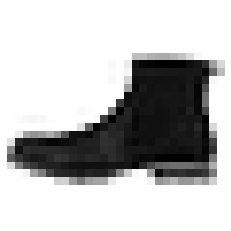

Our model predicted: Ankle boot
The actual answer was: Ankle boot


In [23]:
import random
rand = random.randint(0,9999)

plt.subplot()
plt.axis('off')
plt.imshow(test_images[rand], cmap=plt.cm.binary)
plt.show()

prediction = np.argmax(predictions[rand])
actual = class_names[test_labels[rand]]
print(f'Our model predicted: {class_names[prediction]}')
print(f'The actual answer was: {actual}')